# Machinary

In [1]:
%run ./Initialization.ipynb
set_plot_style(usetex=False)
clr_background_China = "#bcbddc"

nsamples = 1000

Mon Mar  9 15:25:43 JST 2020
3.6.10 |Anaconda, Inc.| (default, Jan  7 2020, 21:14:29) 
[GCC 7.3.0]
Running with PyMC3 version v.3.8
Running with arviz version v.0.6.1
Running with pandas version v.1.0.1
Running with Theano version v.1.0.4
Running with rpy2 version v.3.2.4


In [3]:
date_today = pd.Timestamp("today")
date_today

Timestamp('2019-11-24 13:48:41.638290')

In [3]:
# Regions of China
Regions = {"Northeast": ["Heilongjiang","Jilin","Liaoning"], 
           "North": ["Inner Mongolia","Beijing","Shanxi","Tianjin","Hebei"],
           "East": ["Shandong","Anhui","Fujian","Jiangsu","Jiangxi","Shanghai","Zhejiang"], 
           "Southcentral": ["Hainan","Henan","Hubei","Hunan","Guangdong"],
           "Southwest": ["Chongking","Guizhou","Sichuan","Yunnan","Guangxi","Tibet"], 
           "Northwest": ["Shaanxi","Qinghai","Gansu","Ningxia","Xinjiang"]}

rgns = list(Regions.keys())
nrgns = len(rgns)

In [4]:
theano.config.compute_test_value = 'ignore'

## Testing rpy2

R[write to console]: 
Attaching package: ‘dplyr’


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, lag


R[write to console]: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


R[write to console]: 
Attaching package: ‘tidyr’


R[write to console]: The following object is masked from ‘package:magrittr’:

    extract


R[write to console]: Linking to GEOS 3.7.2dev, GDAL 2.4.2, PROJ 6.1.0

R[write to console]: Google's Terms of Service: https://cloud.google.com/maps-platform/terms/.

R[write to console]: Please cite ggmap if you use it! See citation("ggmap") for details.

R[write to console]: 
Attaching package: ‘ggmap’


R[write to console]: The following object is masked from ‘package:magrittr’:

    inset


R[write to console]: 
Attaching package: ‘glue’


R[write to console]: The following object is masked from ‘package:dplyr’:

    collapse


R[write to console]: 
Attaching package: ‘lubridate’




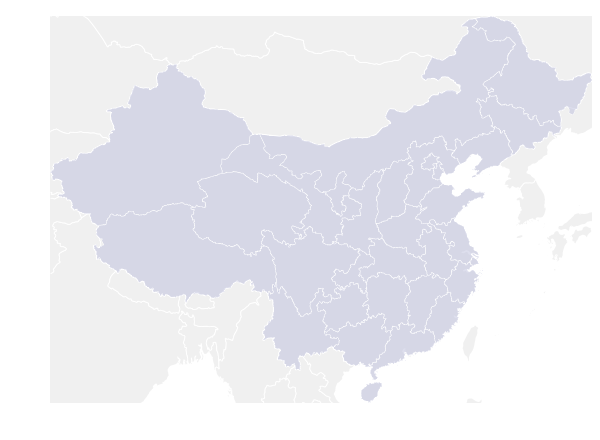

In [5]:
%%R -w 600 -h 440 -r 100 -i clr_background_China
lbrs = c("RColorBrewer","geosphere","ggplot2","dplyr","magrittr","tidyr","sf",
         "ggmap","glue","lubridate","rnaturalearth","rnaturalearthdata")

for(x in lbrs) { library(x,character.only=TRUE) }
require("raster"); require("mapproj")
'%&%' <- function(x,y)paste0(x,y)
theme_set(theme_minimal(base_size=11)) 
remove_axes = theme(axis.text = element_blank(),axis.line = element_blank(),axis.ticks = element_blank(),
                    panel.border = element_blank(),panel.grid = element_blank(),axis.title = element_blank())
raster::getData("GADM",country="CHN",level = 1) %>% fortify -> chn_map

world = ne_countries(scale = "medium", returnclass = "sf")

chn_long_minmax = c(chn_map$long %>% min, chn_map$long %>% max)
chn_lat_minmax = c(chn_map$lat %>% min, chn_map$lat %>% max)

chn_map %>% 
    ggplot() +
        geom_sf(data = world, size=.3, color="white", fill="#f0f0f0") +
        geom_map(map = chn_map, aes(group = group, map_id = id), fill = clr_background_China, alpha = .5, 
                 color="white", lwd = .15) +
        expand_limits(x = chn_map$long, y = chn_map$lat) +
        coord_sf(xlim = c(chn_long_minmax), ylim = c(chn_lat_minmax), expand=F) +
        remove_axes -> p

p = p +         
    theme(legend.position = c(.9, .33)) + 
    remove_axes +
    theme(panel.grid.major = element_line(color = "white"), axis.text = element_text(color = "white"))


p

# Dataset

In [6]:
Df = pd.read_csv("../../data/ASF_data.csv",sep=",")
Df['start'] = pd.to_datetime(Df['start'],format='%d/%m/%Y')
Df['end'] = pd.to_datetime(Df['end'],format='%d/%m/%Y')
Df['date_report'] = pd.to_datetime(Df['date_report'],format='%d/%m/%Y')
Df['date_submission'] = pd.to_datetime(Df['date_submission'],format='%d/%m/%Y')
Df['date_confirmation'] = pd.to_datetime(Df['date_confirmation'],format='%d/%m/%Y')
# Df['susceptible'] = Df['susceptible'].astype('int')
Df.sort_values('date_report')[-72:]

No                             report     report_info  order  \
495  111  en_fup_0000031308_20190808_123558   other report       2   
614  167  en_imm_0000031265_20190808_154111   (this report       1   
502  112  en_fup_0000031340_20190809_165150   other report       5   
501  112  en_fup_0000031340_20190809_165150   other report       4   
503  112  en_fup_0000031340_20190809_165150   (this report       6   
..   ...                                ...             ...    ...   
431   96  en_fup_0000030205_20191115_123657   (this report       3   
430   96  en_fup_0000030205_20191115_123657   other report       2   
429   96  en_fup_0000030205_20191115_123657   other report       1   
552  126  en_fup_0000032332_20191115_122844   (this report       2   
551  126  en_fup_0000032332_20191115_122844   other report       1   

    date_report date_submission date_confirmation   province  \
495  2019-08-08      2019-08-08        2019-03-30      Hubei   
614  2019-08-08      2019-08-08        2019-07-27   Liaoning   
502  2019-08-09      2019-08-09        2019-02-18    Guangxi   
501  2019-08-09      2019-08-09        2019-02-18    Guangxi   
503  2019-08-09      2019-08-09        2019-02-18    Guangxi   
..          ...             ...               ...        ...   
431  2019-11-15      2019-11-15        2019-01-13      Gansu   
430  2019-11-15      2019-11-15        2019-01-13      Gansu   
429  2019-11-15      2019-11-15        2019-01-13      Gansu   
552  2019-11-15      2019-11-15        2019-03-21  Chongking   
551  2019-11-15      2019-11-15        2019-03-21  Chongking   

                                              location       lat       long  \
495  Enshi Tujia and Miao_Autonomous Prefecture_Lic...  30.26527  108.93833   
614  Shenyang_Kangping_Other_Toll station exit of_H...  42.60777  123.27055   
502  Guigang_Gangbei District_Farm_Zhongli Village ...  23.25750  109.61222   
501  Yulin_Luchuan_Farm_Datang Village Daqiao_Township  22.19555  110.24888   
503  Fangchenggang_Fangcheng District_Other_Toll st...  21.71777  108.45638   
..                                                 ...       ...        ...   
431  Dingxi_Minxian_Farm_Hualingou Village Puma_Tow...  34.47638  104.37222   
430  Lanzhou_Qilihe District_Backyard_Penjiaping To...  36.03660  103.73050   
429  Qingyang_Qingcheng_Backyard_Zhongping Village ...  35.90660  107.68840   
552  Dianjiang_Other_Toll station for G50_highway i...  30.18956  107.30243   
551    Shizhu_Backyard_Shuangba Village Daxie_Township  30.03944  108.11666   

         start        end species  susceptible  cases  deaths  destroyed  \
495 2019-03-21        NaT   Swine        142.0    8.0       5        137   
614 2019-07-26        NaT   Swine         70.0   20.0      20         50   
502 2019-07-04        NaT   Swine        744.0   42.0       1        743   
501 2019-06-30        NaT   Swine        147.0    9.0       9        138   
503 2019-08-05        NaT   Swine         52.0   51.0       1         51   
..         ...        ...     ...          ...    ...     ...        ...   
431 2019-09-23        NaT   Swine        287.0  265.0     265         22   
430 2019-01-13 2019-03-05   Swine        190.0  143.0      37        153   
429 2019-01-07 2019-02-26   Swine        109.0   44.0       9        100   
552 2019-11-06        NaT   Swine         25.0    1.0       1         24   
551 2019-03-17 2019-05-03   Swine         91.0    9.0       6         85   

     slaughtered  
495          0.0  
614          0.0  
502          0.0  
501          0.0  
503          0.0  
..           ...  
431          NaN  
430          0.0  
429          0.0  
552          NaN  
551          0.0  

[72 rows x 19 columns]

In [7]:
Df['region'] = None
Df = Df.reset_index(drop=True)
for rgn in Regions.keys():
    print(rgn)
    Df['region'] = [rgn if x in Regions[rgn] else Df.loc[idx,'region'] for idx,x in enumerate(Df['province'])]
    
Df.loc[Df['region'].isnull()]

Northeast
North
East
Southcentral
Southwest
Northwest


Empty DataFrame
Columns: [No, report, report_info, order, date_report, date_submission, date_confirmation, province, location, lat, long, start, end, species, susceptible, cases, deaths, destroyed, slaughtered, region]
Index: []

In [8]:
Df.loc[lambda d: d.start>=d.date_report]

No                             report    report_info  order date_report  \
39    11  en_fup_0000027856_20180910_192244  other report       8  2018-09-07   
69    19  en_fup_0000028035_20181001_180714          other      4  2018-09-21   
299   63  en_fup_0000029012_20181226_144537  other report       3  2018-12-22   
567  134  en_imm_0000027959_20180917_164758          other      2  2018-09-14   

    date_submission date_confirmation        province  \
39       2018-09-10        2018-08-30           Anhui   
69       2018-09-21        2018-09-14  Inner Mongolia   
299      2018-12-22        2018-11-08          Fujian   
567      2018-09-14        2018-09-14  Inner Mongolia   

                                              location     lat     long  \
39       Tongling_Yi an District_Farm_Shun an Township  30.585  117.575   
69   Huhhot_Huimin District_Slaughterhouse_Gangtiel...  40.481  111.374   
299  Nanping_Yanping District_Farm_Yangkeng Village...  26.592  117.931   
567  XilinGol League_Zhenglan_Backyard_Caiyuan Vill...  42.151  116.003   

         start end species  susceptible  cases  deaths  destroyed  \
39  2018-09-07 NaT   Swine        219.0   63.0      23        196   
69  2018-09-23 NaT   Swine        388.0    4.0       2        386   
299 2018-12-22 NaT   Swine       5776.0   35.0      11       5765   
567 2018-09-15 NaT   Swine        159.0   14.0       8        151   

     slaughtered region  
39           NaN   East  
69           0.0  North  
299          NaN   East  
567          NaN  North

In [9]:
# check if it is the current or other report
Df['report_info'] = ['this' in x for x in Df['report_info']]
Df[:5]

No                             report  report_info  order date_report  \
0   0  en_fup_0000027458_20180806_155743        False      1  2018-08-04   
1   1  en_fup_0000027533_20180813_175309        False      1  2018-08-10   
2   2  en_fup_0000027570_20180816_175933        False      1  2018-08-16   
3   3  en_fup_0000027688_20180907_184405        False      1  2018-09-07   
4   3  en_fup_0000027688_20180907_184405         True      2  2018-09-07   

  date_submission date_confirmation  province  \
0      2018-08-04        2018-08-03  Liaoning   
1      2018-08-10        2018-08-03  Liaoning   
2      2018-08-16        2018-08-03  Liaoning   
3      2018-09-07        2018-08-03  Liaoning   
4      2018-09-07        2018-08-03  Liaoning   

                                            location      lat      long  \
0  Shenyang_Shenbei New District_Farm_Shenbei Street  42.0225  123.2932   
1  Shenyang_Shenbei New District_Farm_Shenbei Street  42.0225  123.2932   
2  Shenyang_Shenbei New District_Farm_Shenbei Street  42.0225  123.2932   
3  Shenyang_Shenbei New District_Farm_Shenbei Street  42.0225  123.2932   
4  Shenyang_Shenbei New District_Farm_Cailuo yi v...  42.0200  123.4270   

       start end species  susceptible  cases  deaths  destroyed  slaughtered  \
0 2018-08-01 NaT   Swine       8116.0   47.0      47       8069          0.0   
1 2018-08-01 NaT   Swine       8116.0   47.0      47       8069          0.0   
2 2018-08-01 NaT   Swine       8792.0   47.0      47       8745          0.0   
3 2018-08-01 NaT   Swine      19420.0   47.0      47      19373          0.0   
4 2018-08-07 NaT   Swine        160.0    3.0       0        160          0.0   

      region  
0  Northeast  
1  Northeast  
2  Northeast  
3  Northeast  
4  Northeast

### **Distribution of time delay between date of confirmation and date of submission**

In [10]:
gb = Df.sort_values('date_submission').groupby(['lat','long','start'])
Df.loc[gb.ngroup()==gb.ngroup()[20]].sort_values('date_submission')

No                             report  report_info  order date_report  \
20    8  en_fup_0000027839_20180906_133151        False      5  2018-09-06   
29   10  en_fup_0000027846_20180907_110550         True      5  2018-09-06   
36   11  en_fup_0000027856_20180910_192244        False      5  2018-09-07   
46   13  en_fup_0000027897_20180911_160445        False      5  2018-09-10   
54   14  en_fup_0000027932_20180914_185340        False      5  2018-09-14   
211  40  en_fup_0000028599_20181112_124801        False      5  2018-11-10   
347  72  en_fup_0000029094_20190109_203132        False      5  2019-01-08   

    date_submission date_confirmation province  \
20       2018-09-06        2018-08-30    Anhui   
29       2018-09-06        2018-08-30    Anhui   
36       2018-09-10        2018-08-30    Anhui   
46       2018-09-10        2018-08-30    Anhui   
54       2018-09-14        2018-08-30    Anhui   
211      2018-11-12        2018-08-30    Anhui   
347      2019-01-08        2018-08-30    Anhui   

                                              location     lat     long  \
20   Wuhu_Nanling_Farm_Longtan Village  Xuzhen_Town...  31.089  118.406   
29   Wuhu_Nanling_Farm_Longtan Village  Xuzhen_Town...  31.089  118.406   
36   Wuhu_Nanling_Farm_Longtan Village  Xuzhen_Town...  31.089  118.406   
46   Wuhu_Nanling_Farm_Longtan Village  Xuzhen_Town...  31.089  118.406   
54   Wuhu_Nanling_Farm_Longtan Village  Xuzhen_Town...  31.089  118.406   
211  Wuhu_Nanling_Farm_Longtan Village  Xuzhen_Town...  31.089  118.406   
347  Wuhu_Nanling_Farm_Longtan Village  Xuzhen_Town...  31.089  118.406   

         start        end species  susceptible  cases  deaths  destroyed  \
20  2018-08-31        NaT   Swine         30.0   13.0       4         26   
29  2018-08-31        NaT   Swine         30.0   13.0       4         26   
36  2018-08-31        NaT   Swine         30.0   13.0       4         26   
46  2018-08-31        NaT   Swine         30.0   13.0       4         26   
54  2018-08-31        NaT   Swine         30.0   13.0       4         26   
211 2018-08-31        NaT   Swine         30.0   13.0       4         26   
347 2018-08-31 2018-10-20   Swine         30.0   13.0       4         26   

     slaughtered region  
20           0.0   East  
29           0.0   East  
36           0.0   East  
46           0.0   East  
54           0.0   East  
211          0.0   East  
347          0.0   East

In [11]:
#,'location','cases' 
Df_ = Df.sort_values('date_submission').groupby(['lat','long','start']).first()\
        .reset_index().sort_values('start').reset_index(drop=True).reset_index().rename(columns={'index':'id'})

Df_['Δt'] = (Df_['date_submission']-Df_['start']).astype('timedelta64[D]').astype(int)

Df_[:5]

id      lat      long      start   No                             report  \
0   0  42.0225  123.2932 2018-08-01  128  en_imm_0000027442_20180803_155752   
1   1  42.0200  123.3660 2018-08-07    3  en_fup_0000027688_20180907_184405   
2   2  42.0200  123.4270 2018-08-07    3  en_fup_0000027688_20180907_184405   
3   3  34.7240  113.8480 2018-08-14  129  en_imm_0000027568_20180816_165812   
4   4  34.6280  119.0540 2018-08-15  130  en_imm_0000027598_20180820_154827   

   report_info  order date_report date_submission  ...  \
0         True      1  2018-08-03      2018-08-03  ...   
1         True      5  2018-09-07      2018-09-07  ...   
2         True      2  2018-09-07      2018-09-07  ...   
3         True      1  2018-08-16      2018-08-16  ...   
4         True      1  2018-08-19      2018-08-19  ...   

                                            location        end species  \
0  Shenyang_Shenbei New District_Farm_Shenbei Street 2018-10-01   Swine   
1  Shenyang_Shenbei New District_Farm_Yinjia village 2018-12-04   Swine   
2  Shenyang_Shenbei New District_Farm_Cailuo yi v... 2018-12-04   Swine   
3  Zhengzhou_Slaughterhouse_Economic Development_... 2018-10-01   Swine   
4    Lianyungang_Haizhou District_Farm_Baofu Village 2018-10-04   Swine   

  susceptible  cases  deaths  destroyed  slaughtered        region  Δt  
0       383.0   47.0      47        336          0.0     Northeast   2  
1       140.0    1.0       0        140          0.0     Northeast  31  
2       160.0    3.0       0        160          0.0     Northeast  31  
3       260.0   30.0      30        230          0.0  Southcentral   2  
4       615.0  615.0      88        527          0.0          East   4  

[5 rows x 22 columns]

**First we check if there are some records with the same geographical coordinates and date of start, but different description** (e.g. this could be two outbreaks at two farms within ~5 km radius)

In [12]:
Df2_ = Df.sort_values('date_submission').groupby(['lat','long','start','location']).first()\
        .reset_index().sort_values('start').reset_index(drop=True).reset_index().rename(columns={'index':'id'})

# Comparing how different Df_ and Df2_
m = Df_.merge(Df2_, on=['location'], how='outer', suffixes=['', '_'], indicator=True)\
    .loc[lambda d: d['_merge']=='right_only'].dropna(axis=1)
m

location  id_     lat_  \
164  Xuancheng_Xuanzhou District_Farm_Gouzu Village...    9  30.5940   
165  Pu''er City_Simao District_Backyard_Guanfang_V...   55  22.6190   
166  Huanggang_Yangxin_Backyard_Shizhen_Village Che...   80  29.8890   
167  Yinchuan_Yongning_Backyard_Banqiao Village _Wa...  108  38.3536   

        long_     start_  No_                            report_  \
164  118.3930 2018-08-22   13  en_fup_0000027897_20180911_160445   
165  100.7190 2018-10-27   74  en_fup_0000029096_20190109_201006   
166  115.2050 2018-11-22   49  en_fup_0000028756_20181127_163327   
167  106.3069 2019-01-11   97  en_fup_0000030208_20190524_142833   

     report_info_  order_ date_report_  ... date_confirmation_ province_  \
164         False       3   2018-09-10  ...         2018-08-30     Anhui   
165         False       3   2019-01-08  ...         2018-10-20    Yunnan   
166          True       4   2018-11-26  ...         2018-11-07     Hubei   
167         False       1   2019-05-23  ...         2019-01-19   Ningxia   

    species_ susceptible_  cases_  deaths_  destroyed_  slaughtered_  \
164    Swine        285.0    63.0       42         243           0.0   
165    Swine        229.0     5.0        1         228           0.0   
166    Swine         63.0     9.0        5          58           0.0   
167    Swine         57.0    26.0       13          44           0.0   

          region_      _merge  
164          East  right_only  
165     Southwest  right_only  
166  Southcentral  right_only  
167     Northwest  right_only  

[4 rows x 21 columns]

In [13]:
Df2_.loc[lambda d: d.start.isin(m.start_)]

id      lat      long      start  \
8      8  30.5940  118.3930 2018-08-22   
9      9  30.5940  118.3930 2018-08-22   
55    55  22.6190  100.7190 2018-10-27   
56    56  22.6190  100.7190 2018-10-27   
79    79  29.8890  115.2050 2018-11-22   
80    80  29.8890  115.2050 2018-11-22   
107  107  38.3536  106.3069 2019-01-11   
108  108  38.3536  106.3069 2019-01-11   

                                              location   No  \
8    Xuancheng_Xuanzhou District_Farm_Gouzu Village...    7   
9    Xuancheng_Xuanzhou District_Farm_Gouzu Village...   13   
55   Pu''er City_Simao District_Backyard_Guanfang_V...   74   
56   Pu''''er City_Simao District_Backyard_Guanfang...   33   
79   Huangshi_Yangxin_Backyard_Shizhen_Village Chen...   50   
80   Huanggang_Yangxin_Backyard_Shizhen_Village Che...   49   
107  Yinchuan_Yongning_Backyard_Banqiao_Village Wan...  153   
108  Yinchuan_Yongning_Backyard_Banqiao Village _Wa...   97   

                                report  report_info  order date_report  ...  \
8    en_fup_0000027809_20180904_134034         True      3  2018-09-03  ...   
9    en_fup_0000027897_20180911_160445        False      3  2018-09-10  ...   
55   en_fup_0000029096_20190109_201006        False      3  2019-01-08  ...   
56   en_fup_0000028466_20181102_143759         True      3  2018-10-31  ...   
79   en_fup_0000028756_20181218_141712         True      4  2018-11-26  ...   
80   en_fup_0000028756_20181127_163327         True      4  2018-11-26  ...   
107  en_imm_0000029266_20190121_182029         True      1  2019-01-21  ...   
108  en_fup_0000030208_20190524_142833        False      1  2019-05-23  ...   

    date_confirmation province        end species susceptible  cases  deaths  \
8          2018-08-30    Anhui        NaT   Swine       285.0   63.0      42   
9          2018-08-30    Anhui 2018-10-17   Swine       285.0   63.0      42   
55         2018-10-20   Yunnan 2018-12-11   Swine       229.0    5.0       1   
56         2018-10-20   Yunnan        NaT   Swine       229.0    5.0       1   
79         2018-11-07    Hubei 2019-01-10   Swine        63.0    9.0       5   
80         2018-11-07    Hubei        NaT   Swine        63.0    9.0       5   
107        2019-01-19  Ningxia        NaT   Swine        57.0   26.0      13   
108        2019-01-19  Ningxia 2019-03-05   Swine        57.0   26.0      13   

     destroyed  slaughtered        region  
8          243          0.0          East  
9          243          0.0          East  
55         228          0.0     Southwest  
56         228          0.0     Southwest  
79          58          0.0  Southcentral  
80          58          0.0  Southcentral  
107         44          0.0     Northwest  
108         44          0.0     Northwest  

[8 rows x 21 columns]

All records above are duplicated but with slightly different *updated during the course of the outbreak* information

**Let's check information about the type of the unit**

In [14]:
Df_['unit'] = 0
units = ['Village','Farm','Backyard','Slaughterhouse','Other']
for unt in units:
    Df_.loc[[unt in x for x in Df_['location']],'unit'] = unt

To check if some units remain unspecified

In [15]:
Df_.loc[Df_['unit']==0,'location']

Series([], Name: location, dtype: object)

In [16]:
Df_.shape

(162, 23)

Any *Other*s?

In [17]:
# to check "Other"s
Df_.loc[Df_['unit']=='Other']

id       lat       long      start   No  \
117  117  30.28859  106.90877 2019-03-10   91   
137  137  26.20610  107.50087 2019-05-30  104   
149  149  42.77722  124.85916 2019-07-26  167   
150  150  42.96083  124.85861 2019-07-26  167   
151  151  42.60777  123.27055 2019-07-26  167   
153  153  21.71777  108.45638 2019-08-05  112   
158  158  21.83138  109.74750 2019-10-12  124   
160  160  30.18956  107.30243 2019-11-06  126   

                                report  report_info  order date_report  \
117  en_fup_0000029831_20190314_125755         True      6  2019-03-13   
137  en_fup_0000030681_20190603_134021         True      2  2019-06-01   
149  en_imm_0000031265_20190808_154111         True      2  2019-08-08   
150  en_imm_0000031265_20190808_154111         True      3  2019-08-08   
151  en_imm_0000031265_20190808_154111         True      1  2019-08-08   
153  en_fup_0000031340_20190809_165150         True      6  2019-08-09   
158  en_fup_0000032148_20191021_155119         True      8  2019-10-18   
160  en_fup_0000032332_20191115_122844         True      2  2019-11-15   

    date_submission  ... end species susceptible cases deaths  destroyed  \
117      2019-03-14  ... NaT   Swine       150.0   9.0      9        141   
137      2019-06-01  ... NaT   Swine        32.0   1.0      1         31   
149      2019-08-08  ... NaT   Swine        65.0   1.0      1         64   
150      2019-08-08  ... NaT   Swine        70.0   1.0      1         69   
151      2019-08-08  ... NaT   Swine        70.0  20.0     20         50   
153      2019-08-09  ... NaT   Swine        52.0  51.0      1         51   
158      2019-10-21  ... NaT   Swine        48.0   9.0      9         39   
160      2019-11-15  ... NaT   Swine        25.0   1.0      1         24   

     slaughtered     region  Δt   unit  
117          0.0  Southwest   4  Other  
137          0.0  Southwest   2  Other  
149          0.0  Northeast  13  Other  
150          0.0  Northeast  13  Other  
151          0.0  Northeast  13  Other  
153          0.0  Southwest   4  Other  
158          NaN  Southwest   9  Other  
160          NaN  Southwest   9  Other  

[8 rows x 23 columns]

In [18]:
[str(x) for x in Df_.loc[Df_['unit']=='Other'].location]

['Guang an_Linshui_Other_Toll station for G65_highway in the south of_Linshui County',
 'Buyi and Miao_Autonomous Prefecture of_QianNan_Duyun_Other_Toll station for G75_highway in the south of_Xiaozhai Duyun City',
 'Tieling_Xifeng_Other_Highway checkpoint for_Animal health_supervision Toll station_exit of highway',
 'Tieling_Xifeng_Other_Highway checkpoint for_Animal health_supervision Toll station_exit of highway',
 'Shenyang_Kangping_Other_Toll station exit of_Haizhou highway',
 'Fangchenggang_Fangcheng District_Other_Toll station exit of_Qindong_highway Highway_checkpoint for Animal_health supervision',
 'Yulin_Bobai_Other_Highway checkpoint for_Animal health_supervision Toll station_for G59 highway in the_Songwang Township',
 'Dianjiang_Other_Toll station for G50_highway in the Minxin_Village Chengxi_Township']

**They are toll accidents. We need to remove them**

In [19]:
Df_ = Df_.loc[~Df_.index.isin(Df_.loc[Df_['unit']=='Other','id'].values)].reset_index(drop=True).drop('id',1).reset_index().rename(columns={'index':'id'})
Df_

id       lat       long      start   No  \
0      0  42.02250  123.29320 2018-08-01  128   
1      1  42.02000  123.36600 2018-08-07    3   
2      2  42.02000  123.42700 2018-08-07    3   
3      3  34.72400  113.84800 2018-08-14  129   
4      4  34.62800  119.05400 2018-08-15  130   
..   ...       ...        ...        ...  ...   
149  149  38.40083  106.40861 2019-09-06  114   
150  150  22.92611  110.96611 2019-09-21  123   
151  151  34.47638  104.37222 2019-09-23   96   
152  152  25.19277  101.47694 2019-10-21  125   
153  153  25.39260   98.65100 2019-11-10  127   

                                report  report_info  order date_report  \
0    en_imm_0000027442_20180803_155752         True      1  2018-08-03   
1    en_fup_0000027688_20180907_184405         True      5  2018-09-07   
2    en_fup_0000027688_20180907_184405         True      2  2018-09-07   
3    en_imm_0000027568_20180816_165812         True      1  2018-08-16   
4    en_imm_0000027598_20180820_154827         True      1  2018-08-19   
..                                 ...          ...    ...         ...   
149  en_fup_0000031697_20190912_111711         True      4  2019-09-11   
150  en_fup_0000031892_20190924_175316         True      7  2019-09-24   
151  en_fup_0000030205_20191115_123657         True      3  2019-11-15   
152  en_fup_0000032233_20191028_131553         True      6  2019-10-27   
153  en_fup_0000032362_20191115_115516         True      7  2019-11-15   

    date_submission  ...        end species susceptible  cases deaths  \
0        2018-08-03  ... 2018-10-01   Swine       383.0   47.0     47   
1        2018-09-07  ... 2018-12-04   Swine       140.0    1.0      0   
2        2018-09-07  ... 2018-12-04   Swine       160.0    3.0      0   
3        2018-08-16  ... 2018-10-01   Swine       260.0   30.0     30   
4        2018-08-19  ... 2018-10-04   Swine       615.0  615.0     88   
..              ...  ...        ...     ...         ...    ...    ...   
149      2019-09-12  ...        NaT   Swine       226.0   13.0     13   
150      2019-09-24  ...        NaT   Swine       120.0    2.0      2   
151      2019-11-15  ...        NaT   Swine       287.0  265.0    265   
152      2019-10-28  ...        NaT   Swine        15.0    3.0      3   
153      2019-11-15  ...        NaT   Swine       261.0  177.0     97   

     destroyed  slaughtered        region  Δt            unit  
0          336          0.0     Northeast   2            Farm  
1          140          0.0     Northeast  31            Farm  
2          160          0.0     Northeast  31            Farm  
3          230          0.0  Southcentral   2  Slaughterhouse  
4          527          0.0          East   4            Farm  
..         ...          ...           ...  ..             ...  
149        213          0.0     Northwest   6            Farm  
150        118          0.0     Southwest   3  Slaughterhouse  
151         22          NaN     Northwest  53            Farm  
152         12          0.0     Southwest   7        Backyard  
153        164          NaN     Southwest   5            Farm  

[154 rows x 23 columns]

**Also we exclude a case of a solitary wild boar**

In [20]:
Df_.loc[lambda d: ((d.species!='Swine')&(d.cases<10))].T

67
id                                                                67
lat                                                           41.807
long                                                         126.459
start                                            2018-11-13 00:00:00
No                                                                43
report                             en_fup_0000028665_20181122_134358
report_info                                                     True
order                                                              4
date_report                                      2018-11-16 00:00:00
date_submission                                  2018-11-22 00:00:00
date_confirmation                                2018-09-21 00:00:00
province                                                       Jilin
location           Baishan_Hunjiang District_Forest_Daqinggou Vil...
end                                              2018-12-30 00:00:00
species                                             Wild boar:Suidae
susceptible                                                      NaN
cases                                                              1
deaths                                                             1
destroyed                                                          0
slaughtered                                                        0
region                                                     Northeast
Δt                                                                 9
unit                                                         Village

In [21]:
Df_ = Df_.loc[lambda d: (~((d.species!='Swine')&(d.cases<10)))].reset_index(drop=True).drop('id',1).reset_index().rename(columns={'index':'id'})
Df_

id       lat       long      start   No  \
0      0  42.02250  123.29320 2018-08-01  128   
1      1  42.02000  123.36600 2018-08-07    3   
2      2  42.02000  123.42700 2018-08-07    3   
3      3  34.72400  113.84800 2018-08-14  129   
4      4  34.62800  119.05400 2018-08-15  130   
..   ...       ...        ...        ...  ...   
148  148  38.40083  106.40861 2019-09-06  114   
149  149  22.92611  110.96611 2019-09-21  123   
150  150  34.47638  104.37222 2019-09-23   96   
151  151  25.19277  101.47694 2019-10-21  125   
152  152  25.39260   98.65100 2019-11-10  127   

                                report  report_info  order date_report  \
0    en_imm_0000027442_20180803_155752         True      1  2018-08-03   
1    en_fup_0000027688_20180907_184405         True      5  2018-09-07   
2    en_fup_0000027688_20180907_184405         True      2  2018-09-07   
3    en_imm_0000027568_20180816_165812         True      1  2018-08-16   
4    en_imm_0000027598_20180820_154827         True      1  2018-08-19   
..                                 ...          ...    ...         ...   
148  en_fup_0000031697_20190912_111711         True      4  2019-09-11   
149  en_fup_0000031892_20190924_175316         True      7  2019-09-24   
150  en_fup_0000030205_20191115_123657         True      3  2019-11-15   
151  en_fup_0000032233_20191028_131553         True      6  2019-10-27   
152  en_fup_0000032362_20191115_115516         True      7  2019-11-15   

    date_submission  ...        end species susceptible  cases deaths  \
0        2018-08-03  ... 2018-10-01   Swine       383.0   47.0     47   
1        2018-09-07  ... 2018-12-04   Swine       140.0    1.0      0   
2        2018-09-07  ... 2018-12-04   Swine       160.0    3.0      0   
3        2018-08-16  ... 2018-10-01   Swine       260.0   30.0     30   
4        2018-08-19  ... 2018-10-04   Swine       615.0  615.0     88   
..              ...  ...        ...     ...         ...    ...    ...   
148      2019-09-12  ...        NaT   Swine       226.0   13.0     13   
149      2019-09-24  ...        NaT   Swine       120.0    2.0      2   
150      2019-11-15  ...        NaT   Swine       287.0  265.0    265   
151      2019-10-28  ...        NaT   Swine        15.0    3.0      3   
152      2019-11-15  ...        NaT   Swine       261.0  177.0     97   

     destroyed  slaughtered        region  Δt            unit  
0          336          0.0     Northeast   2            Farm  
1          140          0.0     Northeast  31            Farm  
2          160          0.0     Northeast  31            Farm  
3          230          0.0  Southcentral   2  Slaughterhouse  
4          527          0.0          East   4            Farm  
..         ...          ...           ...  ..             ...  
148        213          0.0     Northwest   6            Farm  
149        118          0.0     Southwest   3  Slaughterhouse  
150         22          NaN     Northwest  53            Farm  
151         12          0.0     Southwest   7        Backyard  
152        164          NaN     Southwest   5            Farm  

[153 rows x 23 columns]

In [22]:
# to check "Village"s
Df_.loc[Df_['unit']=='Village','location']

24     Yingkou_Dashiqiao City_Village_Gunzipao Villag...
25     Yingkou_Dashiqiao City_Village_Dagaokan Villag...
27     Yingkou_Laobian District_Village_Cuijia Villag...
28     Yingkou_Laobian District_Village_Xinli Village...
29     Yingkou_Dashiqiao City_Village_Xinxing Village...
30     Yingkou_Dashiqiao City_Village_Gejia Village  ...
34     Anshan_Tai an_Village_Maojia Village Xintai_To...
117    Linzhi_Bomi_Village_Gongzhong_Village Yigong T...
121    Diqing Tibetan_Autonomous Prefecture_Shangri-l...
123      Wanning_Village_Siwei Village  Dong'ao_Township
125       Danzhou_Village_Meiwan Village Heqing_Township
129    Tibetan Qiang_Autonomous Prefecture of_Ngawa_R...
132    Wenshan Zhuang and_Miao Autonomous_Prefecture_...
134    Dai Autonomous_Prefecture of_Xishuangbanna_Men...
138    Buyi and Miao_Autonomous Prefecture of_QianNan...
139    Buyi and Miao_Autonomous Prefecture of_QianNan...
Name: location, dtype: object

In [23]:
Df_.loc[24]

id                                                                  24
lat                                                             40.828
long                                                            122.42
start                                              2018-09-28 00:00:00
No                                                                  24
report                               en_fup_0000028122_20181004_131708
report_info                                                       True
order                                                                7
date_report                                        2018-09-30 00:00:00
date_submission                                    2018-09-30 00:00:00
date_confirmation                                  2018-08-03 00:00:00
province                                                      Liaoning
location             Yingkou_Dashiqiao City_Village_Gunzipao Villag...
end                                                2018-11-22 00:00:00
specie

**Now let's check the records which are other than swine**

In [24]:
Df_.loc[Df_.species!='Swine']

id       lat     long      start  No                             report  \
81    81  50.15100  127.266 2018-11-28  54  en_fup_0000028844_20181207_174956   
111  111  47.85427  120.265 2019-02-22  89  en_fup_0000029694_20190226_144250   

     report_info  order date_report date_submission  ... end  \
81          True      4  2018-12-07      2018-12-07  ... NaT   
111         True      6  2019-02-26      2019-02-26  ... NaT   

              species susceptible  cases deaths  destroyed  slaughtered  \
81   Wild boar:Suidae       375.0   77.0     77        298          0.0   
111  Wild boar:Suidae       222.0  222.0    210         12          0.0   

        region  Δt  unit  
81   Northeast   9  Farm  
111      North   4  Farm  

[2 rows x 23 columns]

In [25]:
len(Df_)

153

In [26]:
Df_.sort_values('start')[-5:]

id       lat       long      start   No  \
148  148  38.40083  106.40861 2019-09-06  114   
149  149  22.92611  110.96611 2019-09-21  123   
150  150  34.47638  104.37222 2019-09-23   96   
151  151  25.19277  101.47694 2019-10-21  125   
152  152  25.39260   98.65100 2019-11-10  127   

                                report  report_info  order date_report  \
148  en_fup_0000031697_20190912_111711         True      4  2019-09-11   
149  en_fup_0000031892_20190924_175316         True      7  2019-09-24   
150  en_fup_0000030205_20191115_123657         True      3  2019-11-15   
151  en_fup_0000032233_20191028_131553         True      6  2019-10-27   
152  en_fup_0000032362_20191115_115516         True      7  2019-11-15   

    date_submission  ... end species susceptible  cases deaths  destroyed  \
148      2019-09-12  ... NaT   Swine       226.0   13.0     13        213   
149      2019-09-24  ... NaT   Swine       120.0    2.0      2        118   
150      2019-11-15  ... NaT   Swine       287.0  265.0    265         22   
151      2019-10-28  ... NaT   Swine        15.0    3.0      3         12   
152      2019-11-15  ... NaT   Swine       261.0  177.0     97        164   

     slaughtered     region  Δt            unit  
148          0.0  Northwest   6            Farm  
149          0.0  Southwest   3  Slaughterhouse  
150          NaN  Northwest  53            Farm  
151          0.0  Southwest   7        Backyard  
152          NaN  Southwest   5            Farm  

[5 rows x 23 columns]

In [27]:
Df_.loc[Df_['province']=='Liaoning']

id      lat      long      start   No                             report  \
0    0  42.0225  123.2932 2018-08-01  128  en_imm_0000027442_20180803_155752   
1    1  42.0200  123.3660 2018-08-07    3  en_fup_0000027688_20180907_184405   
2    2  42.0200  123.4270 2018-08-07    3  en_fup_0000027688_20180907_184405   
24  24  40.8280  122.4200 2018-09-28   24  en_fup_0000028122_20181004_131708   
25  25  40.7850  122.3810 2018-09-28   24  en_fup_0000028122_20181004_131708   
27  27  40.6950  122.3110 2018-09-28   24  en_fup_0000028122_20181004_131708   
28  28  40.6700  122.4090 2018-10-02   25  en_fup_0000028200_20181011_135939   
29  29  40.8860  122.4860 2018-10-02   25  en_fup_0000028200_20181011_135939   
30  30  40.8060  122.4980 2018-10-02   25  en_fup_0000028200_20181011_135939   
32  32  41.2590  122.3410 2018-10-06   25  en_fup_0000028200_20181011_135939   
33  33  39.5540  122.1950 2018-10-09   27  en_fup_0000028242_20181015_125935   
34  34  41.2920  122.2890 2018-10-10   27  en_fup_0000028242_20181015_125935   
36  36  41.4860  122.2780 2018-10-12   28  en_fup_0000028275_20181017_122710   
37  37  40.5720  122.2220 2018-10-13   28  en_fup_0000028275_20181017_122710   
38  38  40.5611  122.3590 2018-10-13   28  en_fup_0000028275_20181017_122710   
39  39  41.2555  122.5000 2018-10-13   28  en_fup_0000028275_20181017_122710   
40  40  41.1100  121.5831 2018-10-14   28  en_fup_0000028275_20181017_122710   
41  41  40.5611  122.3590 2018-10-14   28  en_fup_0000028275_20181017_122710   
42  42  42.3340  123.5220 2018-10-14   28  en_fup_0000028275_20181017_122710   
44  44  40.5655  122.1348 2018-10-15   29  en_fup_0000028291_20181018_194247   

    report_info  order date_report date_submission  ...        end species  \
0          True      1  2018-08-03      2018-08-03  ... 2018-10-01   Swine   
1          True      5  2018-09-07      2018-09-07  ... 2018-12-04   Swine   
2          True      2  2018-09-07      2018-09-07  ... 2018-12-04   Swine   
24         True      7  2018-09-30      2018-09-30  ... 2018-11-22   Swine   
25         True      6  2018-09-30      2018-09-30  ... 2018-11-22   Swine   
27         True      8  2018-09-30      2018-09-30  ... 2018-11-22   Swine   
28         True     11  2018-10-09      2018-10-11  ... 2018-11-22   Swine   
29         True      9  2018-10-09      2018-10-11  ... 2018-11-22   Swine   
30         True     10  2018-10-09      2018-10-11  ... 2018-11-22   Swine   
32         True     12  2018-10-09      2018-10-11  ... 2018-11-27   Swine   
33        False     13  2018-10-12      2018-10-12  ... 2018-11-25   Swine   
34         True     14  2018-10-12      2018-10-12  ... 2018-11-27   Swine   
36         True     15  2018-10-16      2018-10-17  ... 2018-11-27   Swine   
37         True     17  2018-10-16      2018-10-17  ... 2018-12-03   Swine   
38         True     16  2018-10-16      2018-10-17  ... 2018-12-03   Swine   
39         True     18  2018-10-16      2018-10-17  ... 2018-12-04   Swine   
40         True     21  2018-10-16      2018-10-17  ... 2018-12-03   Swine   
41         True     20  2018-10-16      2018-10-17  ... 2018-12-03   Swine   
42         True     19  2018-10-16      2018-10-17  ... 2018-11-29   Swine   
44         True     22  2018-10-17      2018-10-18  ... 2018-12-03   Swine   

   susceptible   cases deaths  destroyed  slaughtered     region  Δt      unit  
0        383.0    47.0     47        336          0.0  Northeast   2      Farm  
1        140.0     1.0      0        140          0.0  Northeast  31      Farm  
2        160.0     3.0      0        160          0.0  Northeast  31      Farm  
24       239.0    78.0     78        161          0.0  Northeast   2   Village  
25       130.0    22.0     22        108          0.0  Northeast   2   Village  
27         9.0     2.0      2          7          0.0  Northeast   2   Village  
28      9382.0   142.0     46       9336          0.0  Northeast   9   Village  
29      1337.0    65.0     20       

In [28]:
Df_.loc[Df_['province']=='Henan'].drop(['report','id','date_confirmation','date_report','species'],1)

lat     long      start   No  report_info  order date_submission  \
3   34.724  113.848 2018-08-14  129         True      1      2018-08-16   
17  35.123  113.433 2018-09-10   17         True      2      2018-09-14   

   province                                           location        end  \
3     Henan  Zhengzhou_Slaughterhouse_Economic Development_... 2018-10-01   
17    Henan  Xinxiang_Huojia_Farm_Chengcao Village _Taishan... 2018-10-31   

    susceptible  cases  deaths  destroyed  slaughtered        region  Δt  \
3         260.0   30.0      30        230          0.0  Southcentral   2   
17       2087.0  148.0      64       2023          0.0  Southcentral   4   

              unit  
3   Slaughterhouse  
17            Farm

In [29]:
def getCounts(y):
    return [[key,len(list(group))] for key, group in itertools.groupby(np.sort(y))]

z = getCounts(Df_['Δt'])

time_separation = 14
z = [[(zz[0]//7)*7,zz[1]] if zz[0]>=time_separation else zz for zz in z]

df_z = pd.DataFrame(z,columns=['delay','n']).groupby('delay').sum().reset_index()

df_z = pd.DataFrame({'delay':range(time_separation)}).merge(df_z,how='outer').fillna(0).set_index('delay')
df_z['n'] = df_z['n'].astype(int)
df_z = df_z.sort_values('delay')

df_z

n
delay    
-2      1
-1      1
 0      1
 1      0
 2     11
 3     18
 4     29
 5     13
 6     14
 7     14
 8     14
 9     11
 10     7
 11     0
 12     4
 13     0
 14     8
 21     2
 28     3
 35     1
 49     1

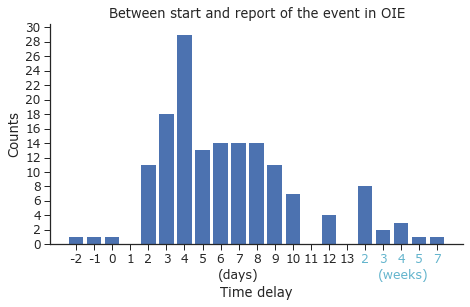

In [30]:
fig, ax = plt.subplots(1)
fig.set_size_inches(6.7,4.5);

xx = [str(x) for x in df_z.index]
xx_labels = [x if x<time_separation else x//7 for x in df_z.index]
ax.bar(xx,df_z['n'], lw=0, color='C0')

xtks = xx
ax.set_xticks(xtks)
ax.set_xticklabels(xx_labels);
ax.set_yticks(np.arange(0,max(df_z['n'])+2,2))
[ax.get_xticklabels()[idx].set_color("C9") for idx,x in enumerate(df_z.index) if x>=time_separation];
ax.annotate('(days)', (0,0), (168, -25), xycoords='axes fraction', textcoords='offset points', va='top', fontsize=12.5)
ax.annotate('(weeks)', (0,0), (328, -25), color='C9', xycoords='axes fraction', 
            textcoords='offset points', va='top', fontsize=12.5)
ax.set_xlabel("Time delay",labelpad=20)
ax.set_ylabel("Counts")
ax.set_title('Between start and report of the event in OIE');
 
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig("../../figures/draft/FigS1A_all.pdf",format='pdf',dpi=300,bbox_inches='tight')

In [31]:
df_z.n.sum()

153

Some farms had nonpositive delays

In [32]:
Df_.loc[Df_['Δt']<=0]

id     lat     long      start   No                             report  \
19  19  42.151  116.003 2018-09-15  134  en_imm_0000027959_20180917_164758   
22  22  40.481  111.374 2018-09-23   19  en_fup_0000028035_20181001_180714   
97  97  26.592  117.931 2018-12-22   63  en_fup_0000029012_20181226_144537   

    report_info  order date_report date_submission  ...        end species  \
19        False      2  2018-09-14      2018-09-14  ... 2018-12-19   Swine   
22        False      4  2018-09-21      2018-09-21  ... 2019-01-30   Swine   
97        False      3  2018-12-22      2018-12-22  ... 2019-02-07   Swine   

   susceptible cases deaths  destroyed  slaughtered  region  Δt  \
19       159.0  14.0      8        151          0.0   North  -1   
22       388.0   4.0      2        386          0.0   North  -2   
97      5776.0  35.0     11       5765          0.0    East   0   

              unit  
19        Backyard  
22  Slaughterhouse  
97            Farm  

[3 rows x 23 columns]

In [33]:
def getCounts(y):
    return [[key,len(list(group))] for key, group in itertools.groupby(np.sort(y))]

z = getCounts(Df_.loc[lambda d: d.report_info==True]['Δt'])

time_separation = 14
z = [[(zz[0]//7)*7,zz[1]] if zz[0]>=time_separation else zz for zz in z]

df_z = pd.DataFrame(z,columns=['delay','n']).groupby('delay').sum().reset_index()

df_z = pd.DataFrame({'delay':range(time_separation)}).merge(df_z,how='outer').fillna(0).set_index('delay')
df_z['n'] = df_z['n'].astype(int)

df_z

n
delay    
0       0
1       0
2      10
3      16
4      29
5      12
6      13
7      14
8      13
9      11
10      7
11      0
12      4
13      0
14      7
21      2
28      3
35      1
49      1

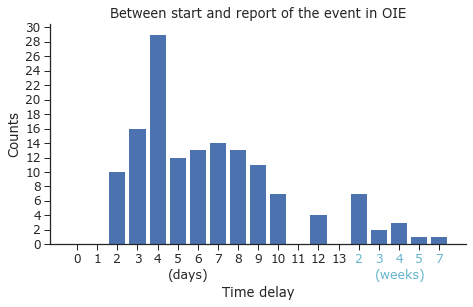

In [34]:
fig, ax = plt.subplots(1)
fig.set_size_inches(6.7,4.5);

xx = [str(x) for x in df_z.index]
xx_labels = [x if x<time_separation else x//7 for x in df_z.index]
ax.bar(xx,df_z['n'], lw=0, color='C0')

xtks = xx
ax.set_xticks(xtks)
ax.set_xticklabels(xx_labels);
ax.set_yticks(np.arange(0,max(df_z['n'])+2,2))
[ax.get_xticklabels()[idx].set_color("C9") for idx,x in enumerate(df_z.index) if x>=time_separation];
ax.annotate('(days)', (0,0), (118, -25), xycoords='axes fraction', textcoords='offset points', va='top', fontsize=12.5)
ax.annotate('(weeks)', (0,0), (325, -25), color='C9', xycoords='axes fraction', 
            textcoords='offset points', va='top', fontsize=12.5)
ax.set_xlabel("Time delay",labelpad=20)
ax.set_ylabel("Counts")
ax.set_title('Between start and report of the event in OIE');
 
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig("../../figures/draft/FigS1A.pdf",format='pdf',dpi=300,bbox_inches='tight')

In [35]:
df_z.n.sum()

143

In [36]:
df_z.loc[lambda d: d.index>=14].n.sum()

14

In [37]:
Df_.sort_values('Δt').tail(10)

id       lat       long      start   No  \
117  117  30.27361   94.81111 2019-03-21  163   
50    50  27.83100  111.87400 2018-10-22   38   
115  115  30.48303  108.45214 2019-03-10  161   
31    31  28.48300  111.88700 2018-10-03  139   
26    26  28.96300  111.48500 2018-09-28  139   
1      1  42.02000  123.36600 2018-08-07    3   
2      2  42.02000  123.42700 2018-08-07    3   
114  114  29.97398   93.69989 2019-03-07  163   
112  112  29.39055   94.42000 2019-03-02  163   
150  150  34.47638  104.37222 2019-09-23   96   

                                report  report_info  order date_report  \
117  en_imm_0000030086_20190408_180808         True      3  2019-04-08   
50   en_fup_0000028575_20181109_173542         True      5  2018-11-09   
115  en_imm_0000030007_20190417_113154         True      1  2019-03-30   
31   en_imm_0000028369_20181024_123506         True      2  2018-10-23   
26   en_imm_0000028369_20181024_123506         True      1  2018-10-23   
1    en_fup_0000027688_20180907_184405         True      5  2018-09-07   
2    en_fup_0000027688_20180907_184405         True      2  2018-09-07   
114  en_imm_0000030086_20190408_180808         True      2  2019-04-08   
112  en_imm_0000030086_20190408_180808         True      1  2019-04-08   
150  en_fup_0000030205_20191115_123657         True      3  2019-11-15   

    date_submission  ...        end species susceptible  cases deaths  \
117      2019-04-08  ... 2019-05-28   Swine        79.0   21.0     21   
50       2018-11-09  ... 2018-12-23   Swine         9.0    4.0      1   
115      2019-03-30  ...        NaT   Swine        83.0   83.0     73   
31       2018-10-24  ... 2018-12-07   Swine       546.0   44.0     17   
26       2018-10-24  ... 2018-12-17   Swine       268.0  208.0     31   
1        2018-09-07  ... 2018-12-04   Swine       140.0    1.0      0   
2        2018-09-07  ... 2018-12-04   Swine       160.0    3.0      0   
114      2019-04-08  ... 2019-05-28   Swine         7.0    2.0      2   
112      2019-04-08  ... 2019-05-28   Swine      5664.0  240.0     32   
150      2019-11-15  ...        NaT   Swine       287.0  265.0    265   

     destroyed  slaughtered        region  Δt      unit  
117         58          0.0     Southwest  18   Village  
50           8          0.0  Southcentral  18  Backyard  
115         10          0.0  Southcentral  20  Backyard  
31         529          0.0  Southcentral  21      Farm  
26         237          0.0  Southcentral  26      Farm  
1          140          0.0     Northeast  31      Farm  
2          160          0.0     Northeast  31      Farm  
114          5          0.0     Southwest  32  Backyard  
112       5632          0.0     Southwest  37      Farm  
150         22          NaN     Northwest  53      Farm  

[10 rows x 23 columns]

## Fitting to different distributions of the reporting delay without throwing away "negative" cases

In [38]:
Df_.loc[lambda d: d.report_info==True][:5]

id      lat      long      start   No                             report  \
0   0  42.0225  123.2932 2018-08-01  128  en_imm_0000027442_20180803_155752   
1   1  42.0200  123.3660 2018-08-07    3  en_fup_0000027688_20180907_184405   
2   2  42.0200  123.4270 2018-08-07    3  en_fup_0000027688_20180907_184405   
3   3  34.7240  113.8480 2018-08-14  129  en_imm_0000027568_20180816_165812   
4   4  34.6280  119.0540 2018-08-15  130  en_imm_0000027598_20180820_154827   

   report_info  order date_report date_submission  ...        end species  \
0         True      1  2018-08-03      2018-08-03  ... 2018-10-01   Swine   
1         True      5  2018-09-07      2018-09-07  ... 2018-12-04   Swine   
2         True      2  2018-09-07      2018-09-07  ... 2018-12-04   Swine   
3         True      1  2018-08-16      2018-08-16  ... 2018-10-01   Swine   
4         True      1  2018-08-19      2018-08-19  ... 2018-10-04   Swine   

  susceptible  cases deaths  destroyed  slaughtered        region  Δt  \
0       383.0   47.0     47        336          0.0     Northeast   2   
1       140.0    1.0      0        140          0.0     Northeast  31   
2       160.0    3.0      0        160          0.0     Northeast  31   
3       260.0   30.0     30        230          0.0  Southcentral   2   
4       615.0  615.0     88        527          0.0          East   4   

             unit  
0            Farm  
1            Farm  
2            Farm  
3  Slaughterhouse  
4            Farm  

[5 rows x 23 columns]

In [39]:
Df_delay = Df_.loc[:,['report_info','start','date_report','report']]#.loc[lambda d: d.report_info==True]
Df_delay[:5]

report_info      start date_report                             report
0         True 2018-08-01  2018-08-03  en_imm_0000027442_20180803_155752
1         True 2018-08-07  2018-09-07  en_fup_0000027688_20180907_184405
2         True 2018-08-07  2018-09-07  en_fup_0000027688_20180907_184405
3         True 2018-08-14  2018-08-16  en_imm_0000027568_20180816_165812
4         True 2018-08-15  2018-08-19  en_imm_0000027598_20180820_154827

In [40]:
# extracting release date from the report name
Df_delay['date_release'] = [pd.to_datetime(str.split(x,'_')[-2],format='%Y%m%d') for x in Df_delay.report]
Df_delay[:5]

report_info      start date_report                             report  \
0         True 2018-08-01  2018-08-03  en_imm_0000027442_20180803_155752   
1         True 2018-08-07  2018-09-07  en_fup_0000027688_20180907_184405   
2         True 2018-08-07  2018-09-07  en_fup_0000027688_20180907_184405   
3         True 2018-08-14  2018-08-16  en_imm_0000027568_20180816_165812   
4         True 2018-08-15  2018-08-19  en_imm_0000027598_20180820_154827   

  date_release  
0   2018-08-03  
1   2018-09-07  
2   2018-09-07  
3   2018-08-16  
4   2018-08-20

In [41]:
# choosing time zero
t0 = np.min(Df_delay.start)
Df_delay['time_start'] = (Df_delay.start-t0).astype('timedelta64[D]').astype('int')
Df_delay['time_report'] = (Df_delay.date_report-t0).astype('timedelta64[D]').astype('int')
Df_delay['time_release'] = (Df_delay.date_release-t0).astype('timedelta64[D]').astype('int')

Df_delay['time_report_boundaries'] = [(x,x+1) if z==True else (q+1,y+1) for x,q,y,z 
                                 in zip(Df_delay.time_report, Df_delay.time_start,
                                        Df_delay.time_release, Df_delay.report_info)]

Df_delay['time_report_lower'] = [x[0] for x in Df_delay.time_report_boundaries]
Df_delay['time_report_upper'] = [x[1] for x in Df_delay.time_report_boundaries]
Df_delay.drop('time_report_boundaries',1,inplace=True)

Df_delay[:5]

report_info      start date_report                             report  \
0         True 2018-08-01  2018-08-03  en_imm_0000027442_20180803_155752   
1         True 2018-08-07  2018-09-07  en_fup_0000027688_20180907_184405   
2         True 2018-08-07  2018-09-07  en_fup_0000027688_20180907_184405   
3         True 2018-08-14  2018-08-16  en_imm_0000027568_20180816_165812   
4         True 2018-08-15  2018-08-19  en_imm_0000027598_20180820_154827   

  date_release  time_start  time_report  time_release  time_report_lower  \
0   2018-08-03           0            2             2                  2   
1   2018-09-07           6           37            37                 37   
2   2018-09-07           6           37            37                 37   
3   2018-08-16          13           15            15                 15   
4   2018-08-20          14           18            19                 18   

   time_report_upper  
0                  3  
1                 38  
2                 38  
3                 16  
4                 19

In [42]:
def makeDelayModel_for_delay(modeldistribution='Gamma'):
    model = pm.Model()
    K = Df_delay.shape[0]
    
    with model:
        start = pm.Uniform('start',Df_delay.time_start,Df_delay.time_start+1,shape=(K,))
        report = pm.Uniform('report',Df_delay.time_report_lower,Df_delay.time_report_upper,shape=(K,))
        delta = pm.Deterministic('delta', report-start)
            
    if(modeldistribution=='Weibull'):
        with model:
            delaymean = pm.HalfNormal('delaymean', sd=20)
            k = pm.HalfNormal('k')
            θ = delaymean/tt.gamma(1+1/k)
            delaysd = pm.Deterministic('delaysd',θ*tt.sqrt(tt.gamma(1+2/k)-tt.gamma(1+1/k)**2))
            pm.Weibull('like', θ, k, observed=delta)
    elif(modeldistribution=='Gamma'):
        with model:
            delaymean = pm.HalfNormal('delaymean', sd=20)
            delaysd = pm.HalfNormal('delaysd', sd=20)
            pm.Gamma('like', mu=delaymean, sd=delaysd, observed=delta)
    elif(modeldistribution=='Lognormal'):
        with model:
            μ = pm.Normal('μ',sd=10)
            σ = pm.HalfNormal('σ',sd=10)
            delaymean = pm.Deterministic('delaymean',tt.exp(μ+σ**2/2))
            delaysd = pm.Deterministic('delaysd',tt.sqrt((tt.exp(σ**2)-1)*tt.exp(2*μ+σ**2)))
            pm.Lognormal('like', μ, sigma=σ, observed=delta)
    # mixture
    elif (modeldistribution=='GammaX2'):
        with model:
            delaymean = pm.HalfNormal('delaymean', sd=20, shape=2, transform=tr.ordered, testval=np.array([7, 14]))
            delaysd = pm.HalfNormal('delaysd', sd=20, shape=2)
            components = pm.Gamma.dist(mu=delaymean, sd=delaysd, shape=2)
            w = pm.Dirichlet('w', a=np.array([1.,1.])) 
            pm.Mixture('like', w=w, comp_dists=components, observed=delta)    
    elif (modeldistribution=='GammaWeibull'):
        with model:
            delaymean = pm.HalfNormal('delaymean', sd=20, transform=tr.ordered, shape=2, testval=np.array([7, 14]))
            k2 = pm.HalfNormal('k2')
            θ2 = delaymean[1]/tt.gamma(1+1/k2)
            delaysd1 = pm.HalfNormal('delaysd1', sd=20)
            delaysd2 = pm.Deterministic('delaysd2',θ2*tt.sqrt(tt.gamma(1+2/k2)-tt.gamma(1+1/k2)**2))
            dist1 = pm.Gamma.dist(mu=delaymean[0], sd=delaysd1)
            dist2 = pm.Weibull.dist(θ2, k2)
            w = pm.Dirichlet('w', a=np.array([1., 1.])) 
            pm.Mixture('like', w=w, comp_dists=[dist1, dist2], observed=delta)
    elif (modeldistribution=='GammaLognormal'):
        with model:
            delaymean = pm.HalfNormal('delaymean', sd=20, transform=tr.ordered, shape=2, testval=np.array([7, 14]))
            delaysd1 = pm.HalfNormal('delaysd1', sd=20)
            dist1 = pm.Gamma.dist(mu=delaymean[0], sd=delaysd1)
            σ2 = pm.HalfNormal('σ2',sd=10)
            μ2 = tt.log(delaymean[1])-σ2**2/2
            delaysd2 = pm.Deterministic('delaysd2',tt.sqrt((tt.exp(σ2**2)-1)*tt.exp(2*μ2+σ2**2)))
            dist2 = pm.Lognormal.dist(mu=μ2, sigma=σ2)
            w = pm.Dirichlet('w', a=np.array([1., 1.])) 
            pm.Mixture('like', w=w, comp_dists=[dist1, dist2], observed=delta)
    elif (modeldistribution=='WeibullX2'):
        with model:
            delaymean = pm.HalfNormal('delaymean', sd=20, transform=tr.ordered, shape=2, testval=np.array([7, 14]))
            k = pm.HalfNormal('k',shape=2)
            θ = delaymean/tt.gamma(1+1/k)
            delaysd = pm.Deterministic('delaysd',θ*tt.sqrt(tt.gamma(1+2/k)-tt.gamma(1+1/k)**2))
            components = pm.Weibull.dist(θ, k, shape=(2,))
            w = pm.Dirichlet('w', a=np.array([1.,1.])) 
            pm.Mixture('like', w=w, comp_dists=components, observed=delta) 
    elif (modeldistribution=='WeibullGamma'):
        with model:
            delaymean = pm.HalfNormal('delaymean', sd=20, transform=tr.ordered, shape=2, testval=np.array([7, 14]))
            # First Weibull
            k1 = pm.HalfNormal('k1')
            θ1 = delaymean[0]/tt.gamma(1+1/k1)
            delaysd1 = pm.Deterministic('delaysd1',θ1*tt.sqrt(tt.gamma(1+2/k1)-tt.gamma(1+1/k1)**2))
            dist1 = pm.Weibull.dist(θ1, k1)
            # Second Gamma
            delaysd2 = pm.HalfNormal('delaysd2', sd=20)
            dist2 = pm.Gamma.dist(mu=delaymean[1], sd=delaysd2)
            w = pm.Dirichlet('w', a=np.array([1., 1.])) 
            pm.Mixture('like', w=w, comp_dists=[dist1, dist2], observed=delta)
    elif (modeldistribution=='WeibullLognormal'):
        with model:
            delaymean = pm.HalfNormal('delaymean', sd=20, transform=tr.ordered, shape=2, testval=np.array([7, 14]))
            # First Weibull
            k1 = pm.HalfNormal('k1')
            θ1 = delaymean[0]/tt.gamma(1+1/k1)
            delaysd1 = pm.Deterministic('delaysd1',θ1*tt.sqrt(tt.gamma(1+2/k1)-tt.gamma(1+1/k1)**2))
            dist1 = pm.Weibull.dist(θ1, k1)
            # Second Lognormal
            σ2 = pm.HalfNormal('σ2',sd=20)
            μ2 = tt.log(delaymean[1])-σ2**2/2
            delaysd2 = pm.Deterministic('delaysd2',tt.sqrt((tt.exp(σ2**2)-1)*tt.exp(2*μ2+σ2**2)))
            dist2 = pm.Lognormal.dist(mu=μ2, sigma=σ2)
            w = pm.Dirichlet('w', a=np.array([1., 1.])) 
            pm.Mixture('like', w=w, comp_dists=[dist1, dist2], observed=delta)
    elif (modeldistribution=='LognormalX2'):
        with model:
            μ = pm.Normal('μ', sd=20, shape=2, transform=tr.ordered, testval=np.array([5, 6]))
            σ = pm.HalfNormal('σ',sd=20, shape=2)
            delaymean = pm.Deterministic('delaymean',tt.exp(μ+σ**2/2))
            delaysd = pm.Deterministic('delaysd',tt.sqrt((tt.exp(σ**2)-1)*tt.exp(2*μ+σ**2)))
            components = pm.Lognormal.dist(mu=μ, sigma=σ, shape=2)
            w = pm.Dirichlet('w', a=np.array([1.,1.])) 
            pm.Mixture('like', w=w, comp_dists=components, observed=delta) 
    elif (modeldistribution=='LognormalGamma'):
        with model:
            delaymean = pm.HalfNormal('delaymean', sd=20, transform=tr.ordered, shape=2, testval=np.array([7, 14]))
            # First lognormal
            σ1 = pm.HalfNormal('σ1',sd=20)
            μ1 = tt.log(delaymean[0])-σ1**2/2
            delaysd1 = pm.Deterministic('delaysd1',tt.sqrt((tt.exp(σ1**2)-1)*tt.exp(2*μ1+σ1**2)))
            dist1 = pm.Lognormal.dist(mu=μ1, sigma=σ1)
            # Second Gamma
            delaysd2 = pm.HalfNormal('delaysd2', sd=20)
            dist2 = pm.Gamma.dist(mu=delaymean[1], sd=delaysd2)
            w = pm.Dirichlet('w', a=np.array([1., 1.])) 
            pm.Mixture('like', w=w, comp_dists=[dist1, dist2], observed=delta)
    elif (modeldistribution=='LognormalWeibull'):
        with model:
            delaymean = pm.HalfNormal('delaymean', sd=20, transform=tr.ordered, shape=2, testval=np.array([7, 14]))
            # First lognormal
            σ1 = pm.HalfNormal('σ1',sd=10)
            μ1 = tt.log(delaymean[0])-σ1**2/2
            delaysd1 = pm.Deterministic('delaysd1',tt.sqrt((tt.exp(σ1**2)-1)*tt.exp(2*μ1+σ1**2)))
            dist1 = pm.Lognormal.dist(mu=μ1, sigma=σ1)
            # Second Weibull
            k2 = pm.HalfNormal('k2')
            θ2 = delaymean[1]/tt.gamma(1+1/k2)
            delaysd2 = pm.Deterministic('delaysd2',θ2*tt.sqrt(tt.gamma(1+2/k2)-tt.gamma(1+1/k2)**2))
            dist2 = pm.Weibull.dist(θ2, k2)
            w = pm.Dirichlet('w', a=np.array([1., 1.])) 
            pm.Mixture('like', w=w, comp_dists=[dist1, dist2], observed=delta)
        
    with model:
        trace = pm.sample(6000, tune=4000, cores = 4, init="advi", nuts_kwargs=dict(target_accept=0.95))
        
    model.name = modeldistribution

    return model,trace

In [43]:
# diverged: 'WeibullLognormal', 'LognormalX2','LognormalWeibull','GammaWeibull','WeibullX2',
models = []; traces = []
for distr_ in ['LognormalGamma','Weibull','Gamma','Lognormal',
               'WeibullGamma','GammaLognormal','GammaX2'
               ]:
    print(distr_)
    model, trace = makeDelayModel_for_delay(distr_)
    models.append(model); traces.append(trace)
    display(pm.summary(trace,varnames=[x for x in trace.varnames if ('delay' in x)&('log' not in x)&('ordered' not in x)|(x=='w')]))

LognormalGamma


Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average Loss = 453.57:   9%|▉         | 18033/200000 [00:07<01:14, 2440.59it/s]
Convergence achieved at 18100
Interrupted at 18,099 [9%]: Average Loss = 537.64
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [w, delaysd2, σ1, delaymean, report, start]
Sampling 4 chains, 0 divergences: 100%|██████████| 40000/40000 [06:50<00:00, 97.45draws/s] 
The number of effective samples is smaller than 10% for some parameters.


mean        sd  mc_error    hpd_2.5   hpd_97.5  \
delaymean__0   5.410114  0.472309  0.005391   4.516608   6.362247   
delaymean__1  23.616779  7.511645  0.088283  10.543638  37.575233   
delaysd1       3.640310  0.690087  0.008700   2.424909   5.051959   
delaysd2      14.458669  5.305679  0.119797   5.989793  26.499326   
w__0           0.904481  0.059066  0.000705   0.787523   0.994155   
w__1           0.095519  0.059066  0.000705   0.005845   0.212477   

                    n_eff      Rhat  
delaymean__0  8362.121231  1.000077  
delaymean__1  5990.083627  1.000064  
delaysd1      7349.273410  1.000061  
delaysd2      1501.225536  1.000918  
w__0          7333.016704  0.999986  
w__1          7333.016704  0.999986

Weibull


Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average Loss = 470.35:  25%|██▌       | 50343/200000 [00:12<00:38, 3891.60it/s]    
Convergence achieved at 50500
Interrupted at 50,499 [25%]: Average Loss = 3.4787e+209
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [k, delaymean, report, start]
Sampling 4 chains, 0 divergences: 100%|██████████| 40000/40000 [01:04<00:00, 616.63draws/s]


mean        sd  mc_error   hpd_2.5  hpd_97.5         n_eff  \
delaymean  1.041772  0.061242  0.000296  0.924244  1.164687  43789.222035   
delaysd    0.203899  0.011903  0.000064  0.181081  0.227628  34006.355190   

               Rhat  
delaymean  0.999979  
delaysd    0.999972

Gamma


Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average Loss = 444.89:   9%|▉         | 17691/200000 [00:06<01:02, 2916.94it/s]
Convergence achieved at 17700
Interrupted at 17,699 [8%]: Average Loss = 589.09
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [delaysd, delaymean, report, start]
Sampling 4 chains, 0 divergences: 100%|██████████| 40000/40000 [00:53<00:00, 741.74draws/s]


mean        sd  mc_error   hpd_2.5  hpd_97.5         n_eff  \
delaymean  6.785109  0.424234  0.001845  5.984099  7.635595  45892.495470   
delaysd    5.183537  0.436979  0.002023  4.357805  6.034507  39141.081234   

               Rhat  
delaymean  0.999957  
delaysd    0.999954

Lognormal


Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average Loss = 430.76:   9%|▉         | 17501/200000 [00:04<00:48, 3726.55it/s]
Convergence achieved at 17800
Interrupted at 17,799 [8%]: Average Loss = 517.68
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, μ, report, start]
Sampling 4 chains, 0 divergences: 100%|██████████| 40000/40000 [00:49<00:00, 812.43draws/s]


mean        sd  mc_error   hpd_2.5  hpd_97.5         n_eff  \
delaymean  6.520557  0.445953  0.002878  5.675563  7.403644  27397.314660   
delaysd    5.572061  0.717926  0.004646  4.300940  7.042131  27756.096717   

               Rhat  
delaymean  1.000009  
delaysd    0.999960

WeibullGamma


Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average Loss = 452.37:   8%|▊         | 16795/200000 [00:09<01:41, 1809.68it/s]
Convergence achieved at 16900
Interrupted at 16,899 [8%]: Average Loss = 534.89
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [w, delaysd2, k1, delaymean, report, start]
Sampling 4 chains, 3 divergences: 100%|██████████| 40000/40000 [01:59<00:00, 334.61draws/s]
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 10% for some parameters.


mean        sd  mc_error   hpd_2.5   hpd_97.5        n_eff  \
delaymean__0   2.169350  0.675046  0.021130  1.479327   3.863112   995.889669   
delaymean__1  13.378620  4.121421  0.111491  7.112943  22.175110  1228.092902   
delaysd1       0.615682  1.296093  0.042262  0.320094   1.224926  1349.657771   
delaysd2       9.798518  2.939803  0.086658  5.090040  15.735934  1001.663250   
w__0           0.660766  0.187288  0.007306  0.271085   0.916293   457.625979   
w__1           0.339234  0.187288  0.007306  0.083707   0.728915   457.625979   

                  Rhat  
delaymean__0  1.005282  
delaymean__1  1.000596  
delaysd1      1.002020  
delaysd2      1.000681  
w__0          1.001591  
w__1          1.001591

GammaLognormal


Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average Loss = 433.95:  11%|█         | 21850/200000 [00:14<01:59, 1492.42it/s]
Convergence achieved at 21900
Interrupted at 21,899 [10%]: Average Loss = 487.21
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [w, σ2, delaysd1, delaymean, report, start]
Sampling 4 chains, 63 divergences: 100%|██████████| 40000/40000 [01:50<00:00, 361.24draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There were 62 divergences after tuning. Increase `target_accept` or reparameterize.
The estimated number of effective samples is smaller than 200 for some parameters.


mean         sd  mc_error   hpd_2.5   hpd_97.5  \
delaymean__0   4.718325   0.655926  0.028128  3.431103   5.797824   
delaymean__1  14.691652   6.565890  0.133859  5.941913  27.613145   
delaysd1       2.691267   2.843574  0.222329  1.227609   3.484387   
delaysd2      14.878483  10.212213  0.154494  4.559558  31.463171   
w__0           0.671352   0.226541  0.008636  0.149074   0.961641   
w__1           0.328648   0.226541  0.008636  0.038359   0.850926   

                    n_eff      Rhat  
delaymean__0   532.211750  1.004429  
delaymean__1  3342.431763  1.001054  
delaysd1       159.418829  1.011789  
delaysd2      6151.621908  1.000492  
w__0           714.684268  1.002597  
w__1           714.684268  1.002597

GammaX2


Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average Loss = 431.35:  10%|█         | 20330/200000 [00:12<01:47, 1670.68it/s]
Convergence achieved at 20400
Interrupted at 20,399 [10%]: Average Loss = 472.71
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [w, delaysd, delaymean, report, start]
Sampling 4 chains, 0 divergences: 100%|██████████| 40000/40000 [01:34<00:00, 421.08draws/s]


mean        sd  mc_error    hpd_2.5   hpd_97.5  \
delaymean__0   5.010093  0.338779  0.002988   4.352288   5.688378   
delaymean__1  20.373973  5.756480  0.044525  10.281123  31.358034   
delaysd__0     2.733180  0.335402  0.003115   2.083047   3.391573   
delaysd__1    13.505306  3.876350  0.027921   7.459012  21.243571   
w__0           0.860623  0.064925  0.000572   0.733242   0.964756   
w__1           0.139377  0.064925  0.000572   0.035244   0.266758   

                     n_eff      Rhat  
delaymean__0  14883.604021  0.999937  
delaymean__1  15505.313581  0.999932  
delaysd__0    13519.824706  0.999928  
delaysd__1    22517.906026  1.000022  
w__0          14391.674316  0.999957  
w__1          14391.674316  0.999957

In [44]:
# df_comp_WAIC = az.compare(dict([(models[x].name, traces[x]) for x in range(len(models))]))
df_comp_WAIC = pm.compare(dict([(models[x], traces[x]) for x in range(len(models))]))
# az.plot_compare(df_comp_WAIC);
df_comp_WAIC

/home/aakhmetz/anaconda/lib/python3.7/site-packages/pymc3/stats.py:219: UserWarning: For one or more samples the posterior variance of the
        log predictive densities exceeds 0.4. This could be indication of
        WAIC starting to fail see http://arxiv.org/abs/1507.04544 for details
        
  """)
/home/aakhmetz/anaconda/lib/python3.7/site-packages/pymc3/stats.py:219: UserWarning: For one or more samples the posterior variance of the
        log predictive densities exceeds 0.4. This could be indication of
        WAIC starting to fail see http://arxiv.org/abs/1507.04544 for details
        
  """)
/home/aakhmetz/anaconda/lib/python3.7/site-packages/pymc3/stats.py:219: UserWarning: For one or more samples the posterior variance of the
        log predictive densities exceeds 0.4. This could be indication of
        WAIC starting to fail see http://arxiv.org/abs/1507.04544 for details
        
  """)
/home/aakhmetz/anaconda/lib/python3.7/site-packages/pymc3/stats.py:219: UserWar

WAIC  pWAIC  dWAIC weight     SE   dSE var_warn
LognormalGamma  829.62   9.72      0      1  29.61     0        1
GammaX2         833.33   8.51   3.71      0  29.35  2.32        1
GammaLognormal  833.98   8.84   4.36      0  29.62  1.54        1
Lognormal       836.01   6.05   6.39      0  30.72  5.18        1
WeibullGamma    849.85  13.05  20.23      0  30.95  4.23        1
Gamma           871.63    4.9  42.01      0  34.66  13.6        1
Weibull         891.38   5.44  61.76      0  36.55  14.3        1

In [45]:
provinces = Df['province'].unique().tolist()
print(len(provinces))
str(provinces)

31


"['Liaoning', 'Henan', 'Jiangsu', 'Zhejiang', 'Anhui', 'Heilongjiang', 'Inner Mongolia', 'Jilin', 'Guizhou', 'Hunan', 'Yunnan', 'Shanxi', 'Hubei', 'Jiangxi', 'Tianjin', 'Beijing', 'Sichuan', 'Shaanxi', 'Chongking', 'Fujian', 'Guangdong', 'Shanghai', 'Gansu', 'Qinghai', 'Guangxi', 'Xinjiang', 'Ningxia', 'Hainan', 'Shandong', 'Hebei', 'Tibet']"

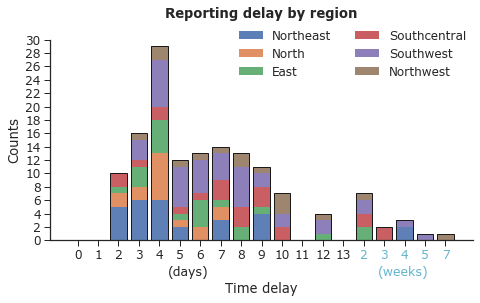

In [46]:
fig, ax = plt.subplots(1)
fig.set_size_inches(7,4.5);

ybottom = [0]*len(xx)

for idx,rgn in enumerate(rgns):
    Df_by_region = Df_.loc[lambda d: d.report_info==True].loc[lambda d: d['region']==rgn]
    z = getCounts(Df_by_region['Δt'])

    time_separation = 14
    z = [[(zz[0]//7)*7,zz[1]] if zz[0]>=time_separation else zz for zz in z]
    df_z = pd.DataFrame(z,columns=['delay','n']).groupby('delay').sum().reset_index()
    df_z = pd.DataFrame({'delay':[int(x) for x in xx]}).merge(df_z,how='outer').fillna(0).\
            sort_values('delay').set_index('delay')
    df_z['n'] = df_z['n'].astype(int)

    ax.bar(xx, df_z['n'], bottom=ybottom, label=rgn, lw=0, color='C%d'%idx, alpha=.9)
    ybottom += df_z['n'].values
    
ax.bar(xx, ybottom, edgecolor='k', facecolor='none')

xtks = xx
ax.set_ylim(top=max(ybottom)+1)
ax.set_xticks(xtks)
ax.set_xticklabels(xx_labels);
ax.set_yticks(np.arange(0,max(ybottom)+2,2))
[ax.get_xticklabels()[idx].set_color("C9") for idx,x in enumerate(df_z.index) if x>=time_separation];
ax.annotate('(days)', (0,0), (118, -25), xycoords='axes fraction', textcoords='offset points', va='top', fontsize=12.5)
ax.annotate('(weeks)', (0,0), (328, -25), color='C9', xycoords='axes fraction', 
            textcoords='offset points', va='top', fontsize=12.5)
ax.set_xlabel("Time delay",labelpad=20)
ax.set_ylabel("Counts")

ax.set_title('Reporting delay by region',fontweight="bold",y=1.08);
# ax.legend(ncol=1,fontsize=12);
# l = ax.legend(bbox_to_anchor=(.8,1.1), loc="upper left", ncol=1, title='region', fontsize=12);
l = ax.legend(bbox_to_anchor=(.42,1.1), loc="upper left", fontsize=12, ncol=2, frameon=False);

plt.setp(l.get_title(), multialignment='center')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig("../../figures/draft/FigS1-reporting by region.pdf",format='pdf',dpi=300,bbox_inches='tight')

In [47]:
df_rgns_colors = pd.DataFrame({'region': rgns})
df_rgns_colors['color'] = ['C%d'%x for x in df_rgns_colors.index]
df_rgns_colors

region color
0     Northeast    C0
1         North    C1
2          East    C2
3  Southcentral    C3
4     Southwest    C4
5     Northwest    C5

In [48]:
provinces = []
for rgn in rgns:
    provinces = np.r_[provinces,Df_.loc[Df_.region==rgn,'province'].drop_duplicates()]
provinces

array(['Liaoning', 'Heilongjiang', 'Jilin', 'Inner Mongolia', 'Tianjin',
       'Shanxi', 'Beijing', 'Hebei', 'Jiangsu', 'Anhui', 'Zhejiang',
       'Fujian', 'Jiangxi', 'Shanghai', 'Shandong', 'Henan', 'Hunan',
       'Hubei', 'Guangdong', 'Hainan', 'Guizhou', 'Yunnan', 'Chongking',
       'Sichuan', 'Guangxi', 'Tibet', 'Shaanxi', 'Qinghai', 'Gansu',
       'Ningxia', 'Xinjiang'], dtype=object)

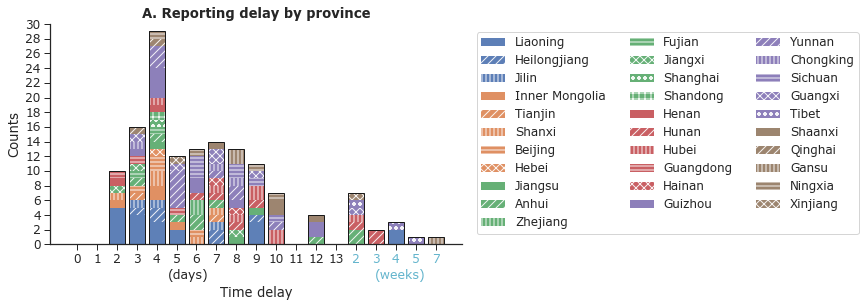

In [49]:
fig, ax = plt.subplots(1)
fig.set_size_inches(12.2,4.5);

ybottom = [0]*len(xx)

hatches = [None,"///","|||","---","xxx",'oo','++']*8
df_rgns_colors['hatch'] = 0

for idx,province in enumerate(provinces):
    Df_by_province = Df_.loc[lambda d: d.report_info==True].loc[Df_['province']==province]
    z = getCounts(Df_by_province['Δt'])
    hatch_count = df_rgns_colors.loc[df_rgns_colors.region==Df_by_province.region.iloc[0]]['hatch'].iloc[0]

    time_separation = 14
    z = [[(zz[0]//7)*7,zz[1]] if zz[0]>=time_separation else zz for zz in z]
    df_z = pd.DataFrame(z,columns=['delay','n']).groupby('delay').sum().reset_index()
    df_z = pd.DataFrame({'delay':[int(x) for x in xx]}).merge(df_z,how='outer').fillna(0).sort_values('delay').set_index('delay')
    df_z['n'] = df_z['n'].astype(int)

    ax.bar(xx, df_z['n'], bottom=ybottom, lw=0, label=province, hatch=hatches[hatch_count], alpha=.9,
           facecolor=df_rgns_colors.loc[df_rgns_colors.region==Df_by_province.region.iloc[0]].color.item())
    ybottom += df_z['n'].values
    df_rgns_colors.loc[df_rgns_colors.region==Df_by_province.region.iloc[0],'hatch'] = hatch_count + 1
    
ax.bar(xx, ybottom, edgecolor='k', lw=1, facecolor='none')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

xtks = xx
ax.set_ylim(top=max(ybottom)+1)
ax.set_xticks(xtks)
ax.set_xticklabels(xx_labels);
ax.set_yticks(np.arange(0,max(ybottom)+2,2))
[ax.get_xticklabels()[idx].set_color("C9") for idx,x in enumerate(df_z.index) if x>=time_separation];
ax.annotate('(days)', (0,0), (118, -25), xycoords='axes fraction', textcoords='offset points', va='top', fontsize=12.5)
ax.annotate('(weeks)', (0,0), (325, -25), color='C9', xycoords='axes fraction', 
            textcoords='offset points', va='top', fontsize=12.5)
ax.set_xlabel("Time delay",labelpad=20)
l = ax.legend(bbox_to_anchor=(1.02,.99), loc="upper left", ncol=3, fontsize=12, frameon=True);

ax.set_ylabel("Counts")
ax.set_title('A. Reporting delay by province',fontweight="bold");

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig("../../figures/draft/FigS1-reporting_by_province.pdf",format='pdf',dpi=300,bbox_inches='tight')

## By unit

In [50]:
Df_['unit'] = 0
units = ['Village','Farm','Backyard','Slaughterhouse','Other']
for unt in units:
    Df_.loc[[unt in x for x in Df_['location']],'unit'] = unt

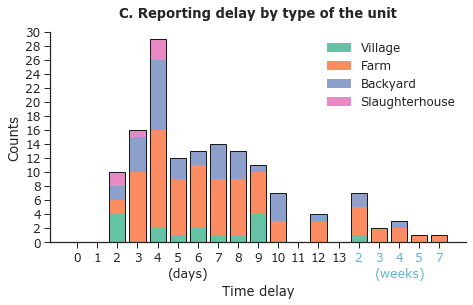

In [51]:
fig, ax = plt.subplots(1)
fig.set_size_inches(6.7,4.5);
col = sns.color_palette("Set2", 11)

ybottom = [0]*len(xx)

for idx,unt in enumerate(units[:-1]):
    Df_by_province = Df_.loc[lambda d: d.report_info==True].loc[Df_['unit']==unt]
    z = getCounts(Df_by_province['Δt'])

    time_separation = 14
    z = [[(zz[0]//7)*7,zz[1]] if zz[0]>=time_separation else zz for zz in z]
    df_z = pd.DataFrame(z,columns=['delay','n']).groupby('delay').sum().reset_index()
    df_z = pd.DataFrame({'delay':[int(x) for x in xx]}).merge(df_z,how='outer').fillna(0).sort_values('delay').set_index('delay')
    df_z['n'] = df_z['n'].astype(int)

    ax.bar(xx, df_z['n'], bottom=ybottom, lw=0, label=unt, facecolor=col[idx])
    ybottom += df_z['n'].values
    
ax.bar(xx, ybottom, edgecolor='k',facecolor='none')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

xtks = xx
ax.set_ylim(top=max(ybottom)+1)
ax.set_xticks(xtks)
ax.set_xticklabels(xx_labels);
ax.set_yticks(np.arange(0,max(ybottom)+2,2))
[ax.get_xticklabels()[idx].set_color("C9") for idx,x in enumerate(df_z.index) if x>=time_separation];
ax.annotate('(days)', (0,0), (118, -25), xycoords='axes fraction', textcoords='offset points', va='top', fontsize=12.5)
ax.annotate('(weeks)', (0,0), (325, -25), color='C9', xycoords='axes fraction', 
            textcoords='offset points', va='top', fontsize=12.5)
ax.set_xlabel("Time delay",labelpad=20)
ax.set_ylabel("Counts")
ax.set_title('C. Reporting delay by type of the unit',fontweight="bold",y=1.04);
# ax.legend(bbox_to_anchor=(1.04,1), loc="upper left", ncol=1,fontsize=12);
ax.legend(loc="best", ncol=1,fontsize=12, frameon=False);
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig("../../figures/draft/FigS1-reporting_by_unit.pdf",format='pdf',dpi=300,bbox_inches='tight')

## By size of the unit

In [52]:
Df_['size'] = 0
sizes = [10000,3000,1000,500,50,0]
for sz in sizes[::-1]:
    Df_.loc[Df_['susceptible']>=sz,'size'] = sz

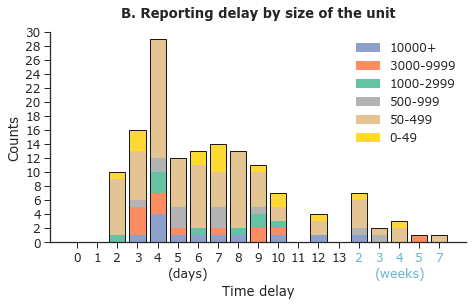

In [53]:
fig, ax = plt.subplots(1)
fig.set_size_inches(6.7,4.5);

ybottom = [0]*len(xx)

for idx,sz in enumerate(sizes):
    Df_by_province = Df_.loc[lambda d: d.report_info==True].loc[Df_['size']==sz]
    z = getCounts(Df_by_province['Δt'])

    time_separation = 14
    z = [[(zz[0]//7)*7,zz[1]] if zz[0]>=time_separation else zz for zz in z]
    df_z = pd.DataFrame(z,columns=['delay','n']).groupby('delay').sum().reset_index()
    df_z = pd.DataFrame({'delay':[int(x) for x in xx]}).merge(df_z,how='outer').fillna(0).sort_values('delay').set_index('delay')
    df_z['n'] = df_z['n'].astype(int)

    lbl = "%d-%d"%(sz,sizes[idx-1]-1) if idx>0 else "%d+"%sz
    ax.bar(xx, df_z['n'], bottom=ybottom, lw=0, label=lbl, facecolor=col[::-1][idx])
    ybottom += df_z['n'].values
    
ax.bar(xx, ybottom, edgecolor='k', facecolor='none')

xtks = xx
ax.set_ylim(top=max(ybottom)+1)
ax.set_xticks(xtks)
ax.set_xticklabels(xx_labels);
ax.set_yticks(np.arange(0,max(ybottom)+2,2))

[ax.get_xticklabels()[idx].set_color("C9") for idx,x in enumerate(df_z.index) if x>=time_separation];
ax.annotate('(days)', (0,0), (118, -25), xycoords='axes fraction', textcoords='offset points', va='top', 
            fontsize=12.5)
ax.annotate('(weeks)', (0,0), (325, -25), color='C9', xycoords='axes fraction', 
            textcoords='offset points', va='top', fontsize=12.5)
ax.set_xlabel("Time delay",labelpad=20)
ax.set_title('B. Reporting delay by size of the unit',fontweight="bold",y=1.04);
# ax.legend(bbox_to_anchor=(1.04,1), loc="upper left", ncol=1,fontsize=12);
ax.legend(loc="best", ncol=1,fontsize=12,frameon=False);
ax.set_ylabel("Counts")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig("../../figures/draft/FigS1-reporting_by_size.pdf",format='pdf',dpi=300,bbox_inches='tight')

# Generating Fig S1

In [54]:
%%capture
%%bash
filename=FigS1
pdflatex <<TeXScript
\documentclass{standalone}
\usepackage{tikz,graphicx}
\usepackage[T1]{fontenc}

\begin{document}
\begin{tikzpicture}
    \node[anchor=south west] at (0in,0in) {\includegraphics{../../figures/draft/FigS1-reporting_by_province.pdf}};
    \node[anchor=north west] at (0in,-.2in) {\includegraphics{../../figures/draft/FigS1-reporting_by_size.pdf}};
    \node[anchor=north west] at (6.5in,-.2in) {\includegraphics{../../figures/draft/FigS1-reporting_by_unit.pdf}};
    %\node[anchor=south east] at (0.27in,0in) {\Large {\bf D}};
\end{tikzpicture}
\end{document}
TeXScript
mv texput.pdf ../../figures/${filename}.pdf
rm texput.*
pdftoppm -png ../../figures/${filename}.pdf .output
mv .output-1.png ../../figures/pngs/${filename}.png

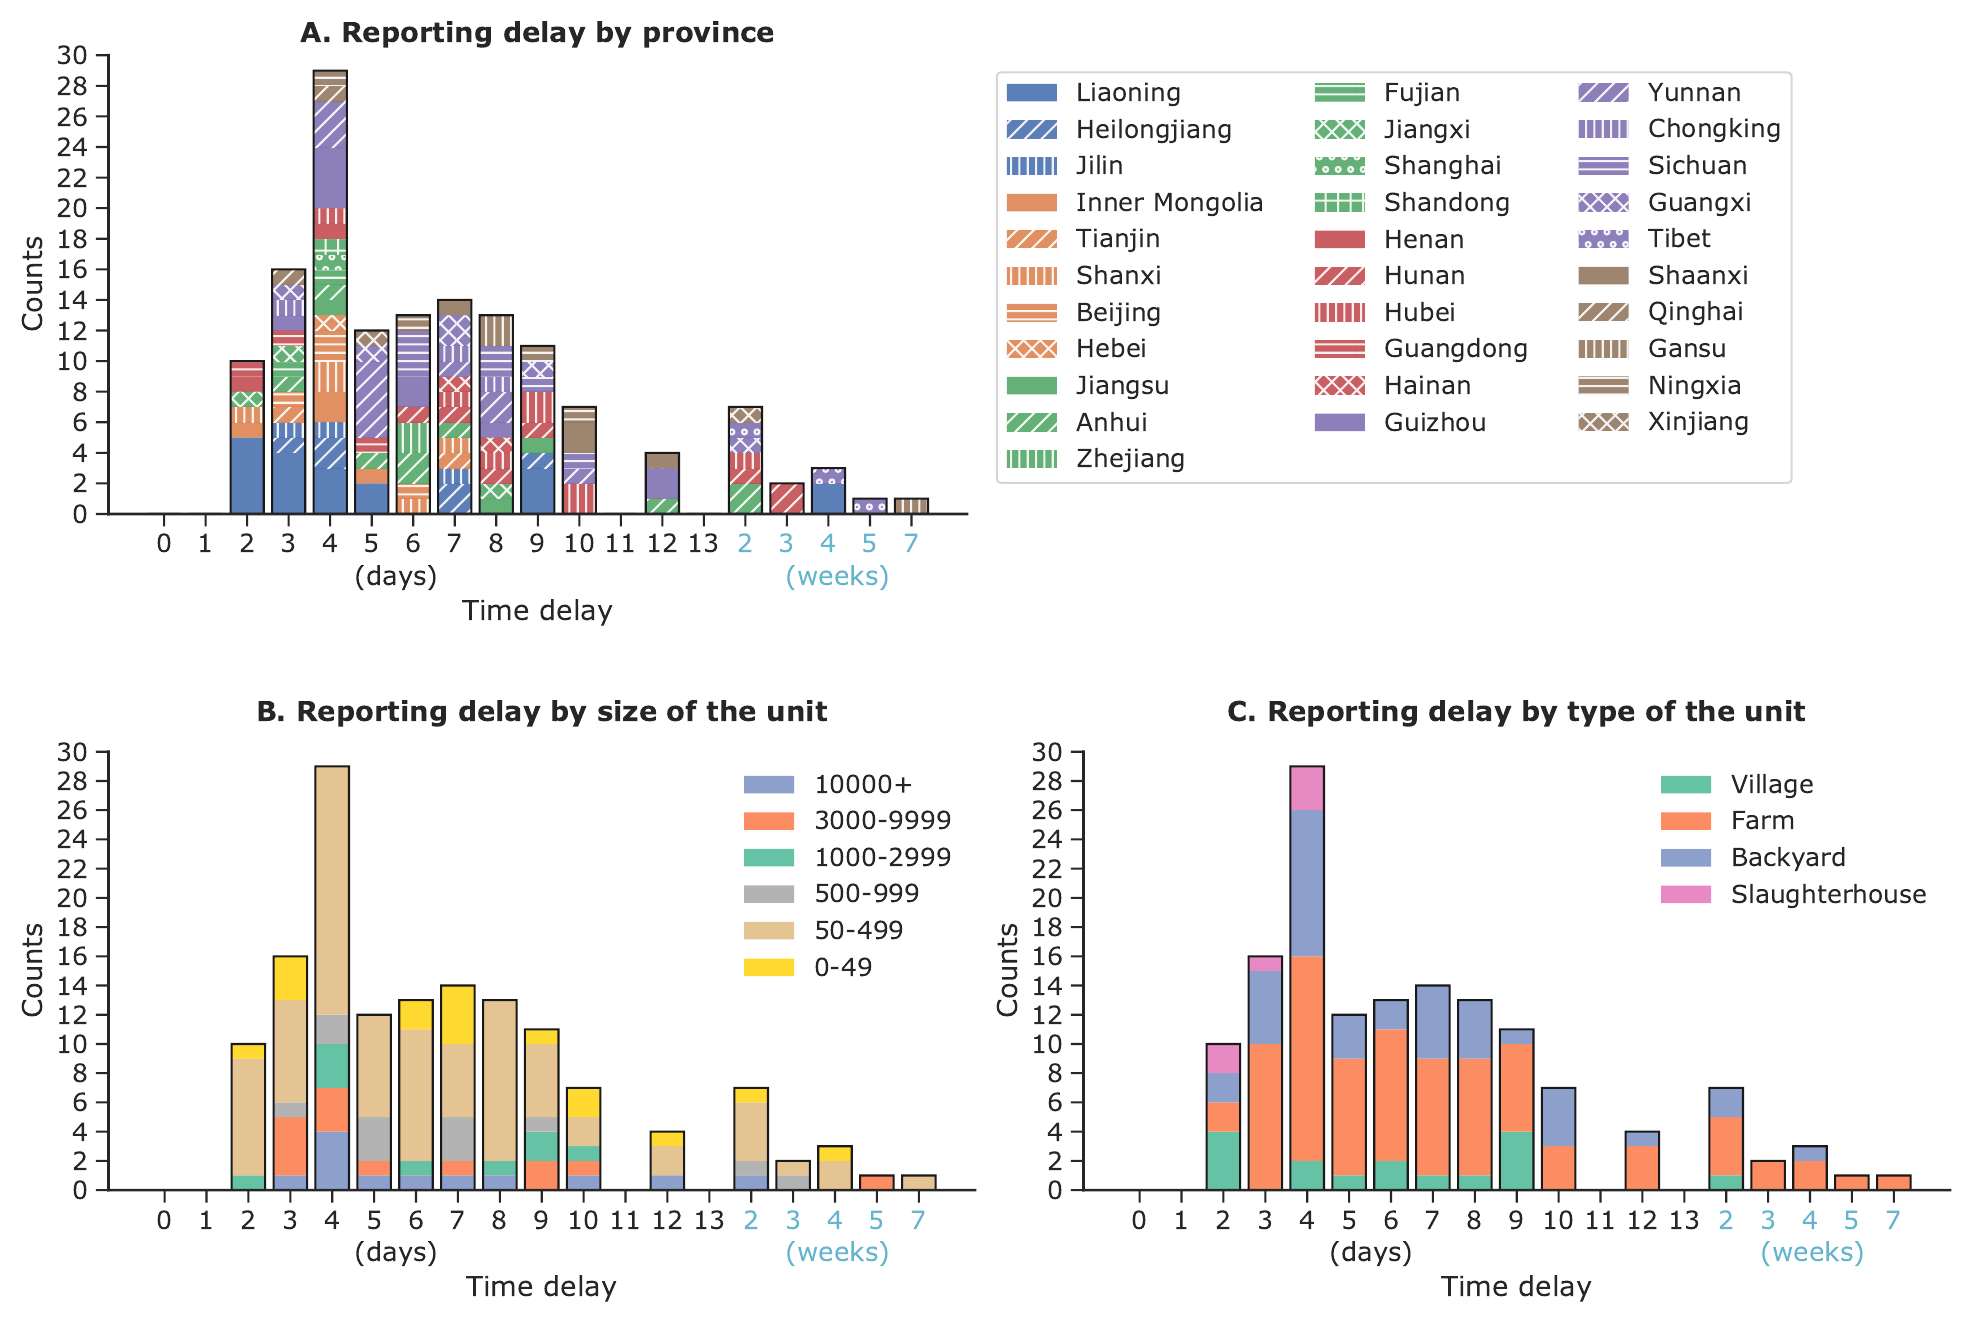

In [55]:
display(Image("../../figures/pngs/FigS1.png", width="75%"))

# Checking correlations

## B/w reporting delay and region

In [56]:
cw_lm=ols('Δt ~ C(region)',data=Df_.loc[lambda d: d.report_info==True]).fit() 
sm.stats.anova_lm(cw_lm, typ=2)

sum_sq     df         F    PR(>F)
C(region)   475.552896    5.0  2.006149  0.081548
Residual   6495.104446  137.0       NaN       NaN

## B/w reporting delay and unit type

In [57]:
cw_lm=ols('Δt ~ C(unit)',data=Df_.loc[lambda d: d.report_info==True]).fit() 
sm.stats.anova_lm(cw_lm, typ=2)

sum_sq     df         F    PR(>F)
C(unit)    203.115985    3.0  1.390614  0.248262
Residual  6767.541358  139.0       NaN       NaN

## B/w reporting delay and unit size

In [58]:
# Pearson's r and P value 
Df_na_drop = Df_.loc[Df_['susceptible'].dropna().index,:].loc[lambda d: d.report_info==True]
ss.pearsonr(Df_na_drop['Δt'],Df_na_drop['susceptible'])

(-0.041409631679734785, 0.6233897961949307)

## B/w reporting delay and unit size class

In [59]:
# Pearson's r and P value 
ss.pearsonr(Df_.loc[lambda d: d.report_info==True]['Δt'],Df_.loc[lambda d: d.report_info==True]['size'])

(-0.03805602462489957, 0.6518070010599847)

In [60]:
cw_lm=ols('Δt ~ C(size)',data=Df_.loc[lambda d: d.report_info==True]).fit() 
sm.stats.anova_lm(cw_lm, typ=2)

sum_sq     df         F    PR(>F)
C(size)     52.149033    5.0  0.206531  0.959276
Residual  6918.508310  137.0       NaN       NaN

## Odds ratio

In [61]:
threshold = 7 #days
Df1_ = Df_.loc[lambda d: d.report_info==True].copy()
Df1_['short_delay'] = Df1_['Δt']<=threshold
Df1_['large_farm'] = [int(x) if ~np.isnan(x) else y for x,y in zip(Df1_['susceptible'],Df1_['cases'])]
Df1_['large_farm'] = Df1_['large_farm']>=2000
Df1_ = Df1_.loc[:,['short_delay','large_farm']]
Dfx_ = Df1_.groupby(['large_farm','short_delay']).aggregate(len).unstack()
Dfx_

short_delay  False  True 
large_farm               
False           40     75
True             9     19

In [62]:
oddsratio, pvalue = ss.fisher_exact(Dfx_.values)
print("OddsR: ", oddsratio, "p-Value:", pvalue)

OddsR:  1.125925925925926 p-Value: 1.0


# Studying the change in effective reproduction number $R_t$

In [63]:
Df = pd.read_csv("../../data/ASF_data.csv",sep=",")
Df['start'] = pd.to_datetime(Df['start'],format='%d/%m/%Y')
Df['end'] = pd.to_datetime(Df['end'],format='%d/%m/%Y')
Df['date_report'] = pd.to_datetime(Df['date_report'],format='%d/%m/%Y')
Df['date_submission'] = pd.to_datetime(Df['date_submission'],format='%d/%m/%Y')
Df['date_confirmation'] = pd.to_datetime(Df['date_confirmation'],format='%d/%m/%Y')
# Df['susceptible'] = Df['susceptible'].astype('int')
Df[-3:]

No                             report     report_info  order  \
614  167  en_imm_0000031265_20190808_154111   (this report       1   
615  167  en_imm_0000031265_20190808_154111   (this report       2   
616  167  en_imm_0000031265_20190808_154111   (this report       3   

    date_report date_submission date_confirmation  province  \
614  2019-08-08      2019-08-08        2019-07-27  Liaoning   
615  2019-08-08      2019-08-08        2019-07-27  Liaoning   
616  2019-08-08      2019-08-08        2019-07-27  Liaoning   

                                              location       lat       long  \
614  Shenyang_Kangping_Other_Toll station exit of_H...  42.60777  123.27055   
615  Tieling_Xifeng_Other_Highway checkpoint for_An...  42.77722  124.85916   
616  Tieling_Xifeng_Other_Highway checkpoint for_An...  42.96083  124.85861   

         start end species  susceptible  cases  deaths  destroyed  slaughtered  
614 2019-07-26 NaT   Swine         70.0   20.0      20         50          0.0  
615 2019-07-26 NaT   Swine         65.0    1.0       1         64          0.0  
616 2019-07-26 NaT   Swine         70.0    1.0       1         69          0.0

In [64]:
Df.shape                                                     

(617, 19)

**Removing those toll/road accidents**

In [65]:
Df['unit'] = 0
units = ['Village','Farm','Backyard','Slaughterhouse','Other']
for unt in units:
    Df.loc[[unt in x for x in Df['location']],'unit'] = unt

In [66]:
Df_toll = Df.loc[lambda d: d.unit=='Other']
Df_toll 

No                             report     report_info  order  \
420   91  en_fup_0000029831_20190314_125755   (this report       6   
449  100  en_fup_0000030554_20190521_165815   other report       6   
462  104  en_fup_0000030681_20190603_134021   (this report       2   
464  105  en_fup_0000030749_20190621_162253   other report       2   
469  106  en_fup_0000030822_20190624_185302   other report       2   
491  110  en_fup_0000031125_20190719_182543   other report       6   
503  112  en_fup_0000031340_20190809_165150   (this report       6   
535  123  en_fup_0000031892_20190924_175316   other report       6   
542  124  en_fup_0000032148_20191021_155119   other report       6   
544  124  en_fup_0000032148_20191021_155119   (this report       8   
552  126  en_fup_0000032332_20191115_122844   (this report       2   
614  167  en_imm_0000031265_20190808_154111   (this report       1   
615  167  en_imm_0000031265_20190808_154111   (this report       2   
616  167  en_imm_0000031265_20190808_154111   (this report       3   

    date_report date_submission date_confirmation   province  \
420  2019-03-13      2019-03-14        2018-11-15    Sichuan   
449  2019-05-21      2019-05-21        2018-11-15    Sichuan   
462  2019-06-01      2019-06-01        2019-05-18    Guizhou   
464  2019-06-21      2019-06-21        2019-05-18    Guizhou   
469  2019-06-22      2019-06-24        2019-05-18    Guizhou   
491  2019-07-19      2019-07-19        2018-11-15    Sichuan   
503  2019-08-09      2019-08-09        2019-02-18    Guangxi   
535  2019-09-24      2019-09-24        2019-02-18    Guangxi   
542  2019-10-18      2019-10-21        2019-02-18    Guangxi   
544  2019-10-18      2019-10-21        2019-02-18    Guangxi   
552  2019-11-15      2019-11-15        2019-03-21  Chongking   
614  2019-08-08      2019-08-08        2019-07-27   Liaoning   
615  2019-08-08      2019-08-08        2019-07-27   Liaoning   
616  2019-08-08      2019-08-08        2019-07-27   Liaoning   

                                              location       lat       long  \
420  Guang an_Linshui_Other_Toll station for G65_hi...  30.28859  106.90877   
449  Guang an_Linshui_Other_Toll station for G65_hi...  30.28859  106.90877   
462  Buyi and Miao_Autonomous Prefecture of_QianNan...  26.20610  107.50087   
464  Buyi and Miao_Autonomous Prefecture of_QianNan...  26.20610  107.50087   
469  Buyi and Miao_Autonomous Prefecture of_QianNan...  26.20610  107.50087   
491  Guang an_Linshui_Other_Toll station for G65_hi...  30.28859  106.90877   
503  Fangchenggang_Fangcheng District_Other_Toll st...  21.71777  108.45638   
535  Fangchenggang_Fangcheng District_Other_Toll st...  21.71777  108.45638   
542  Fangchenggang_Fangcheng District_Other_Toll st...  21.71777  108.45638   
544  Yulin_Bobai_Other_Highway checkpoint for_Anima...  21.83138  109.74750   
552  Dianjiang_Other_Toll station for G50_highway i...  30.18956  107.30243   
614  Shenyang_Kangping_Other_Toll station exit of_H...  42.60777  123.27055   
615  Tieling_Xifeng_Other_Highway checkpoint for_An...  42.77722  124.85916   
616  Tieling_Xifeng_Other_Highway checkpoint for_An...  42.96083  124.85861   

         start end species  susceptible  cases  deaths  destroyed  \
420 2019-03-10 NaT   Swine        150.0    9.0       9        141   
449 2019-03-10 NaT   Swine        150.0    9.0       9        141   
462 2019-05-30 NaT   Swine         32.0    1.0       1         31   
464 2019-05-30 NaT   Swine         32.0    1.0       1         31   
469 2019-05-30 NaT   Swine         32.0    1.0       1         31   
491 2019-03-10 NaT   Swine        150.0    9.0       9        141   
503 2019-08-05 NaT   Swine         52.0   51.0       1         51   
535 2019-08-05 NaT   Swine         52.0   51.0       1         51   
542 2019-08-05 NaT   Swine         52.0   51.0       1         51   
544 2019-10-12 NaT   Swine         48.0    9.0       9         39   
552 2019-11-06 NaT   Swine         25.0    1.0   

In [67]:
Df = Df.loc[~Df.index.isin(Df_toll.index)].reset_index(drop=True)
Df[:4]

No                             report    report_info  order date_report  \
0   0  en_fup_0000027458_20180806_155743  other report       1  2018-08-04   
1   1  en_fup_0000027533_20180813_175309  other report       1  2018-08-10   
2   2  en_fup_0000027570_20180816_175933  other report       1  2018-08-16   
3   3  en_fup_0000027688_20180907_184405  other report       1  2018-09-07   

  date_submission date_confirmation  province  \
0      2018-08-04        2018-08-03  Liaoning   
1      2018-08-10        2018-08-03  Liaoning   
2      2018-08-16        2018-08-03  Liaoning   
3      2018-09-07        2018-08-03  Liaoning   

                                            location      lat      long  \
0  Shenyang_Shenbei New District_Farm_Shenbei Street  42.0225  123.2932   
1  Shenyang_Shenbei New District_Farm_Shenbei Street  42.0225  123.2932   
2  Shenyang_Shenbei New District_Farm_Shenbei Street  42.0225  123.2932   
3  Shenyang_Shenbei New District_Farm_Shenbei Street  42.0225  123.2932   

       start end species  susceptible  cases  deaths  destroyed  slaughtered  \
0 2018-08-01 NaT   Swine       8116.0   47.0      47       8069          0.0   
1 2018-08-01 NaT   Swine       8116.0   47.0      47       8069          0.0   
2 2018-08-01 NaT   Swine       8792.0   47.0      47       8745          0.0   
3 2018-08-01 NaT   Swine      19420.0   47.0      47      19373          0.0   

   unit  
0  Farm  
1  Farm  
2  Farm  
3  Farm

In [68]:
Df.shape

(603, 20)

In [69]:
Df_report_start = Df.sort_values('date_submission').groupby(['start','lat','long']).first().\
    rename(columns={'date_report':'date_report_start','date_submission':'date_submission_start'}).\
    loc[:,['date_report_start','date_submission_start']].reset_index()
Df_report_start[:5]

start      lat      long date_report_start date_submission_start
0 2018-08-01  42.0225  123.2932        2018-08-03            2018-08-03
1 2018-08-07  42.0200  123.3660        2018-09-07            2018-09-07
2 2018-08-07  42.0200  123.4270        2018-09-07            2018-09-07
3 2018-08-14  34.7240  113.8480        2018-08-16            2018-08-16
4 2018-08-15  34.6280  119.0540        2018-08-19            2018-08-19

In [70]:
# when I sort with 'end', NAs will go to the end
Df_report_end = Df.sort_values(['end','date_submission']).groupby(['start','lat','long']).first().\
    rename(columns={'date_submission':'date_submission_end'}).\
    loc[:,['date_submission_end']].reset_index()
Df_report_end[:5]

start      lat      long date_submission_end
0 2018-08-01  42.0225  123.2932          2019-01-08
1 2018-08-07  42.0200  123.3660          2019-01-08
2 2018-08-07  42.0200  123.4270          2019-01-08
3 2018-08-14  34.7240  113.8480          2019-01-08
4 2018-08-15  34.6280  119.0540          2019-01-08

In [71]:
# keep the latest record on a particular outbreak
Df['cases'] = Df['cases'].fillna(-1)
Df = Df.sort_values('date_report').groupby(['start','lat','long']).last()\
        .reset_index().sort_values(['start','lat','long']).reset_index(drop=True)#.reset_index().rename(columns={'index':'id'})
Df.drop(['report','date_confirmation','date_submission','date_report'],1,inplace=True) 
Df[-10:]

start       lat       long   No     report_info  order province  \
144 2019-07-04  23.25750  109.61222  124   other report       5  Guangxi   
145 2019-07-07  30.78611  115.22861  111   other report       3    Hubei   
146 2019-07-11  29.67173  103.60141  110   (this report       8  Sichuan   
147 2019-07-29  30.02694  113.28333  111   (this report       4    Hubei   
148 2019-08-20  27.68360  103.37390  127   other report       5   Yunnan   
149 2019-09-06  38.40083  106.40861  114   (this report       4  Ningxia   
150 2019-09-21  22.92611  110.96611  124   other report       7  Guangxi   
151 2019-09-23  34.47638  104.37222   96   (this report       3    Gansu   
152 2019-10-21  25.19277  101.47694  127   other report       6   Yunnan   
153 2019-11-10  25.39260   98.65100  127   (this report       7   Yunnan   

                                              location end species  \
144  Guigang_Gangbei District_Farm_Zhongli Village ... NaT   Swine   
145  Huanggang_Tuanfeng_Farm_Pushudian_Village Dand... NaT   Swine   
146  Leshan_Jiajiang_Farm_Datong Village Ganjiang_T... NaT   Swine   
147  Jingzhou_Honghu City_Backyard_Shuanghong_Villa... NaT   Swine   
148  Zhaotong_Yongshan_Farm_Laojie_Community Daxing... NaT   Swine   
149  Yinchuan_Xingqing District_Farm_Qiangjiamiao_V... NaT   Swine   
150  Wuzhou_Cenxi City_Slaughterhouse_Siying Villag... NaT   Swine   
151  Dingxi_Minxian_Farm_Hualingou Village Puma_Tow... NaT   Swine   
152  Chuxiong Yi National_Autonomous Prefecture_Chu... NaT   Swine   
153  Baoshan_Tengchong_Farm_Baiguo Community Jietou... NaT   Swine   

     susceptible  cases  deaths  destroyed  slaughtered            unit  
144        744.0   42.0       1        743          0.0            Farm  
145        102.0    5.0       5         97          0.0            Farm  
146        102.0   21.0      21         81          0.0            Farm  
147         32.0    9.0       3         29          0.0        Backyard  
148        120.0   55.0      26         94          0.0            Farm  
149        226.0   13.0      13        213          0.0            Farm  
150        120.0    2.0       2        118          0.0  Slaughterhouse  
151        287.0  265.0     265         22          NaN            Farm  
152         15.0    3.0       3         12          0.0        Backyard  
153        261.0  177.0      97        164          NaN            Farm

In [72]:
Df = Df.merge(Df_report_start,how='left').merge(Df_report_end,how='left')
Df[-10:]

start       lat       long   No     report_info  order province  \
144 2019-07-04  23.25750  109.61222  124   other report       5  Guangxi   
145 2019-07-07  30.78611  115.22861  111   other report       3    Hubei   
146 2019-07-11  29.67173  103.60141  110   (this report       8  Sichuan   
147 2019-07-29  30.02694  113.28333  111   (this report       4    Hubei   
148 2019-08-20  27.68360  103.37390  127   other report       5   Yunnan   
149 2019-09-06  38.40083  106.40861  114   (this report       4  Ningxia   
150 2019-09-21  22.92611  110.96611  124   other report       7  Guangxi   
151 2019-09-23  34.47638  104.37222   96   (this report       3    Gansu   
152 2019-10-21  25.19277  101.47694  127   other report       6   Yunnan   
153 2019-11-10  25.39260   98.65100  127   (this report       7   Yunnan   

                                              location end species  \
144  Guigang_Gangbei District_Farm_Zhongli Village ... NaT   Swine   
145  Huanggang_Tuanfeng_Farm_Pushudian_Village Dand... NaT   Swine   
146  Leshan_Jiajiang_Farm_Datong Village Ganjiang_T... NaT   Swine   
147  Jingzhou_Honghu City_Backyard_Shuanghong_Villa... NaT   Swine   
148  Zhaotong_Yongshan_Farm_Laojie_Community Daxing... NaT   Swine   
149  Yinchuan_Xingqing District_Farm_Qiangjiamiao_V... NaT   Swine   
150  Wuzhou_Cenxi City_Slaughterhouse_Siying Villag... NaT   Swine   
151  Dingxi_Minxian_Farm_Hualingou Village Puma_Tow... NaT   Swine   
152  Chuxiong Yi National_Autonomous Prefecture_Chu... NaT   Swine   
153  Baoshan_Tengchong_Farm_Baiguo Community Jietou... NaT   Swine   

     susceptible  cases  deaths  destroyed  slaughtered            unit  \
144        744.0   42.0       1        743          0.0            Farm   
145        102.0    5.0       5         97          0.0            Farm   
146        102.0   21.0      21         81          0.0            Farm   
147         32.0    9.0       3         29          0.0        Backyard   
148        120.0   55.0      26         94          0.0            Farm   
149        226.0   13.0      13        213          0.0            Farm   
150        120.0    2.0       2        118          0.0  Slaughterhouse   
151        287.0  265.0     265         22          NaN            Farm   
152         15.0    3.0       3         12          0.0        Backyard   
153        261.0  177.0      97        164          NaN            Farm   

    date_report_start date_submission_start date_submission_end  
144        2019-07-09            2019-07-09          2019-07-09  
145        2019-07-12            2019-07-15          2019-07-15  
146        2019-07-19            2019-07-19          2019-07-19  
147        2019-08-08            2019-08-08          2019-08-08  
148        2019-08-27            2019-08-28          2019-08-28  
149        2019-09-11            2019-09-12          2019-09-12  
150        2019-09-24            2019-09-24          2019-09-24  
151        2019-11-15            2019-11-15          2019-11-15  
152        2019-10-27            2019-10-28          2019-10-28  
153        2019-11-15            2019-11-15          2019-11-15

**Removing an outbreak with a solitary wild boar**

In [73]:
Df = Df.loc[lambda d: (~((d.species!='Swine')&(d.cases<10)))].reset_index(drop=True)

In [74]:
Df.shape

(153, 19)

In [75]:
# Do we need to exclude a case of a poor wild boar?
Df['susceptible'] =  [y if np.isnan(x) else x  for x,y in zip(Df['susceptible'],Df['cases'])] #<-- no
# Df = Df.loc[~np.isnan(Df['susceptible'])].reset_index(drop=True)\
#     .reset_index().rename(columns={'index':'id'}).set_index('id') #<<-- yes
Df

start       lat       long   No     report_info  order  province  \
0   2018-08-01  42.02250  123.29320   67   other report       1  Liaoning   
1   2018-08-07  42.02000  123.36600   67   other report       5  Liaoning   
2   2018-08-07  42.02000  123.42700   67   other report       2  Liaoning   
3   2018-08-14  34.72400  113.84800   69   other report       1     Henan   
4   2018-08-15  34.62800  119.05400   70   other report       1   Jiangsu   
..         ...       ...        ...  ...             ...    ...       ...   
148 2019-09-06  38.40083  106.40861  114   (this report       4   Ningxia   
149 2019-09-21  22.92611  110.96611  124   other report       7   Guangxi   
150 2019-09-23  34.47638  104.37222   96   (this report       3     Gansu   
151 2019-10-21  25.19277  101.47694  127   other report       6    Yunnan   
152 2019-11-10  25.39260   98.65100  127   (this report       7    Yunnan   

                                              location        end species  \
0    Shenyang_Shenbei New District_Farm_Shenbei Street 2018-10-01   Swine   
1    Shenyang_Shenbei New District_Farm_Yinjia village 2018-12-04   Swine   
2    Shenyang_Shenbei New District_Farm_Cailuo yi v... 2018-12-04   Swine   
3    Zhengzhou_Slaughterhouse_Economic Development_... 2018-10-01   Swine   
4      Lianyungang_Haizhou District_Farm_Baofu Village 2018-10-04   Swine   
..                                                 ...        ...     ...   
148  Yinchuan_Xingqing District_Farm_Qiangjiamiao_V...        NaT   Swine   
149  Wuzhou_Cenxi City_Slaughterhouse_Siying Villag...        NaT   Swine   
150  Dingxi_Minxian_Farm_Hualingou Village Puma_Tow...        NaT   Swine   
151  Chuxiong Yi National_Autonomous Prefecture_Chu...        NaT   Swine   
152  Baoshan_Tengchong_Farm_Baiguo Community Jietou...        NaT   Swine   

     susceptible  cases  deaths  destroyed  slaughtered            unit  \
0        19420.0   47.0      47      19373          0.0            Farm   
1          140.0    1.0       0        140          0.0            Farm   
2          160.0    3.0       0        160          0.0            Farm   
3         1806.0   30.0      30       1776          0.0  Slaughterhouse   
4        14686.0  615.0      88      14598          0.0            Farm   
..           ...    ...     ...        ...          ...             ...   
148        226.0   13.0      13        213          0.0            Farm   
149        120.0    2.0       2        118          0.0  Slaughterhouse   
150        287.0  265.0     265         22          NaN            Farm   
151         15.0    3.0       3         12          0.0        Backyard   
152        261.0  177.0      97        164          NaN            Farm   

    date_report_start date_submission_start date_submission_end  
0          2018-08-03            2018-08-03          2019-01-08  
1          2018-09-07            2018-09-07          2019-01-08  
2          2018-09-07            2018-09-07          2019-01-08  
3          2018-08-16            2018-08-16          2019-01-08  
4          2018-08-19            2018-08-19          2019-01-08  
..                ...                   ...                 ...  
148        2019-09-11            2019-09-12          2019-09-12  
149        2019-09-24            2019-09-24          2019-09-24  
150        2019-11-15            2019-11-15          2019-11-15  
151        2019-10-27            2019-10-28          2019-10-28  
152        2019-11-15            2019-11-15          2019-11-15  

[153 rows x 19 columns]

In [76]:
# day one
t0 = min(Df['start'])
t0

Timestamp('2018-08-01 00:00:00')

In [77]:
Df['t'] = (Df.start-t0).astype('timedelta64[D]').astype('int')
Df[:5]

start      lat      long  No    report_info  order  province  \
0 2018-08-01  42.0225  123.2932  67  other report       1  Liaoning   
1 2018-08-07  42.0200  123.3660  67  other report       5  Liaoning   
2 2018-08-07  42.0200  123.4270  67  other report       2  Liaoning   
3 2018-08-14  34.7240  113.8480  69  other report       1     Henan   
4 2018-08-15  34.6280  119.0540  70  other report       1   Jiangsu   

                                            location        end species  \
0  Shenyang_Shenbei New District_Farm_Shenbei Street 2018-10-01   Swine   
1  Shenyang_Shenbei New District_Farm_Yinjia village 2018-12-04   Swine   
2  Shenyang_Shenbei New District_Farm_Cailuo yi v... 2018-12-04   Swine   
3  Zhengzhou_Slaughterhouse_Economic Development_... 2018-10-01   Swine   
4    Lianyungang_Haizhou District_Farm_Baofu Village 2018-10-04   Swine   

   susceptible  cases  deaths  destroyed  slaughtered            unit  \
0      19420.0   47.0      47      19373          0.0            Farm   
1        140.0    1.0       0        140          0.0            Farm   
2        160.0    3.0       0        160          0.0            Farm   
3       1806.0   30.0      30       1776          0.0  Slaughterhouse   
4      14686.0  615.0      88      14598          0.0            Farm   

  date_report_start date_submission_start date_submission_end   t  
0        2018-08-03            2018-08-03          2019-01-08   0  
1        2018-09-07            2018-09-07          2019-01-08   6  
2        2018-09-07            2018-09-07          2019-01-08   6  
3        2018-08-16            2018-08-16          2019-01-08  13  
4        2018-08-19            2018-08-19          2019-01-08  14

In [78]:
Df = Df.sort_values('start')
Df[:5]

start      lat      long  No    report_info  order  province  \
0 2018-08-01  42.0225  123.2932  67  other report       1  Liaoning   
1 2018-08-07  42.0200  123.3660  67  other report       5  Liaoning   
2 2018-08-07  42.0200  123.4270  67  other report       2  Liaoning   
3 2018-08-14  34.7240  113.8480  69  other report       1     Henan   
4 2018-08-15  34.6280  119.0540  70  other report       1   Jiangsu   

                                            location        end species  \
0  Shenyang_Shenbei New District_Farm_Shenbei Street 2018-10-01   Swine   
1  Shenyang_Shenbei New District_Farm_Yinjia village 2018-12-04   Swine   
2  Shenyang_Shenbei New District_Farm_Cailuo yi v... 2018-12-04   Swine   
3  Zhengzhou_Slaughterhouse_Economic Development_... 2018-10-01   Swine   
4    Lianyungang_Haizhou District_Farm_Baofu Village 2018-10-04   Swine   

   susceptible  cases  deaths  destroyed  slaughtered            unit  \
0      19420.0   47.0      47      19373          0.0            Farm   
1        140.0    1.0       0        140          0.0            Farm   
2        160.0    3.0       0        160          0.0            Farm   
3       1806.0   30.0      30       1776          0.0  Slaughterhouse   
4      14686.0  615.0      88      14598          0.0            Farm   

  date_report_start date_submission_start date_submission_end   t  
0        2018-08-03            2018-08-03          2019-01-08   0  
1        2018-09-07            2018-09-07          2019-01-08   6  
2        2018-09-07            2018-09-07          2019-01-08   6  
3        2018-08-16            2018-08-16          2019-01-08  13  
4        2018-08-19            2018-08-19          2019-01-08  14

In [79]:
Df['start_month'] = Df['start'].dt.month+12*Df['start'].dt.year
Df['start_month'] = Df['start_month']-min(Df['start_month'])
Df[:5]

start      lat      long  No    report_info  order  province  \
0 2018-08-01  42.0225  123.2932  67  other report       1  Liaoning   
1 2018-08-07  42.0200  123.3660  67  other report       5  Liaoning   
2 2018-08-07  42.0200  123.4270  67  other report       2  Liaoning   
3 2018-08-14  34.7240  113.8480  69  other report       1     Henan   
4 2018-08-15  34.6280  119.0540  70  other report       1   Jiangsu   

                                            location        end species  ...  \
0  Shenyang_Shenbei New District_Farm_Shenbei Street 2018-10-01   Swine  ...   
1  Shenyang_Shenbei New District_Farm_Yinjia village 2018-12-04   Swine  ...   
2  Shenyang_Shenbei New District_Farm_Cailuo yi v... 2018-12-04   Swine  ...   
3  Zhengzhou_Slaughterhouse_Economic Development_... 2018-10-01   Swine  ...   
4    Lianyungang_Haizhou District_Farm_Baofu Village 2018-10-04   Swine  ...   

   cases  deaths  destroyed  slaughtered            unit date_report_start  \
0   47.0      47      19373          0.0            Farm        2018-08-03   
1    1.0       0        140          0.0            Farm        2018-09-07   
2    3.0       0        160          0.0            Farm        2018-09-07   
3   30.0      30       1776          0.0  Slaughterhouse        2018-08-16   
4  615.0      88      14598          0.0            Farm        2018-08-19   

  date_submission_start date_submission_end   t  start_month  
0            2018-08-03          2019-01-08   0            0  
1            2018-09-07          2019-01-08   6            0  
2            2018-09-07          2019-01-08   6            0  
3            2018-08-16          2019-01-08  13            0  
4            2018-08-19          2019-01-08  14            0  

[5 rows x 21 columns]

In [80]:
Df['start_week'] = Df['start'].dt.week+52*Df['start'].dt.year
min_start_week = min(Df['start_week'])
Df['start_week'] = Df['start_week']-min_start_week
Df['end_week'] = Df['end'].dt.week+52*Df['end'].dt.year
Df['end_week'] = Df['end_week']-min_start_week
Df['end_week'] = [int(x) if str.isnumeric(str(x)) else x for x in Df['end_week']]
Df[:5]

start      lat      long  No    report_info  order  province  \
0 2018-08-01  42.0225  123.2932  67  other report       1  Liaoning   
1 2018-08-07  42.0200  123.3660  67  other report       5  Liaoning   
2 2018-08-07  42.0200  123.4270  67  other report       2  Liaoning   
3 2018-08-14  34.7240  113.8480  69  other report       1     Henan   
4 2018-08-15  34.6280  119.0540  70  other report       1   Jiangsu   

                                            location        end species  ...  \
0  Shenyang_Shenbei New District_Farm_Shenbei Street 2018-10-01   Swine  ...   
1  Shenyang_Shenbei New District_Farm_Yinjia village 2018-12-04   Swine  ...   
2  Shenyang_Shenbei New District_Farm_Cailuo yi v... 2018-12-04   Swine  ...   
3  Zhengzhou_Slaughterhouse_Economic Development_... 2018-10-01   Swine  ...   
4    Lianyungang_Haizhou District_Farm_Baofu Village 2018-10-04   Swine  ...   

   destroyed  slaughtered            unit  date_report_start  \
0      19373          0.0            Farm         2018-08-03   
1        140          0.0            Farm         2018-09-07   
2        160          0.0            Farm         2018-09-07   
3       1776          0.0  Slaughterhouse         2018-08-16   
4      14598          0.0            Farm         2018-08-19   

   date_submission_start date_submission_end   t start_month start_week  \
0             2018-08-03          2019-01-08   0           0          0   
1             2018-09-07          2019-01-08   6           0          1   
2             2018-09-07          2019-01-08   6           0          1   
3             2018-08-16          2019-01-08  13           0          2   
4             2018-08-19          2019-01-08  14           0          2   

   end_week  
0       9.0  
1      18.0  
2      18.0  
3       9.0  
4       9.0  

[5 rows x 23 columns]

In [81]:
# getting Monday of the week
Df['start_week_date'] = Df['start'].dt.to_period('W').apply(lambda r: r.start_time)
Df[5:]

start       lat       long   No     report_info  order  province  \
5   2018-08-17  28.20000  120.94000   71   other report       1  Zhejiang   
6   2018-08-17  30.89100  118.47500   72   other report       1     Anhui   
7   2018-08-19  30.59500  118.46100   72   other report       2     Anhui   
8   2018-08-22  30.59400  118.39300   72   other report       3     Anhui   
9   2018-08-27  30.52400  118.46100   72   other report       4     Anhui   
..         ...       ...        ...  ...             ...    ...       ...   
148 2019-09-06  38.40083  106.40861  114   (this report       4   Ningxia   
149 2019-09-21  22.92611  110.96611  124   other report       7   Guangxi   
150 2019-09-23  34.47638  104.37222   96   (this report       3     Gansu   
151 2019-10-21  25.19277  101.47694  127   other report       6    Yunnan   
152 2019-11-10  25.39260   98.65100  127   (this report       7    Yunnan   

                                              location        end species  \
5                Wenzhou_Yueqing_Farm_Zhang ao Village 2018-10-10   Swine   
6                      Wuhu_Nanling_Farm_Yanhe Village 2018-10-18   Swine   
7    Xuancheng_Xuanzhou District_Farm_Liufu Village... 2018-10-17   Swine   
8    Xuancheng_Xuanzhou District_Farm_Gouzu Village... 2018-10-17   Swine   
9    Xuancheng_Xuanzhou District_Farm_Zhugong Villa... 2018-10-17   Swine   
..                                                 ...        ...     ...   
148  Yinchuan_Xingqing District_Farm_Qiangjiamiao_V...        NaT   Swine   
149  Wuzhou_Cenxi City_Slaughterhouse_Siying Villag...        NaT   Swine   
150  Dingxi_Minxian_Farm_Hualingou Village Puma_Tow...        NaT   Swine   
151  Chuxiong Yi National_Autonomous Prefecture_Chu...        NaT   Swine   
152  Baoshan_Tengchong_Farm_Baiguo Community Jietou...        NaT   Swine   

     ...  slaughtered            unit  date_report_start  \
5    ...          0.0            Farm         2018-08-23   
6    ...          0.0            Farm         2018-08-31   
7    ...          0.0            Farm         2018-09-03   
8    ...          0.0            Farm         2018-09-03   
9    ...          0.0            Farm         2018-09-03   
..   ...          ...             ...                ...   
148  ...          0.0            Farm         2019-09-11   
149  ...          0.0  Slaughterhouse         2019-09-24   
150  ...          NaN            Farm         2019-11-15   
151  ...          0.0        Backyard         2019-10-27   
152  ...          NaN            Farm         2019-11-15   

     date_submission_start  date_submission_end    t start_month start_week  \
5               2018-08-23           2019-01-08   16           0          2   
6               2018-08-31           2019-01-08   16           0          2   
7               2018-09-03           2019-01-08   18           0          2   
8               2018-09-03           2019-01-08   21           0          3   
9               2018-09-03           2019-01-08   26           0          4   
..                     ...                  ...  ...         ...        ...   
148             2019-09-12           2019-09-12  401          13         57   
149             2019-09-24           2019-09-24  416          13         59   
150             2019-11-15           2019-11-15  418          13         60   
151             2019-10-28           2019-10-28  446          14         64   
152             2019-11-15           2019-11-15  466          15         66   

    end_week  start_week_date  
5       10.0       2018-08-13  
6       11.0       2018-08-13  
7       11.0       2018-08-13  
8       11.0       2018-08-20  
9       11.0       2018-08-27  
..       ...              ...  
148      NaN       2019-09-02  
149      NaN       2019-09-16  
150      NaN       2019-09-23  
151      NaN       2019-10-21  
152      NaN       2019-11-04  

[148 rows x 24 columns]

In [82]:
week_date0 = Df['start_week_date'].min()
week_date0

Timestamp('2018-07-30 00:00:00')

In [83]:
# Df['end'] = Df['end'].fillna(date_today)
Df['T'] = (Df.end-t0).astype('timedelta64[D]').astype('int') if str.isnumeric(str(Df.end)) else Df.end
Df[:5]

start      lat      long  No    report_info  order  province  \
0 2018-08-01  42.0225  123.2932  67  other report       1  Liaoning   
1 2018-08-07  42.0200  123.3660  67  other report       5  Liaoning   
2 2018-08-07  42.0200  123.4270  67  other report       2  Liaoning   
3 2018-08-14  34.7240  113.8480  69  other report       1     Henan   
4 2018-08-15  34.6280  119.0540  70  other report       1   Jiangsu   

                                            location        end species  ...  \
0  Shenyang_Shenbei New District_Farm_Shenbei Street 2018-10-01   Swine  ...   
1  Shenyang_Shenbei New District_Farm_Yinjia village 2018-12-04   Swine  ...   
2  Shenyang_Shenbei New District_Farm_Cailuo yi v... 2018-12-04   Swine  ...   
3  Zhengzhou_Slaughterhouse_Economic Development_... 2018-10-01   Swine  ...   
4    Lianyungang_Haizhou District_Farm_Baofu Village 2018-10-04   Swine  ...   

             unit  date_report_start  date_submission_start  \
0            Farm         2018-08-03             2018-08-03   
1            Farm         2018-09-07             2018-09-07   
2            Farm         2018-09-07             2018-09-07   
3  Slaughterhouse         2018-08-16             2018-08-16   
4            Farm         2018-08-19             2018-08-19   

   date_submission_end   t start_month start_week end_week start_week_date  \
0           2019-01-08   0           0          0      9.0      2018-07-30   
1           2019-01-08   6           0          1     18.0      2018-08-06   
2           2019-01-08   6           0          1     18.0      2018-08-06   
3           2019-01-08  13           0          2      9.0      2018-08-13   
4           2019-01-08  14           0          2      9.0      2018-08-13   

           T  
0 2018-10-01  
1 2018-12-04  
2 2018-12-04  
3 2018-10-01  
4 2018-10-04  

[5 rows x 25 columns]

# <font color="red">Epicurve</font>

In [84]:
locale.setlocale(locale.LC_ALL, 'en_US.utf8')

'en_US.utf8'

In [85]:
beginning_of_Lunar_New_Year = pd.to_datetime('2019-02-04',format="%Y-%m-%d")
beginning_of_Lunar_New_Year_week = (beginning_of_Lunar_New_Year-week_date0).days//7

end_of_Lunar_New_Year = pd.to_datetime('2019-02-19',format="%Y-%m-%d")
# minus is for ceiling 
# see https://stackoverflow.com/questions/33299093/how-to-perform-ceiling-division-in-integer-arithmetic/33299457
end_of_Lunar_New_Year_week = -(-(end_of_Lunar_New_Year-week_date0).days//7)

(beginning_of_Lunar_New_Year_week,end_of_Lunar_New_Year_week)

(27, 30)

In [86]:
xmax = np.max(np.r_[Df['start'],Df['end'].dropna()])
xmax_week = int(np.max(np.r_[Df['start_week'],Df['end_week'].dropna()]))
xmax_week

66

# Epicurve overall


In [87]:
df_epi = Df.groupby('start_week').size()
df_epi = pd.DataFrame(df_epi,columns=['n']).reset_index()
df_epi = pd.DataFrame({'start_week': range(xmax_week+1)}).merge(df_epi,how='left').fillna(0)
df_epi['n'] = df_epi['n'].astype(int)
df_epi[:5]

start_week  n
0           0  1
1           1  2
2           2  5
3           3  1
4           4  6

In [88]:
df_epi_end = Df.groupby('end_week').size()
df_epi_end = pd.DataFrame(df_epi_end,columns=['n']).reset_index()
df_epi_end = pd.DataFrame({'end_week': range(xmax_week+1)}).merge(df_epi_end,how='left').fillna(0)
df_epi_end['n'] = df_epi_end['n'].astype(int)
df_epi_end[:5]

end_week  n
0         0  0
1         1  0
2         2  0
3         3  0
4         4  0

# Epicurve by regions

In [89]:
Df[-6:]

start       lat       long   No     report_info  order province  \
147 2019-08-20  27.68360  103.37390  127   other report       5   Yunnan   
148 2019-09-06  38.40083  106.40861  114   (this report       4  Ningxia   
149 2019-09-21  22.92611  110.96611  124   other report       7  Guangxi   
150 2019-09-23  34.47638  104.37222   96   (this report       3    Gansu   
151 2019-10-21  25.19277  101.47694  127   other report       6   Yunnan   
152 2019-11-10  25.39260   98.65100  127   (this report       7   Yunnan   

                                              location end species  ...  \
147  Zhaotong_Yongshan_Farm_Laojie_Community Daxing... NaT   Swine  ...   
148  Yinchuan_Xingqing District_Farm_Qiangjiamiao_V... NaT   Swine  ...   
149  Wuzhou_Cenxi City_Slaughterhouse_Siying Villag... NaT   Swine  ...   
150  Dingxi_Minxian_Farm_Hualingou Village Puma_Tow... NaT   Swine  ...   
151  Chuxiong Yi National_Autonomous Prefecture_Chu... NaT   Swine  ...   
152  Baoshan_Tengchong_Farm_Baiguo Community Jietou... NaT   Swine  ...   

               unit  date_report_start  date_submission_start  \
147            Farm         2019-08-27             2019-08-28   
148            Farm         2019-09-11             2019-09-12   
149  Slaughterhouse         2019-09-24             2019-09-24   
150            Farm         2019-11-15             2019-11-15   
151        Backyard         2019-10-27             2019-10-28   
152            Farm         2019-11-15             2019-11-15   

     date_submission_end    t start_month start_week end_week start_week_date  \
147           2019-08-28  384          12         55      NaN      2019-08-19   
148           2019-09-12  401          13         57      NaN      2019-09-02   
149           2019-09-24  416          13         59      NaN      2019-09-16   
150           2019-11-15  418          13         60      NaN      2019-09-23   
151           2019-10-28  446          14         64      NaN      2019-10-21   
152           2019-11-15  466          15         66      NaN      2019-11-04   

      T  
147 NaT  
148 NaT  
149 NaT  
150 NaT  
151 NaT  
152 NaT  

[6 rows x 25 columns]

In [90]:
Df['region'] = None
Df = Df.reset_index(drop=False)
for rgn in Regions.keys():
    print(rgn)
    Df['region'] = [rgn if x in Regions[rgn] else Df.loc[idx,'region'] for idx,x in enumerate(Df['province'])]
    
Df.loc[Df['region'].isnull()]

Northeast
North
East
Southcentral
Southwest
Northwest


Empty DataFrame
Columns: [index, start, lat, long, No, report_info, order, province, location, end, species, susceptible, cases, deaths, destroyed, slaughtered, unit, date_report_start, date_submission_start, date_submission_end, t, start_month, start_week, end_week, start_week_date, T, region]
Index: []

[0 rows x 27 columns]

In [91]:
df_epi = Df.groupby(['region','start_week']).size()
df_epi = pd.DataFrame(df_epi,columns=['n']).reset_index()

df_0 = pd.DataFrame({'start_week': [*range(xmax_week+1)]*nrgns, 
              'region': np.ndarray.flatten(np.array([[rgn]*(xmax_week+1) for rgn in rgns]))})
df_epi = df_0.merge(df_epi,how='left').fillna(0)
df_epi['n'] = df_epi['n'].astype(int)
df_epi[:5]

start_week     region  n
0           0  Northeast  1
1           1  Northeast  2
2           2  Northeast  0
3           3  Northeast  0
4           4  Northeast  1

In [92]:
df_epi_end = Df.groupby(['region','end_week']).size()
df_epi_end = pd.DataFrame(df_epi_end,columns=['n']).reset_index()
df_0 = pd.DataFrame({'end_week': [*range(xmax_week+1)]*nrgns, 
              'region': np.ndarray.flatten(np.array([[rgn]*(xmax_week+1) for rgn in rgns]))})
df_epi_end = df_0.merge(df_epi_end,how='left').fillna(0)
df_epi_end['n'] = df_epi_end['n'].astype(int)
df_epi_end[:5]

end_week     region  n
0         0  Northeast  0
1         1  Northeast  0
2         2  Northeast  0
3         3  Northeast  0
4         4  Northeast  0

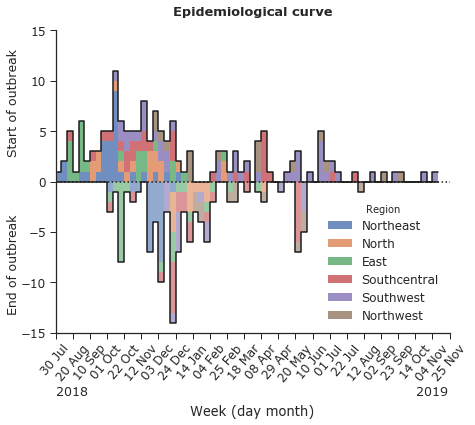

In [93]:
fig, ax = plt.subplots(1)
fig.set_size_inches(6.7,6.2); 
plt.rcParams['hatch.linewidth'] = 1

lw_border = 1.5

clrs = ['C'+str(idx) for idx in range(6)]

ybottom = [0]*len(df_epi.loc[df_epi['region']==df_epi['region'][0]]['n'])
ybottom_end = ybottom.copy()
for idx,rgn in enumerate(rgns):
    df_epi_0 = df_epi.loc[df_epi['region']==rgn]
    df_epi_end_0 = df_epi_end.loc[df_epi_end['region']==rgn]
    xs = df_epi_0['start_week']
    ys = df_epi_0['n']
    ax.fill_between(np.r_[xs,xs[-1:]+1],np.r_[ybottom,ybottom[-1:]],np.r_[ys,ys[-1:]]+np.r_[ybottom,ybottom[-1:]],
                    step='post',alpha=.8, edgecolor='none',label=rgn, facecolor=clrs[idx])
    ybottom = [x+y for x,y in zip(ys,ybottom)]
    
    xs = df_epi_end_0['end_week']
    ys_end = -df_epi_end_0['n']
    ax.fill_between(np.r_[xs,xs[-1:]+1],np.r_[ybottom_end,ybottom_end[-1:]],
                    np.r_[ys_end,ys_end[-1:]]+np.r_[ybottom_end,ybottom_end[-1:]], lw=0,
                    step='post', edgecolor='none', facecolor=clrs[idx], alpha=.6)
    ybottom_end = [x+y for x,y in zip(ys_end,ybottom_end)]
    
ax.step(np.r_[xs,xs[-1:]+1],np.r_[ybottom,ybottom[-1:]],where='post',color='k', lw=lw_border)
ax.step(np.r_[xs,xs[-1:]+1],np.r_[ybottom_end,ybottom_end[-1:]],where='post',color='k', lw=lw_border)
ax.axhline(y=0,lw=lw_border,color='k',linestyle=':',zorder=2);

xtks = [int(x) for x in np.arange(np.min(Df['start_week']),
                                  np.max(np.r_[Df['start_week'],Df['end_week'].dropna()]+4),3)]
ax.set_xticks(xtks)
ax.set_xticklabels([x.strftime("%d %b") for x in [week_date0+np.timedelta64(x,'W') for x in xtks]])
ax.set_xlim(xtks[0],xtks[-1])
ax.set_ylim(-15,15)
fig.autofmt_xdate(rotation=50,ha='center')
def set_xlabel_annotation(ax):
    ax.annotate('2019', (0,0), (360, -52), xycoords='axes fraction', textcoords='offset points', 
                va='top', fontsize=12.5)
    ax.annotate('2018', (0,0), (0, -52), xycoords='axes fraction', textcoords='offset points', 
                va='top', fontsize=12.5)
def set_ylabel_annotation(ax):
    ax.annotate('Start of outbreak', (0,0), (-42, 180), rotation=90, 
            xycoords='axes fraction', textcoords='offset points', ha='center', fontsize=12.5)
    ax.annotate('End of outbreak', (0,0), (-42, 22), rotation=90, 
                xycoords='axes fraction', textcoords='offset points', ha='center', fontsize=12.5)
set_xlabel_annotation(ax); set_ylabel_annotation(ax)
ax.set_title('Epidemiological curve',size=13, y=1.03,fontweight="bold");
ax.legend(fontsize=12,loc="lower right",ncol=1,title='Region',frameon=False);
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False);
ax.set_xlabel('Week (day month)',labelpad=20)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig("../../figures/draft/Fig1-epicurve_OIE.pdf",format='pdf',dpi=300,bbox_inches='tight')

In [94]:
# for future use
xtks_ = xtks

In [95]:
Df.loc[(Df['region']=='Northeast')&(Df['end'].isnull())]

index      start      lat      long  No    report_info  order  \
13      13 2018-09-01  46.8210  130.2730  75   other report      1   
15      15 2018-09-03  46.7780  130.3670  75   other report      2   
69      69 2018-11-14  45.7690  126.8180  75   other report      3   
81      81 2018-11-28  50.1510  127.2660  75   other report      4   
90      90 2018-12-11  45.2790  130.9900  75   other report      5   
100    100 2018-12-29  47.0972  125.7338  75   (this report      6   

         province                                           location end  ...  \
13   Heilongjiang    Jiamusi_Backyard_Fanjia Tun  Changqing_Township NaT  ...   
15   Heilongjiang     Jiamusi_Xiangyang District_Farm_Heping Village NaT  ...   
69   Heilongjiang  Harbin_Daowai District_Farm_Qinlao Village  Tu... NaT  ...   
81   Heilongjiang  Heihe_Aihui District_Farm_The third management... NaT  ...   
90   Heilongjiang  Jixi_Jiguan District_Backyard_Hongtai Village ... NaT  ...   
100  Heilongjiang  Suihua_Mingshui_Farm_Dongli Village _Shuangxin... NaT  ...   

    date_report_start  date_submission_start  date_submission_end    t  \
13         2018-09-05             2018-09-05           2018-09-05   31   
15         2018-09-06             2018-09-06           2018-09-06   33   
69         2018-11-19             2018-11-21           2018-11-21  105   
81         2018-12-07             2018-12-07           2018-12-07  119   
90         2018-12-17             2018-12-18           2018-12-18  132   
100        2019-01-02             2019-01-02           2019-01-02  150   

     start_month  start_week end_week start_week_date   T     region  
13             1           4      NaN      2018-08-27 NaT  Northeast  
15             1           5      NaN      2018-09-03 NaT  Northeast  
69             3          15      NaN      2018-11-12 NaT  Northeast  
81             3          17      NaN      2018-11-26 NaT  Northeast  
90             4          19      NaN      2018-12-10 NaT  Northeast  
100            4          21      NaN      2018-12-24 NaT  Northeast  

[6 rows x 27 columns]

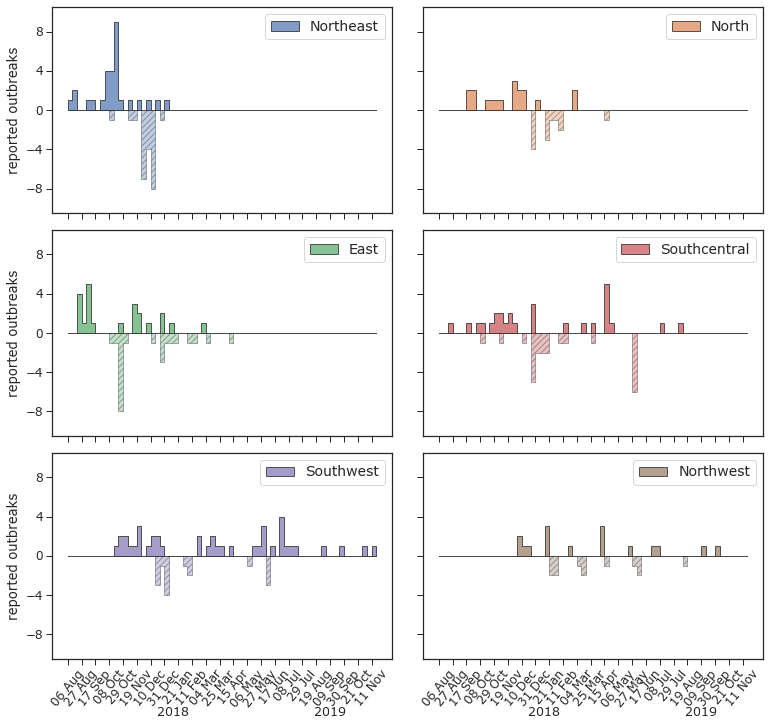

In [96]:
fig, axs = plt.subplots(3,2,sharex=True,sharey=True)
fig.set_size_inches(11,10.5);

ybottom = [0]*len(xx)

for idx,rgn in enumerate(rgns):
    ax = axs[idx//2,idx%2]
    df_epi_0 = df_epi.loc[df_epi['region']==rgn]
    df_epi_end_0 = df_epi_end.loc[df_epi_end['region']==rgn]
    xs = df_epi_0['start_week']
    ys = df_epi_0['n']
    ax.fill_between(np.r_[xs,xs[-1:]+1],np.r_[ys,ys[-1:]],
                    step='post',alpha=.7, edgecolor='k',label=rgn, facecolor=clrs[idx])
    ybottom = [x+y for x,y in zip(ys,ybottom)]
    
    xs = df_epi_end_0['end_week']
    ys_end = -df_epi_end_0['n']
    ax.fill_between(np.r_[xs,xs[-1:]+1],
                    np.r_[ys_end,ys_end[-1:]],
                    step='post', edgecolor='k',hatch='////',facecolor=clrs[idx],alpha=.35)    

    if (idx%2==0):
        ax.set_ylabel("reported outbreaks")
    if (idx//2==2):
        ax.annotate('2019', (0,0), (262, -47), xycoords='axes fraction', textcoords='offset points', va='top', fontsize=12.5)
        ax.annotate('2018', (0,0), (105, -47), xycoords='axes fraction', textcoords='offset points', va='top', fontsize=12.5)
    xtks = df_epi_0['start_week'][::3]
    ax.set_xticks(xtks)
    ax.set_xticklabels([x.strftime("%d %b") for x in [week_date0+np.timedelta64(x+1,'W') for x in xtks]])
    
    ax.legend(loc=1);
    ax.set_ylim(-10.5,10.5)
    ax.set_yticks(range(-8,12,4))

fig.autofmt_xdate(rotation=50,ha='center')

plt.tight_layout(rect=[0, 0, 1, 0.97])
# plt.savefig("../../figures/draft/FigEpicurve_regions.pdf",format='pdf',bbox_inches='tight')

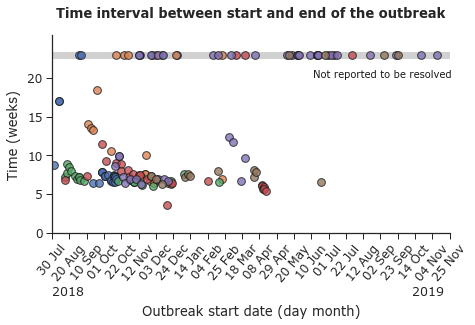

In [98]:
fig, ax = plt.subplots(1)
fig.set_size_inches(6.7,4.8); 

na_level = 23
for idx,rgn in enumerate(rgns):
    Df__ = Df.loc[Df['region']==rgn].copy()
    Df__['time_to_resolve_outbreak'] = (Df__['end']-Df__['start']).astype('timedelta64[D]')
    Df__['time_to_resolve_outbreak'] = Df__['time_to_resolve_outbreak'].fillna(na_level*7)
    ax.scatter(Df__['start'].values,Df__['time_to_resolve_outbreak'].values/7,edgecolor='k',alpha=.8,facecolor=clrs[idx],s=60)

xtks = pd.date_range(start=np.min(Df['start_week_date']),
                     end=np.max(Df['start_week_date']+np.timedelta64(3,'W')),freq='1D')[::21]#[week_date0+np.timedelta64(x,'W') for x in df_epi_0['start_week'][::2]]
ax.set_xticks(xtks)
ax.set_xticklabels([x.strftime("%d %b") for x in xtks])

ax.set_xlim(xtks[0],xtks[-1])
ymx = 25.5; ystep = 5
ax.set_ylim(0,ymx)
ytks = np.arange(0,ymx,ystep)[:-1]
ax.set_xlabel('Outbreak start date (day month)',labelpad=20)
ax.set_ylabel('Time (weeks)',labelpad=6)
ax.set_yticks(ytks)
ax.set_title('Time interval between start and end of the outbreak',y=1.06,fontweight="bold")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False);
fig.autofmt_xdate(rotation=50,ha='center')

ax.axhline(y=na_level,lw=7,color='k',alpha=0.2,linestyle='-',zorder=-2);
ax.text(xtks[-1]+np.timedelta64(3,'D'),na_level-2.9,'Not reported to be resolved',ha='right',color='k')
set_xlabel_annotation(ax)

plt.tight_layout(rect=[0, 0, 1, 0.97])
# plt.savefig("../../figures/draft/Fig1-B_OIE.pdf",format='pdf',dpi=300,bbox_inches='tight')

In [99]:
Df0 = Df.copy()
Df0['id'] = Df0['index']+1
Df0.set_index('id').loc[:,['date_report_start','province','location','lat','long','start','end']].\
    sort_values(['start']).\
    to_csv("../../data/ASF_data_for_Yang_san_temp.csv")

## Reporting delay of the end of the outbreak

In [100]:
# this will put all NAs of ends in the tail of the dataframe
Df = Df.sort_values(['end','start']).drop('index',axis=1).reset_index(drop=True).reset_index()

In [101]:
observed_data = Df[~pd.isnull(Df.end)]
cencored_data = Df[pd.isnull(Df.end)]

Df[:4]

index      start      lat      long  No    report_info  order  province  \
0      0 2018-08-01  42.0225  123.2932  67  other report       1  Liaoning   
1      1 2018-08-14  34.7240  113.8480  69  other report       1     Henan   
2      2 2018-08-15  34.6280  119.0540  70  other report       1   Jiangsu   
3      3 2018-08-17  28.2000  120.9400  71  other report       1  Zhejiang   

                                            location        end  ...  \
0  Shenyang_Shenbei New District_Farm_Shenbei Street 2018-10-01  ...   
1  Zhengzhou_Slaughterhouse_Economic Development_... 2018-10-01  ...   
2    Lianyungang_Haizhou District_Farm_Baofu Village 2018-10-04  ...   
3              Wenzhou_Yueqing_Farm_Zhang ao Village 2018-10-10  ...   

  date_report_start  date_submission_start  date_submission_end   t  \
0        2018-08-03             2018-08-03           2019-01-08   0   
1        2018-08-16             2018-08-16           2019-01-08  13   
2        2018-08-19             2018-08-19           2019-01-08  14   
3        2018-08-23             2018-08-23           2019-01-08  16   

   start_month  start_week end_week start_week_date          T        region  
0            0           0      9.0      2018-07-30 2018-10-01     Northeast  
1            0           2      9.0      2018-08-13 2018-10-01  Southcentral  
2            0           2      9.0      2018-08-13 2018-10-04          East  
3            0           2     10.0      2018-08-13 2018-10-10          East  

[4 rows x 27 columns]

In [102]:
Df = pd.concat([observed_data,cencored_data],ignore_index=True)
Df

index      start       lat       long   No     report_info  order  \
0        0 2018-08-01  42.02250  123.29320   67   other report       1   
1        1 2018-08-14  34.72400  113.84800   69   other report       1   
2        2 2018-08-15  34.62800  119.05400   70   other report       1   
3        3 2018-08-17  28.20000  120.94000   71   other report       1   
4        4 2018-08-19  30.59500  118.46100   72   other report       2   
..     ...        ...       ...        ...  ...             ...    ...   
148    148 2019-09-06  38.40083  106.40861  114   (this report       4   
149    149 2019-09-21  22.92611  110.96611  124   other report       7   
150    150 2019-09-23  34.47638  104.37222   96   (this report       3   
151    151 2019-10-21  25.19277  101.47694  127   other report       6   
152    152 2019-11-10  25.39260   98.65100  127   (this report       7   

     province                                           location        end  \
0    Liaoning  Shenyang_Shenbei New District_Farm_Shenbei Street 2018-10-01   
1       Henan  Zhengzhou_Slaughterhouse_Economic Development_... 2018-10-01   
2     Jiangsu    Lianyungang_Haizhou District_Farm_Baofu Village 2018-10-04   
3    Zhejiang              Wenzhou_Yueqing_Farm_Zhang ao Village 2018-10-10   
4       Anhui  Xuancheng_Xuanzhou District_Farm_Liufu Village... 2018-10-17   
..        ...                                                ...        ...   
148   Ningxia  Yinchuan_Xingqing District_Farm_Qiangjiamiao_V...        NaT   
149   Guangxi  Wuzhou_Cenxi City_Slaughterhouse_Siying Villag...        NaT   
150     Gansu  Dingxi_Minxian_Farm_Hualingou Village Puma_Tow...        NaT   
151    Yunnan  Chuxiong Yi National_Autonomous Prefecture_Chu...        NaT   
152    Yunnan  Baoshan_Tengchong_Farm_Baiguo Community Jietou...        NaT   

     ... date_report_start  date_submission_start  date_submission_end    t  \
0    ...        2018-08-03             2018-08-03           2019-01-08    0   
1    ...        2018-08-16             2018-08-16           2019-01-08   13   
2    ...        2018-08-19             2018-08-19           2019-01-08   14   
3    ...        2018-08-23             2018-08-23           2019-01-08   16   
4    ...        2018-09-03             2018-09-03           2019-01-08   18   
..   ...               ...                    ...                  ...  ...   
148  ...        2019-09-11             2019-09-12           2019-09-12  401   
149  ...        2019-09-24             2019-09-24           2019-09-24  416   
150  ...        2019-11-15             2019-11-15           2019-11-15  418   
151  ...        2019-10-27             2019-10-28           2019-10-28  446   
152  ...        2019-11-15             2019-11-15           2019-11-15  466   

     start_month  start_week end_week start_week_date          T        region  
0              0           0      9.0      2018-07-30 2018-10-01     Northeast  
1              0           2      9.0      2018-08-13 2018-10-01  Southcentral  
2              0           2      9.0      2018-08-13 2018-10-04          East  
3              0           2     10.0      2018-08-13 2018-10-10          East  
4              0           2     11.0      2018-08-13 2018-10-17          East  
..           ...         ...      ...             ...        ...           ...  
148           13          57      NaN      2019-09-02        NaT     Northwest  
149           13          59      NaN      2019-09-16        NaT     Southwest  
150           13          60      NaN      2019-09-23        NaT     Northwest  
151           14          64      NaN      2019-10-21        NaT     Southwest  
152           15          66      NaN      2019-11-04        NaT     Southwest  

[153 rows x 27 columns]

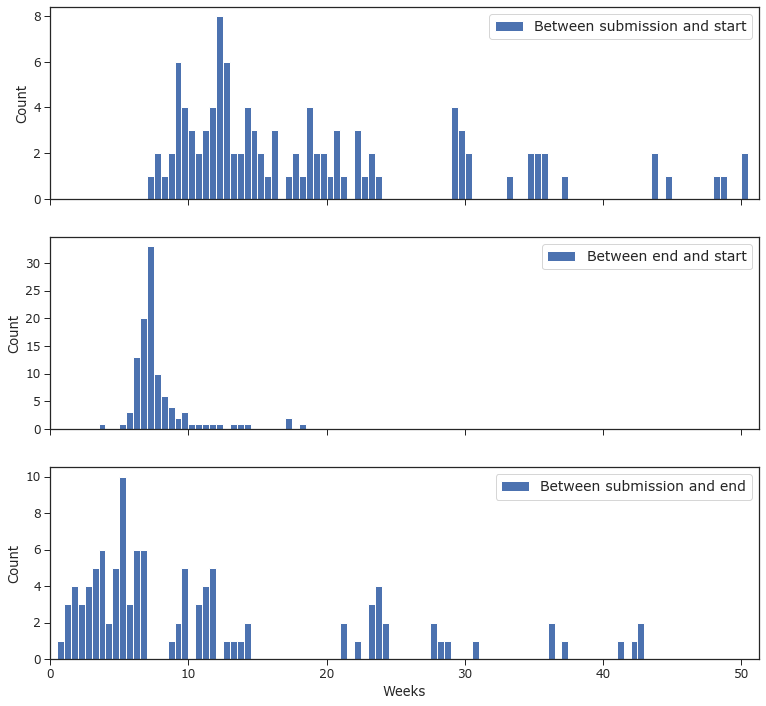

In [103]:
fig, axs = plt.subplots(3,1,sharex=True)
fig.set_size_inches(12.7,12); 
binwidth = .5
submission_end_start_delta_obs = (observed_data['date_submission_end']-observed_data['start']).astype('timedelta64[D]').astype('float').values/7.
end_obs = (observed_data['end']-observed_data['start']).astype('timedelta64[D]').astype('float')/7.
submission_end_delta_obs = (observed_data['date_submission_end']-observed_data['end']).astype('timedelta64[D]').astype('float').values/7.
xmx = np.max(np.r_[submission_end_start_delta_obs,end_obs,submission_end_delta_obs])+1

ax = axs[0]
axs[0].hist(submission_end_start_delta_obs,bins=np.arange(0, xmx + binwidth, binwidth),label="Between submission and start");
axs[1].hist(end_obs,bins=np.arange(0,xmx+binwidth,binwidth),label="Between end and start")
axs[2].hist(submission_end_delta_obs,bins=np.arange(-binwidth, xmx + binwidth, binwidth),label="Between submission and end");

for idx in range(3):
    axs[idx].set_xlim(0,xmx)
    axs[idx].set_ylabel("Count")
    axs[idx].legend(loc=1)

axs[2].set_xlabel("Weeks");

In [104]:
Df.loc[lambda d: np.isnan(d['start_week'])]

Empty DataFrame
Columns: [index, start, lat, long, No, report_info, order, province, location, end, species, susceptible, cases, deaths, destroyed, slaughtered, unit, date_report_start, date_submission_start, date_submission_end, t, start_month, start_week, end_week, start_week_date, T, region]
Index: []

[0 rows x 27 columns]

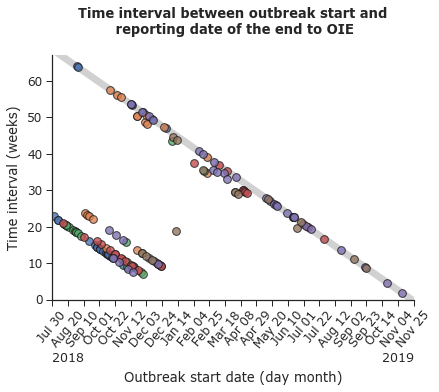

In [112]:
fig, ax = plt.subplots(1)
fig.set_size_inches(6.2,5.75); 

na_level = 40
for idx,rgn in enumerate(rgns):
    Df__ = Df.loc[Df['region']==rgn].copy()
    Df__['time_to_resolve_outbreak'] = [(x-y) if pd.notnull(z) else (date_today-y) for x,y,z in zip(Df__['date_submission_end'],Df__['start'],Df__['end'])]
    Df__['time_to_resolve_outbreak'] = Df__['time_to_resolve_outbreak'].astype('timedelta64[D]')
    ax.scatter(Df__['start'].values,Df__['time_to_resolve_outbreak'].values/7,edgecolor='k',alpha=.8,facecolor=clrs[idx],s=60)

xtks = pd.date_range(start=np.min(Df['start_week_date']),end=np.max(Df['start_week_date']+np.timedelta64(3,'W')),
                     freq='1D')[::21]#[week_date0+np.timedelta64(x,'W') for x in df_epi_0['start_week'][::2]]
ax.set_xticks(xtks)
ax.set_xticklabels([x.strftime("%b %d") for x in xtks])

ax.set_xlim(xtks[0],xtks[-1])
ymx = 45.5; ystep = 5
ax.set_ylim(bottom=0)
ytks = np.arange(0,ymx,ystep)[:-1]
ax.set_xlabel('Outbreak start date (day month)',labelpad=20)
ax.set_ylabel('Time interval (weeks)',labelpad=6)
#ax.set_yticks(ytks)
ax.set_title('Time interval between outbreak start and\n reporting date of the end to OIE',y=1.06,fontweight="bold")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False);
fig.autofmt_xdate(rotation=50,ha='center')

xx = pd.date_range(start=xtks[0], end=xtks[-1]+np.timedelta64(2,'W'))
yy = (date_today-xx).astype('timedelta64[D]').values/7.
ax.plot(xx,yy,lw=7,color='k',linestyle='-',zorder=-5,alpha=.2);

# ax.text(xtks[-1]+np.timedelta64(3,'D'),na_level-2.9,'Not reported to be resolved',ha='right',color='r')
ax.annotate('2019', (0,0), (330, -52), xycoords='axes fraction', textcoords='offset points', 
            va='top', fontsize=12.5)
ax.annotate('2018', (0,0), (0, -52), xycoords='axes fraction', textcoords='offset points', 
            va='top', fontsize=12.5)

plt.tight_layout(rect=[0, 0, 1, 0.97])
# plt.savefig("../../figures/FigS2.pdf",format='pdf',dpi=300,bbox_inches='tight')

# Imputing MOA data for ending times

In [114]:
Df_MOA = pd.read_csv("../../data/ASF_data_from_MOA.csv", encoding = "ISO-8859-1")
Df_MOA['start'] = pd.to_datetime(Df_MOA['start'],format='%Y-%m-%d')
Df_MOA['end_moa'] = pd.to_datetime(Df_MOA['end_moa'],format='%Y-%m-%d')
Df_ = Df_MOA.loc[:,['start','province','lat','long','end_moa']].\
    set_index(['start','province','lat','long']).\
    merge(Df.set_index(['start','province','lat','long']),left_index=True,right_index=True).reset_index().\
    sort_values('start').reset_index(drop=True)
# Df_ = Df_MOA.loc[:,['start','province','location','end_moa']].merge(Df,how='left')
Df_[:5]

start  province      lat      long    end_moa  index  No  \
0 2018-08-01  Liaoning  42.0225  123.2932 2018-09-29      0  67   
1 2018-08-07  Liaoning  42.0200  123.4270 2018-09-29     33  67   
2 2018-08-07  Liaoning  42.0200  123.3660 2018-09-29     32  67   
3 2018-08-14     Henan  34.7240  113.8480 2018-10-01      1  69   
4 2018-08-15   Jiangsu  34.6280  119.0540 2018-10-04      2  70   

     report_info  order                                           location  \
0  other report       1  Shenyang_Shenbei New District_Farm_Shenbei Street   
1  other report       2  Shenyang_Shenbei New District_Farm_Cailuo yi v...   
2  other report       5  Shenyang_Shenbei New District_Farm_Yinjia village   
3  other report       1  Zhengzhou_Slaughterhouse_Economic Development_...   
4  other report       1    Lianyungang_Haizhou District_Farm_Baofu Village   

   ... date_report_start date_submission_start  date_submission_end   t  \
0  ...        2018-08-03            2018-08-03           2019-01-08   0   
1  ...        2018-09-07            2018-09-07           2019-01-08   6   
2  ...        2018-09-07            2018-09-07           2019-01-08   6   
3  ...        2018-08-16            2018-08-16           2019-01-08  13   
4  ...        2018-08-19            2018-08-19           2019-01-08  14   

   start_month  start_week  end_week start_week_date          T        region  
0            0           0       9.0      2018-07-30 2018-10-01     Northeast  
1            0           1      18.0      2018-08-06 2018-12-04     Northeast  
2            0           1      18.0      2018-08-06 2018-12-04     Northeast  
3            0           2       9.0      2018-08-13 2018-10-01  Southcentral  
4            0           2       9.0      2018-08-13 2018-10-04          East  

[5 rows x 28 columns]

In [115]:
Df_.shape

(153, 28)

In [116]:
Df_.loc[lambda d: d.province=='Ningxia']

start province        lat       long    end_moa  index   No  \
103 2019-01-11  Ningxia  38.353600  106.30690 2019-03-05     87  114   
130 2019-05-14  Ningxia  39.272340  106.77036 2019-07-09    131  114   
141 2019-06-27  Ningxia  37.534425  105.23466 2019-08-09    141  114   
148 2019-09-06  Ningxia  38.400830  106.40861 2019-10-24    148  114   

        report_info  order                                           location  \
103   other report       1  Yinchuan_Yongning_Backyard_Banqiao Village _Wa...   
130   other report       2  Shizuishan_Huinong District_Backyard_Dianchang...   
141   other report       3  Zhongwei_Shapotou District_Slaughterhouse_Hong...   
148   (this report       4  Yinchuan_Xingqing District_Farm_Qiangjiamiao_V...   

     ... date_report_start date_submission_start  date_submission_end    t  \
103  ...        2019-01-21            2019-01-21           2019-05-23  163   
130  ...        2019-05-23            2019-05-23           2019-05-23  286   
141  ...        2019-06-29            2019-07-01           2019-07-01  330   
148  ...        2019-09-11            2019-09-12           2019-09-12  401   

     start_month  start_week  end_week start_week_date          T     region  
103            5          23      31.0      2019-01-07 2019-03-05  Northwest  
130            9          41       NaN      2019-05-13        NaT  Northwest  
141           10          47       NaN      2019-06-24        NaT  Northwest  
148           13          57       NaN      2019-09-02        NaT  Northwest  

[4 rows x 28 columns]

In [117]:
Df_.loc[lambda d: np.isnan(d['start_week'])]

Empty DataFrame
Columns: [start, province, lat, long, end_moa, index, No, report_info, order, location, end, species, susceptible, cases, deaths, destroyed, slaughtered, unit, date_report_start, date_submission_start, date_submission_end, t, start_month, start_week, end_week, start_week_date, T, region]
Index: []

[0 rows x 28 columns]

In [118]:
Df = Df_.copy()

In [119]:
Df['end'] = [y if pd.isnull(x) else x for x,y in zip(Df['end_moa'],Df['end'])]

# To redo previous figures

In [120]:
Df['end_week'] = Df['end'].dt.week+52*Df['end'].dt.year
Df['end_week'] = Df['end_week']-min_start_week
Df['end_week'] = [int(x) if str.isnumeric(str(x)) else x for x in Df['end_week']]
Df[-20:]

start province        lat        long    end_moa  index   No  \
133 2019-05-25  Guangxi  22.129510  109.920208 2019-08-15    134  124   
134 2019-05-26   Yunnan  21.870400  100.597100 2019-08-27    135  127   
135 2019-06-09  Guizhou  26.109930  107.642060 2019-07-27    136  106   
136 2019-06-17  Guizhou  25.769518  107.040835 2019-08-15    138  106   
137 2019-06-17  Guizhou  25.702042  106.859920 2019-08-15    137  106   
138 2019-06-18  Guizhou  25.672666  107.978333 2019-08-15    139  106   
139 2019-06-18  Guizhou  25.788025  107.894422 2019-08-15    140  106   
140 2019-06-22  Qinghai  36.355210  101.887831 2019-08-15    106  122   
141 2019-06-27  Ningxia  37.534425  105.234660 2019-08-09    141  114   
142 2019-06-30  Guangxi  22.195550  110.248880 2019-08-15    142  124   
143 2019-07-04  Guangxi  23.257500  109.612220 2019-08-26    143  124   
144 2019-07-07    Hubei  30.786110  115.228610 2019-08-23    144  111   
145 2019-07-11  Sichuan  29.671730  103.601410 2019-09-04    145  110   
146 2019-07-29    Hubei  30.026940  113.283330 2019-09-12    146  111   
147 2019-08-20   Yunnan  27.683600  103.373900 2019-11-08    147  127   
148 2019-09-06  Ningxia  38.400830  106.408610 2019-10-24    148  114   
149 2019-09-21  Guangxi  22.926110  110.966110        NaT    149  124   
150 2019-09-23    Gansu  34.476380  104.372220        NaT    150   96   
151 2019-10-21   Yunnan  25.192770  101.476940        NaT    151  127   
152 2019-11-10   Yunnan  25.392600   98.651000        NaT    152  127   

        report_info  order                                           location  \
133   other report       3  Yulin_Bobai_Backyard_Taiyang_Village Wangmao_T...   
134   other report       4  Dai Autonomous_Prefecture of_Xishuangbanna_Men...   
135   other report       3  Buyi and Miao_Autonomous Prefecture of_QianNan...   
136   other report       5  Buyi and Miao_Autonomous Prefecture of_QianNan...   
137   other report       4  Buyi and Miao_Autonomous Prefecture of_QianNan...   
138   (this report       6  Buyi and Miao_Autonomous Prefecture of_QianNan...   
139   (this report       7  Buyi and Miao_Autonomous Prefecture of_QianNan...   
140   other report       1  Haidong_Pingan District_Backyard_Shangfatai Vi...   
141   other report       3  Zhongwei_Shapotou District_Slaughterhouse_Hong...   
142   other report       4  Yulin_Luchuan_Farm_Datang Village Daqiao_Township   
143   other report       5  Guigang_Gangbei District_Farm_Zhongli Village ...   
144   other report       3  Huanggang_Tuanfeng_Farm_Pushudian_Village Dand...   
145   (this report       8  Leshan_Jiajiang_Farm_Datong Village Ganjiang_T...   
146   (this report       4  Jingzhou_Honghu City_Backyard_Shuanghong_Villa...   
147   other report       5  Zhaotong_Yongshan_Farm_Laojie_Community Daxing...   
148   (this report       4  Yinchuan_Xingqing District_Farm_Qiangjiamiao_V...   
149   other report       7  Wuzhou_Cenxi City_Slaughterhouse_Siying Villag...   
150   (this report       3  Dingxi_Minxian_Farm_Hualingou Village Puma_Tow...   
151   other report       6  Chuxiong Yi National_Autonomous Prefecture_Chu...   
152   (this report       7  Baoshan_Tengchong_Farm_Baiguo Community Jietou...   

     ... date_report_start date_submission_start  date_submission_end    t  \
133  ...        2019-06-01            2019-06-01           2019-06-01  297   
134  ...        2019-05-30            2019-05-30           2019-05-30  298   
135  ...        2019-06-21            2019-06-21           2019-06-21  312   
136  ...        2019-06-21            2019-06-21           2019-06-21  320   
137  ...        2019-06-21            2019-06-21           2019-06-21  320   
138  ...        2019-06-22            2019-06-24           2019-06-24  321   
139  ...        2019-06-22            2019-06-24           2019-06-24  321   
140  ...        2019-06-24            2019-06-25           2019-11-07  325   
141  ...        2019-06-29            2019-07-01           2019-07-01  

In [121]:
xmax = np.max(np.r_[Df['start'],Df['end'].dropna()])
xmax_week = int(np.max(np.r_[Df['start_week'],Df['end_week'].dropna()]))
xmax_week

66

In [122]:
df_epi = Df.groupby(['region','start_week']).size()
df_epi = pd.DataFrame(df_epi,columns=['n']).reset_index()

df_0 = pd.DataFrame({'start_week': [*range(xmax_week+1)]*nrgns, 
              'region': np.ndarray.flatten(np.array([[rgn]*(xmax_week+1) for rgn in rgns]))})
df_epi = df_0.merge(df_epi,how='left').fillna(0)
df_epi['n'] = df_epi['n'].astype(int)

df_epi_end = Df.groupby(['region','end_week']).size()
df_epi_end = pd.DataFrame(df_epi_end,columns=['n']).reset_index()
df_0 = pd.DataFrame({'end_week': [*range(xmax_week+1)]*nrgns, 
              'region': np.ndarray.flatten(np.array([[rgn]*(xmax_week+1) for rgn in rgns]))})
df_epi_end = df_0.merge(df_epi_end,how='left').fillna(0)
df_epi_end['n'] = df_epi_end['n'].astype(int)

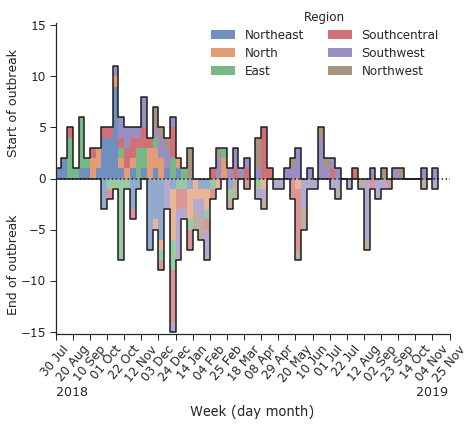

In [123]:
fig, ax = plt.subplots(1)
fig.set_size_inches(6.7,6.2); 
plt.rcParams['hatch.linewidth'] = 1

clrs = ['C'+str(idx) for idx in range(6)]

ybottom = [0]*len(df_epi.loc[df_epi['region']==df_epi['region'][0]]['n'])
ybottom_end = [0]*len(df_epi.loc[df_epi_end['region']==df_epi_end['region'][0]]['n'])
for idx,rgn in enumerate(rgns):
    df_epi_0 = df_epi.loc[df_epi['region']==rgn]
    df_epi_end_0 = df_epi_end.loc[df_epi_end['region']==rgn]
    xs = df_epi_0['start_week']
    ys = df_epi_0['n']
    ax.fill_between(np.r_[xs,xs[-1:]+1,xs[-1:]+1],
                    np.r_[ybottom,ybottom[-1:],0],
                    np.r_[ys,ys[-1:],0]+np.r_[ybottom,ybottom[-1:],0],
                    step='post',alpha=.8, edgecolor='none',label=rgn, facecolor=clrs[idx])
    ybottom = [x+y for x,y in zip(ys,ybottom)]
    
    xs_end = df_epi_end_0['end_week']
    ys_end = -df_epi_end_0['n']
    ax.fill_between(np.r_[xs_end,xs_end[-1:]+1,xs_end[-1:]+1],
                    np.r_[ybottom_end,ybottom_end[-1:],0],
                    np.r_[ys_end,ys_end[-1:],0]+np.r_[ybottom_end,ybottom_end[-1:],0], lw=0,
                    step='post', edgecolor='none', facecolor=clrs[idx], alpha=.6)
    ybottom_end = [x+y for x,y in zip(ys_end,ybottom_end)]
    
ax.step(np.r_[xs,xs[-1:]+1,xs[-1:]+1],np.r_[ybottom,ybottom[-1:],0],where='post',color='k', lw=lw_border)
ax.step(np.r_[xs_end,xs_end[-1:]+1,xs_end[-1:]+1],np.r_[ybottom_end,ybottom_end[-1:],0],
        where='post',color='k',lw=lw_border)
ax.axhline(y=0,lw=lw_border,color='k',linestyle=':',zorder=2);

xtks = [int(x) for x in np.arange(np.min(Df['start_week']),
                                  np.max(np.r_[Df['start_week'],Df['end_week'].dropna()]+4),3)]
ax.set_xticks(xtks)
ax.set_xticklabels([x.strftime("%d %b") for x in [week_date0+np.timedelta64(x,'W') for x in xtks]])
xtks_limits = [xtks[0],xtks[-1]]
xtks_limits_dates = [week_date0+np.timedelta64(x,'W') for x in xtks]
xtks_limits_dates = [xtks_limits_dates[0],xtks_limits_dates[-1]]
ax.set_xlim(xtks_limits)
ax.set_ylim(-15.2,15.2)
fig.autofmt_xdate(rotation=50,ha='center')

set_xlabel_annotation(ax); set_ylabel_annotation(ax)
# ax.set_title('Epidemiological curve',size=13, y=1.03,fontweight="bold");
ax.legend(bbox_to_anchor=(0., .97, 1., .102),fontsize=12,ncol=2,title='Region',title_fontsize=12,frameon=False);
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False);
ax.set_xlabel('Week (day month)',labelpad=20)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig("../../figures/draft/Fig1-epicurve.pdf",format='pdf',dpi=300,bbox_inches='tight')

## By unit size

In [124]:
Df['unit'] = 0
units = ['Village','Farm','Backyard','Slaughterhouse']
nunits = len(units)
for unt in units:
    Df.loc[[unt in x for x in Df['location']],'unit'] = unt

In [125]:
df_epi = Df.groupby(['unit','start_week']).size()
df_epi = pd.DataFrame(df_epi,columns=['n']).reset_index()

df_0 = pd.DataFrame({'start_week': [*range(xmax_week+1)]*nunits, 
              'unit': np.ndarray.flatten(np.array([[unt]*(xmax_week+1) for unt in units]))})
df_epi = df_0.merge(df_epi,how='left').fillna(0)
df_epi['n'] = df_epi['n'].astype(int)

df_epi_end = Df.groupby(['unit','end_week']).size()
df_epi_end = pd.DataFrame(df_epi_end,columns=['n']).reset_index()
df_0 = pd.DataFrame({'end_week': [*range(xmax_week+1)]*nunits, 
              'unit': np.ndarray.flatten(np.array([[unt]*(xmax_week+1) for unt in units]))})
df_epi_end = df_0.merge(df_epi_end,how='left').fillna(0)
df_epi_end['n'] = df_epi_end['n'].astype(int)

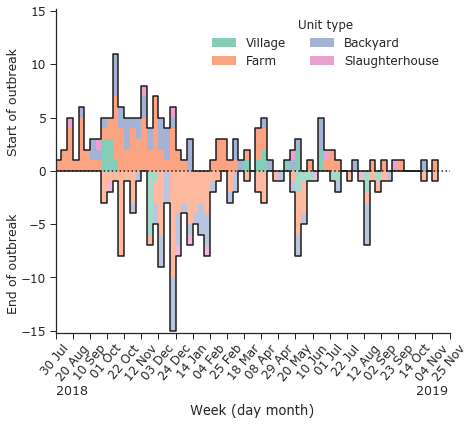

In [126]:
fig, ax = plt.subplots(1)
fig.set_size_inches(6.7,6.2); 
plt.rcParams['hatch.linewidth'] = 1

clrs = sns.color_palette("Set2", 11)

ybottom = [0]*len(df_epi.loc[df_epi['unit']==df_epi['unit'][0]]['n'])
ybottom_end = [0]*len(df_epi.loc[df_epi_end['unit']==df_epi_end['unit'][0]]['n'])
for idx,unt in enumerate(units):
    df_epi_0 = df_epi.loc[df_epi['unit']==unt]
    df_epi_end_0 = df_epi_end.loc[df_epi_end['unit']==unt]
    xs = df_epi_0['start_week']
    ys = df_epi_0['n']
    ax.fill_between(np.r_[xs,xs[-1:]+1,xs[-1:]+1],
                    np.r_[ybottom,ybottom[-1:],0],
                    np.r_[ys,ys[-1:],0]+np.r_[ybottom,ybottom[-1:],0],
                    step='post',alpha=.8, edgecolor='none',label=unt, facecolor=clrs[idx])
    ybottom = [x+y for x,y in zip(ys,ybottom)]
    
    xs_end = df_epi_end_0['end_week']
    ys_end = -df_epi_end_0['n']
    ax.fill_between(np.r_[xs_end,xs_end[-1:]+1,xs_end[-1:]+1],
                    np.r_[ybottom_end,ybottom_end[-1:],0],
                    np.r_[ys_end,ys_end[-1:],0]+np.r_[ybottom_end,ybottom_end[-1:],0], lw=0,
                    step='post', edgecolor='none', facecolor=clrs[idx], alpha=.6)
    ybottom_end = [x+y for x,y in zip(ys_end,ybottom_end)]
    
ax.step(np.r_[xs,xs[-1:]+1,xs[-1:]+1],np.r_[ybottom,ybottom[-1:],0],where='post',color='k', lw=lw_border)
ax.step(np.r_[xs_end,xs_end[-1:]+1,xs_end[-1:]+1],np.r_[ybottom_end,ybottom_end[-1:],0],
        where='post',color='k', lw=lw_border)
ax.axhline(y=0,lw=lw_border,color='k',linestyle=':',zorder=2);

xtks = [int(x) for x in np.arange(np.min(Df['start_week']),
                                  np.max(np.r_[Df['start_week'],Df['end_week'].dropna()]+4),3)]
ax.set_xticks(xtks)
ax.set_xticklabels([x.strftime("%d %b") for x in [week_date0+np.timedelta64(x,'W') for x in xtks]])
fig.autofmt_xdate(rotation=50,ha='center')
ax.set_xlim(xtks_limits)
ax.set_ylim(-15.2,15.2)
set_xlabel_annotation(ax); set_ylabel_annotation(ax)
# ax.set_title('Epidemiological curve',size=13, y=1.03,fontweight="bold");
ax.legend(fontsize=12,loc=1,ncol=2,title='Unit type',title_fontsize=12,frameon=False);
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False);
ax.set_xlabel('Week (day month)',labelpad=20)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig("../../figures/draft/Fig1-epicurve_by_unit_type.pdf",format='pdf',dpi=300,bbox_inches='tight')

## By unit type

In [127]:
Df['size'] = 0
sizes = [10000,3000,1000,500,50,0]
nsizes = len(sizes)
for sz in sizes[::-1]:
    Df.loc[Df['susceptible']>=sz,'size'] = sz

In [128]:
df_epi = Df.groupby(['size','start_week']).size()
df_epi = pd.DataFrame(df_epi,columns=['n']).reset_index()

df_0 = pd.DataFrame({'start_week': [*range(xmax_week+1)]*nsizes, 
              'size': np.ndarray.flatten(np.array([[sz]*(xmax_week+1) for sz in sizes]))})
df_epi = df_0.merge(df_epi,how='left').fillna(0)
df_epi['n'] = df_epi['n'].astype(int)

df_epi_end = Df.groupby(['size','end_week']).size()
df_epi_end = pd.DataFrame(df_epi_end,columns=['n']).reset_index()
df_0 = pd.DataFrame({'end_week': [*range(xmax_week+1)]*nsizes, 
              'size': np.ndarray.flatten(np.array([[sz]*(xmax_week+1) for sz in sizes]))})
df_epi_end = df_0.merge(df_epi_end,how='left').fillna(0)
df_epi_end['n'] = df_epi_end['n'].astype(int)

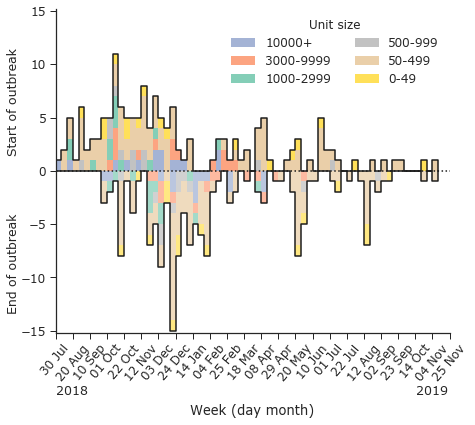

In [129]:
fig, ax = plt.subplots(1)
fig.set_size_inches(6.7,6.2); 
plt.rcParams['hatch.linewidth'] = 1

clrs = sns.color_palette("Set2", 11)[::-1]

ybottom = [0]*len(df_epi.loc[df_epi['size']==df_epi['size'][0]]['n'])
ybottom_end = [0]*len(df_epi.loc[df_epi_end['size']==df_epi_end['size'][0]]['n'])
for idx,sz in enumerate(sizes):
    df_epi_0 = df_epi.loc[df_epi['size']==sz]
    df_epi_end_0 = df_epi_end.loc[df_epi_end['size']==sz]
    xs = df_epi_0['start_week']
    ys = df_epi_0['n']
    lbl = "%d-%d"%(sz,sizes[idx-1]-1) if idx>0 else "%d+"%sz
    ax.fill_between(np.r_[xs,xs[-1:]+1,xs[-1:]+1],
                    np.r_[ybottom,ybottom[-1:],0],
                    np.r_[ys,ys[-1:],0]+np.r_[ybottom,ybottom[-1:],0],
                    step='post',alpha=.8, edgecolor='none',label=lbl, facecolor=clrs[idx])
    ybottom = [x+y for x,y in zip(ys,ybottom)]
    
    xs_end = df_epi_end_0['end_week']
    ys_end = -df_epi_end_0['n']
    ax.fill_between(np.r_[xs_end,xs_end[-1:]+1,xs_end[-1:]+1],
                    np.r_[ybottom_end,ybottom_end[-1:],0],
                    np.r_[ys_end,ys_end[-1:],0]+np.r_[ybottom_end,ybottom_end[-1:],0], lw=0,
                    step='post', edgecolor='none', facecolor=clrs[idx], alpha=.6)
    ybottom_end = [x+y for x,y in zip(ys_end,ybottom_end)]
    
ax.step(np.r_[xs,xs[-1:]+1,xs[-1:]+1],np.r_[ybottom,ybottom[-1:],0],where='post',color='k', lw=lw_border)
ax.step(np.r_[xs_end,xs_end[-1:]+1,xs_end[-1:]+1],np.r_[ybottom_end,ybottom_end[-1:],0],where='post',
        color='k', lw=lw_border)
ax.axhline(y=0,lw=lw_border,color='k',linestyle=':',zorder=2);

xtks = [int(x) for x in np.arange(np.min(Df['start_week']),
                                  np.max(np.r_[Df['start_week'],Df['end_week'].dropna()]+4),3)]
ax.set_xticks(xtks)
ax.set_xticklabels([x.strftime("%d %b") for x in [week_date0+np.timedelta64(x,'W') for x in xtks]])
ax.set_xlim(xtks_limits)
ax.set_ylim(-15.2,15.2)
fig.autofmt_xdate(rotation=50,ha='center')
set_xlabel_annotation(ax)
set_ylabel_annotation(ax)
# ax.set_title('Epidemiological curve',size=13, y=1.03,fontweight="bold");
ax.legend(fontsize=12,loc=1,ncol=2,title='Unit size',title_fontsize=12,frameon=False);
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False);
ax.set_xlabel('Week (day month)',labelpad=20)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig("../../figures/draft/Fig1-epicurve_by_unit_size.pdf",format='pdf',dpi=300,bbox_inches='tight')

Northeast


start province     lat     long    end_moa  index  No    report_info  \
21 2018-09-17    Jilin  43.293  124.433 2018-11-01     14  73  other report    
23 2018-09-25    Jilin  44.171  124.086 2018-11-09     15  73  other report    

    order                                           location  ...  \
21      1  Gongzhuling_Farm_Daxing Village Nanweizi_Township  ...   
23      2  Songyuan_Changling_Backyard_Liangwo Village Li...  ...   

   date_submission_end   t  start_month  start_week  end_week  \
21          2019-01-08  47            1           7      13.0   
23          2019-01-08  55            1           8      14.0   

    start_week_date          T     region size time_to_resolve_outbreak  
21       2018-09-17 2018-11-01  Northeast   50                     45.0  
23       2018-09-24 2018-11-09  Northeast    0                     45.0  

[2 rows x 30 columns]

North


start province     lat      long    end_moa  index  No    report_info  \
46 2018-10-16   Shanxi  40.117  112.5034 2018-11-28    109  68  other report    

    order                                       location  ...  \
46      1  Datong_Zuoyun_Backyard_Zhangjiachang Township  ...   

   date_submission_end   t  start_month  start_week  end_week  \
46          2018-10-18  76            2          11      17.0   

    start_week_date   T region size time_to_resolve_outbreak  
46       2018-10-15 NaT  North   50                     43.0  

[1 rows x 30 columns]

East


start province     lat    long    end_moa  index  No    report_info  \
82 2018-11-29  Jiangxi  29.454  115.87 2019-01-10     65  79  other report    

    order                                           location  ...  \
82      3  Jiujiang_Chaisang District_Farm_Matou Village ...  ...   

   date_submission_end    t  start_month  start_week  end_week  \
82          2019-01-18  120            3          17      23.0   

    start_week_date          T region size time_to_resolve_outbreak  
82       2018-11-26 2019-01-10   East   50                     42.0  

[1 rows x 30 columns]

Southcentral


start   province     lat     long    end_moa  index  No  \
93 2018-12-17  Guangdong  22.267  113.522 2019-01-11     66  87   

      report_info  order                                           location  \
93  other report       1  Zhuhai_Xiangzhou District_Slaughterhouse_Qians...   

    ... date_submission_end    t  start_month  start_week  end_week  \
93  ...          2019-02-25  138            4          20      23.0   

    start_week_date          T        region size time_to_resolve_outbreak  
93       2018-12-17 2019-01-11  Southcentral   50                     25.0  

[1 rows x 30 columns]

Southwest


start province       lat      long    end_moa  index   No  \
131 2019-05-17  Guizhou  26.65767  106.8225 2019-06-14    132  106   

       report_info  order                                           location  \
131  other report       1  Guiyang_Wudang District_Slaughterhouse_Luowan ...   

     ... date_submission_end    t  start_month  start_week  end_week  \
131  ...          2019-05-21  289            9          41      45.0   

     start_week_date   T     region size time_to_resolve_outbreak  
131       2019-05-13 NaT  Southwest   50                     28.0  

[1 rows x 30 columns]

Northwest


start province        lat       long    end_moa  index   No  \
141 2019-06-27  Ningxia  37.534425  105.23466 2019-08-09    141  114   

       report_info  order                                           location  \
141  other report       3  Zhongwei_Shapotou District_Slaughterhouse_Hong...   

     ... date_submission_end    t  start_month  start_week  end_week  \
141  ...          2019-07-01  330           10          47      53.0   

     start_week_date   T     region size time_to_resolve_outbreak  
141       2019-06-24 NaT  Northwest   50                     43.0  

[1 rows x 30 columns]

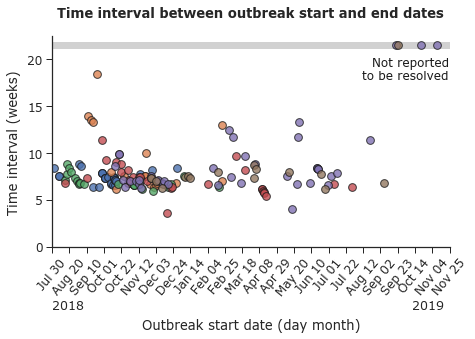

In [130]:
fig, ax = plt.subplots(1)
fig.set_size_inches(6.7,5); 

clrs = ['C'+str(idx) for idx in range(6)]

na_level = 21.5
for idx,rgn in enumerate(rgns):
    print(rgn)
    Df__ = Df.loc[Df['region']==rgn].copy()
    Df__['time_to_resolve_outbreak'] = (Df__['end']-Df__['start']).astype('timedelta64[D]')
    Df__['time_to_resolve_outbreak'] = Df__['time_to_resolve_outbreak'].fillna(na_level*7)
    display(Df__.loc[lambda d: d.time_to_resolve_outbreak==min(d.time_to_resolve_outbreak)])
    ax.scatter(Df__['start'].values,Df__['time_to_resolve_outbreak'].values/7,edgecolor='k',alpha=.8,facecolor=clrs[idx],s=60)

xtks = pd.date_range(start=np.min(Df['start_week_date']),
                     end=np.max(Df['start_week_date']+np.timedelta64(4,'W')),freq='1D')[::21]#[week_date0+np.timedelta64(x,'W') for x in df_epi_0['start_week'][::2]]
ax.set_xticks(xtks)
ax.set_xticklabels([x.strftime("%b %d") for x in xtks])
ax.set_xlim(xtks[0],xtks[-1])
ymx = 22.5; ystep = 5
ax.set_ylim(0,ymx)
ytks = np.arange(0,ymx+ystep,ystep)[:-1]
ax.set_xlabel('Outbreak start date (day month)',labelpad=20)
ax.set_ylabel('Time interval (weeks)',labelpad=6)
ax.set_yticks(ytks)
ax.set_title('Time interval between outbreak start and end dates',y=1.06,fontweight="bold")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False);
fig.autofmt_xdate(rotation=50,ha='center')

ax.axhline(y=na_level,lw=7,alpha=.2,color='k',linestyle='-',zorder=-5);

ax.text(xtks[-1]-np.timedelta64(1,'D'),na_level-3.65,'Not reported\nto be resolved',ha='right',color='k',fontsize=12)
set_xlabel_annotation(ax)

plt.tight_layout(rect=[0, 0, 1, 0.97])
# plt.savefig("../../figures/draft/Fig1-B_incomplete.pdf",format='pdf',dpi=300,bbox_inches='tight')

### Small rearrangement of the data

In [131]:
observed_data = Df[~pd.isnull(Df['end'])]
cencored_data = Df[pd.isnull(Df['end'])]
Df = pd.concat([observed_data,cencored_data],ignore_index=True)
Df = Df.reset_index(drop=True).drop('index',1)
Df

start  province       lat       long    end_moa   No     report_info  \
0   2018-08-01  Liaoning  42.02250  123.29320 2018-09-29   67   other report    
1   2018-08-07  Liaoning  42.02000  123.42700 2018-09-29   67   other report    
2   2018-08-07  Liaoning  42.02000  123.36600 2018-09-29   67   other report    
3   2018-08-14     Henan  34.72400  113.84800 2018-10-01   69   other report    
4   2018-08-15   Jiangsu  34.62800  119.05400 2018-10-04   70   other report    
..         ...       ...       ...        ...        ...  ...             ...   
148 2019-09-06   Ningxia  38.40083  106.40861 2019-10-24  114   (this report    
149 2019-09-21   Guangxi  22.92611  110.96611        NaT  124   other report    
150 2019-09-23     Gansu  34.47638  104.37222        NaT   96   (this report    
151 2019-10-21    Yunnan  25.19277  101.47694        NaT  127   other report    
152 2019-11-10    Yunnan  25.39260   98.65100        NaT  127   (this report    

     order                                           location        end  ...  \
0        1  Shenyang_Shenbei New District_Farm_Shenbei Street 2018-09-29  ...   
1        2  Shenyang_Shenbei New District_Farm_Cailuo yi v... 2018-09-29  ...   
2        5  Shenyang_Shenbei New District_Farm_Yinjia village 2018-09-29  ...   
3        1  Zhengzhou_Slaughterhouse_Economic Development_... 2018-10-01  ...   
4        1    Lianyungang_Haizhou District_Farm_Baofu Village 2018-10-04  ...   
..     ...                                                ...        ...  ...   
148      4  Yinchuan_Xingqing District_Farm_Qiangjiamiao_V... 2019-10-24  ...   
149      7  Wuzhou_Cenxi City_Slaughterhouse_Siying Villag...        NaT  ...   
150      3  Dingxi_Minxian_Farm_Hualingou Village Puma_Tow...        NaT  ...   
151      6  Chuxiong Yi National_Autonomous Prefecture_Chu...        NaT  ...   
152      7  Baoshan_Tengchong_Farm_Baiguo Community Jietou...        NaT  ...   

    date_submission_start  date_submission_end    t  start_month  start_week  \
0              2018-08-03           2019-01-08    0            0           0   
1              2018-09-07           2019-01-08    6            0           1   
2              2018-09-07           2019-01-08    6            0           1   
3              2018-08-16           2019-01-08   13            0           2   
4              2018-08-19           2019-01-08   14            0           2   
..                    ...                  ...  ...          ...         ...   
148            2019-09-12           2019-09-12  401           13          57   
149            2019-09-24           2019-09-24  416           13          59   
150            2019-11-15           2019-11-15  418           13          60   
151            2019-10-28           2019-10-28  446           14          64   
152            2019-11-15           2019-11-15  466           15          66   

     end_week start_week_date          T        region   size  
0         8.0      2018-07-30 2018-10-01     Northeast  10000  
1         8.0      2018-08-06 2018-12-04     Northeast     50  
2         8.0      2018-08-06 2018-12-04     Northeast     50  
3         9.0      2018-08-13 2018-10-01  Southcentral   1000  
4         9.0      2018-08-13 2018-10-04          East  10000  
..        ...             ...        ...           ...    ...  
148      64.0      2019-09-02        NaT     Northwest     50  
149       NaN      2019-09-16        NaT     Southwest     50  
150       NaN      2019-09-23        NaT     Northwest     50  
151       NaN      2019-10-21        NaT     Southwest      0  
152       NaN      2019-11-04        NaT     Southwest     50  

[153 rows x 28 columns]

In [132]:
with pm.Model() as model_lognormal:
    Δdata = (observed_data['end']-observed_data['start']).astype('timedelta64[D]').astype('float').values/7.
    μ = pm.Normal('μ')
    τ = pm.HalfNormal('τ')
    pm.Deterministic('Δmean',tt.exp(μ+0.5/τ))
    pm.Deterministic('Δsd',((tt.exp(1/τ)-1)*tt.exp(2*μ+1/τ))**0.5)
    pm.Lognormal('Δobs',mu=μ,tau=τ,observed=Δdata)
    Δcens = pm.Lognormal('Δcens',mu=μ,tau=τ,shape=cencored_data.shape[0])
           
    trace_lognormal = pm.sample(10000,tune=4000,init='advi')
    
model_lognormal.name = 'lognormal'
display(pm.summary(trace_lognormal,varnames=['Δmean','Δsd']))
pm.waic(trace_lognormal, model_lognormal)

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average Loss = 345.87:  10%|▉         | 19912/200000 [00:05<00:47, 3802.18it/s]
Convergence achieved at 20100
Interrupted at 20,099 [10%]: Average Loss = 446.6
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Δcens, τ, μ]
Sampling 4 chains, 0 divergences: 100%|██████████| 56000/56000 [00:13<00:00, 4304.15draws/s]


mean        sd  mc_error   hpd_2.5  hpd_97.5         n_eff  \
Δmean  8.063489  0.252950  0.001077  7.578551  8.568730  67992.355883   
Δsd    3.133160  0.196455  0.000832  2.755765  3.516984  58543.248255   

           Rhat  
Δmean  0.999983  
Δsd    0.999961

WAIC_r(WAIC=630.8866110222514, WAIC_se=12.455467769935524, p_WAIC=0.6283835968482728, var_warn=0)

In [133]:
with pm.Model() as model_gamma:
    Δdata = (observed_data['end']-observed_data['start']).astype('timedelta64[D]').astype('float').values/7.
    Δmean = pm.HalfNormal('Δmean')
    Δsd = pm.HalfNormal('Δsd')
    pm.Gamma('Δobs',mu=Δmean,sd=Δsd,observed=Δdata)
    Δcens = pm.Gamma('Δcens',mu=Δmean,sd=Δsd,shape=cencored_data.shape[0])
           
    trace_gamma = pm.sample(10000,tune=4000)
    
model_gamma.name = 'gamma'
model_gamma_summary = pm.summary(trace_gamma,varnames=['Δmean','Δsd'])
display(model_gamma_summary)
pm.waic(trace_gamma, model_gamma)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Δcens, Δsd, Δmean]
Sampling 4 chains, 0 divergences: 100%|██████████| 56000/56000 [00:15<00:00, 3661.56draws/s]


mean        sd  mc_error   hpd_2.5  hpd_97.5         n_eff  \
Δmean  7.568762  0.131137  0.000703  7.314587  7.830458  48438.272968   
Δsd    1.650347  0.095573  0.000462  1.466895  1.838524  49345.031508   

           Rhat  
Δmean  0.999966  
Δsd    0.999990

/home/aakhmetz/anaconda/lib/python3.7/site-packages/pymc3/stats.py:219: UserWarning: For one or more samples the posterior variance of the
        log predictive densities exceeds 0.4. This could be indication of
        WAIC starting to fail see http://arxiv.org/abs/1507.04544 for details
        
  """)


WAIC_r(WAIC=578.7863439152685, WAIC_se=36.99362567939625, p_WAIC=4.298073532225857, var_warn=1)

In [134]:
with pm.Model() as model_weibull:
    Δdata = (observed_data['end']-observed_data['start']).astype('timedelta64[D]').astype('float').values/7.
    
    Δmean = pm.HalfNormal('Δmean')
    k = pm.HalfNormal('k')
    θ = Δmean/tt.gamma(1+1/k)
    Δsd = pm.Deterministic('Δsd',θ*tt.sqrt(tt.gamma(1+2/k)-tt.gamma(1+1/k)**2))
    pm.Weibull('Δobs',k,θ,observed=Δdata)
    Δcens = pm.Weibull('Δcens',k,θ,shape=cencored_data.shape[0])
           
    trace_weibull = pm.sample(10000,tune=4000)
    
model_weibull.name = 'weibull'
display(pm.summary(trace_weibull,varnames=['Δmean','Δsd']))
pm.waic(trace_weibull, model_weibull)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Δcens, k, Δmean]
Sampling 4 chains, 1 divergences: 100%|██████████| 56000/56000 [00:19<00:00, 2933.66draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


mean        sd  mc_error   hpd_2.5  hpd_97.5         n_eff  \
Δmean  7.298602  0.187845  0.001101  6.932778  7.665582  32479.535632   
Δsd    2.373163  0.099599  0.000518  2.185184  2.569687  43049.400149   

           Rhat  
Δmean  1.000005  
Δsd    0.999999

/home/aakhmetz/anaconda/lib/python3.7/site-packages/pymc3/stats.py:219: UserWarning: For one or more samples the posterior variance of the
        log predictive densities exceeds 0.4. This could be indication of
        WAIC starting to fail see http://arxiv.org/abs/1507.04544 for details
        
  """)


WAIC_r(WAIC=649.8536849164885, WAIC_se=35.77313690962268, p_WAIC=5.704613385553178, var_warn=1)

/home/aakhmetz/anaconda/lib/python3.7/site-packages/arviz/stats/stats.py:1078: UserWarning: For one or more samples the posterior variance of the log predictive
        densities exceeds 0.4. This could be indication of WAIC starting to fail see
        http://arxiv.org/abs/1507.04544 for details
        
  """


waic    p_waic   d_waic       weight       se      dse warning  \
gamma      578.786   4.29807        0     0.967543  35.2908        0    True   
lognormal  630.887  0.628384  52.1003    0.0324574  12.5288  24.9451   False   
weibull    649.854   5.70461  71.0673  1.34628e-10  36.9149  12.2317    True   

          waic_scale  
gamma       deviance  
lognormal   deviance  
weibull     deviance

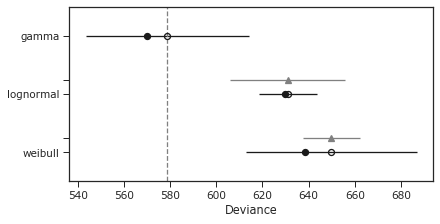

In [135]:
df_comp_WAIC = az.compare(dict({'weibull': trace_weibull, 'lognormal': trace_lognormal, 'gamma': trace_gamma}))
az.plot_compare(df_comp_WAIC);
df_comp_WAIC

$\Uparrow$ according to WAICs, Gamma distribution is the best

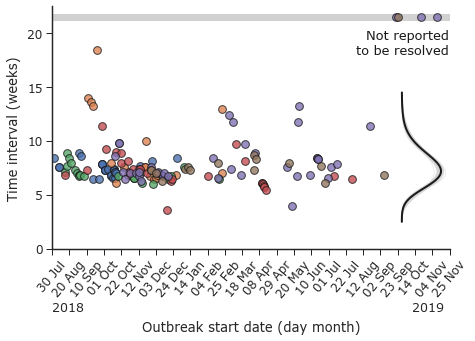

In [136]:
fig, ax = plt.subplots(1)
fig.set_size_inches(6.7,5); 

na_level = 21.5
for idx,rgn in enumerate(rgns):
    Df__ = Df.loc[Df['region']==rgn].copy()
    Df__['time_to_resolve_outbreak'] = (Df__['end']-Df__['start']).astype('timedelta64[D]')
    Df__['time_to_resolve_outbreak'] = Df__['time_to_resolve_outbreak'].fillna(na_level*7)
    ax.scatter(Df__['start'].values,Df__['time_to_resolve_outbreak'].values/7,edgecolor='k',alpha=.8,facecolor=clrs[idx],s=60)

xtks = pd.date_range(start=np.min(Df['start_week_date']),
                     end=np.max(Df['start_week_date']+np.timedelta64(5,'W')),freq='1D')[::21]
ax.set_xticks(xtks)
ax.set_xticklabels([x.strftime("%d %b") for x in xtks])

ymx = 22.5; ystep = 5
ax.set_xlim(xtks[0],xtks[-1])
ax.set_ylim(0,ymx)
ytks = np.arange(0,ymx+ystep,ystep)[:-1]
ax.set_xlabel('Outbreak start date (day month)',labelpad=20)
ax.set_ylabel('Time interval (weeks)',labelpad=6)
ax.set_yticks(ytks)
# ax.set_title('Time interval between outbreak start and end dates',y=1.06,fontweight="bold")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False);
fig.autofmt_xdate(rotation=50,ha='center')

ax.axhline(y=na_level,lw=7,alpha=.2,color='k',linestyle='-',zorder=-5);

ax.text(xtks[-1]-np.timedelta64(1,'D'),na_level-3.4,'Not reported\nto be resolved',ha='right',color='k',fontsize=13)
set_xlabel_annotation(ax)

ax2 = ax.twiny()
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.tick_params(top=False, right=False)
ax2.set_xticks([])

xx = np.linspace(2.5,14.5,100)
yy_trace = []
yy_ = lambda xx, μ, σ: tt.exp(pm.Gamma.dist(mu=μ,sd=σ).logp(xx)).eval()
xscale=.4
for idx in range(70):
    ax2.plot(.88+xscale*yy_(xx,trace_gamma[idx]['Δmean'],trace_gamma[idx]['Δsd']),xx,lw=.4,color='lightgrey')
ax2.plot(.88+xscale*yy_(xx,model_gamma_summary.loc['Δmean','mean'],model_gamma_summary.loc['Δsd','mean']),xx,lw=2,color='k')
ax2.set_xlim(0,1)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig("../../figures/draft/Fig1-B.pdf",format='pdf',dpi=300,bbox_inches='tight')

# Generating Fig1

In [139]:
%%capture
%%bash
filename=Fig1
pdflatex <<TeXScript
\documentclass{standalone}
\usepackage{tikz,graphicx,helvet}
\usepackage[T1]{fontenc}
\renewcommand{\familydefault}{\sfdefault}

\begin{document}
\begin{tikzpicture}
    \node[anchor=south west,scale=1.45] at (-.7in,-6.05in) {\includegraphics{../../figures/draft/Fig1-map2.pdf}};
    \node[anchor=south west,scale=1.45] at (-.7in,0in) {\includegraphics{../../figures/draft/Fig1-map1.pdf}};
    \node[anchor=north east] at (0in,-.4in) {\includegraphics{../../figures/draft/Fig1-B.pdf}};
    \node[anchor=south east] at (0in,0in) {\includegraphics{../../figures/draft/Fig1-epicurve.pdf}};
    \node[anchor=north east] at (-6.4in,.15in) {\huge {\bf B}};
    \node[anchor=north east] at (0.44in,.15in) {\huge {\bf D}};
    \node[anchor=south east] at (0.44in,5.9in) {\huge {\bf C}};
    \node[anchor=south east] at (-6.4in,5.9in) {\huge {\bf A}};
\end{tikzpicture}
\end{document}
TeXScript
mv texput.pdf ../../figures/${filename}.pdf
rm texput.*
pdftoppm -png ../../figures/${filename}.pdf .output
mv .output-1.png ../../figures/pngs/${filename}.png

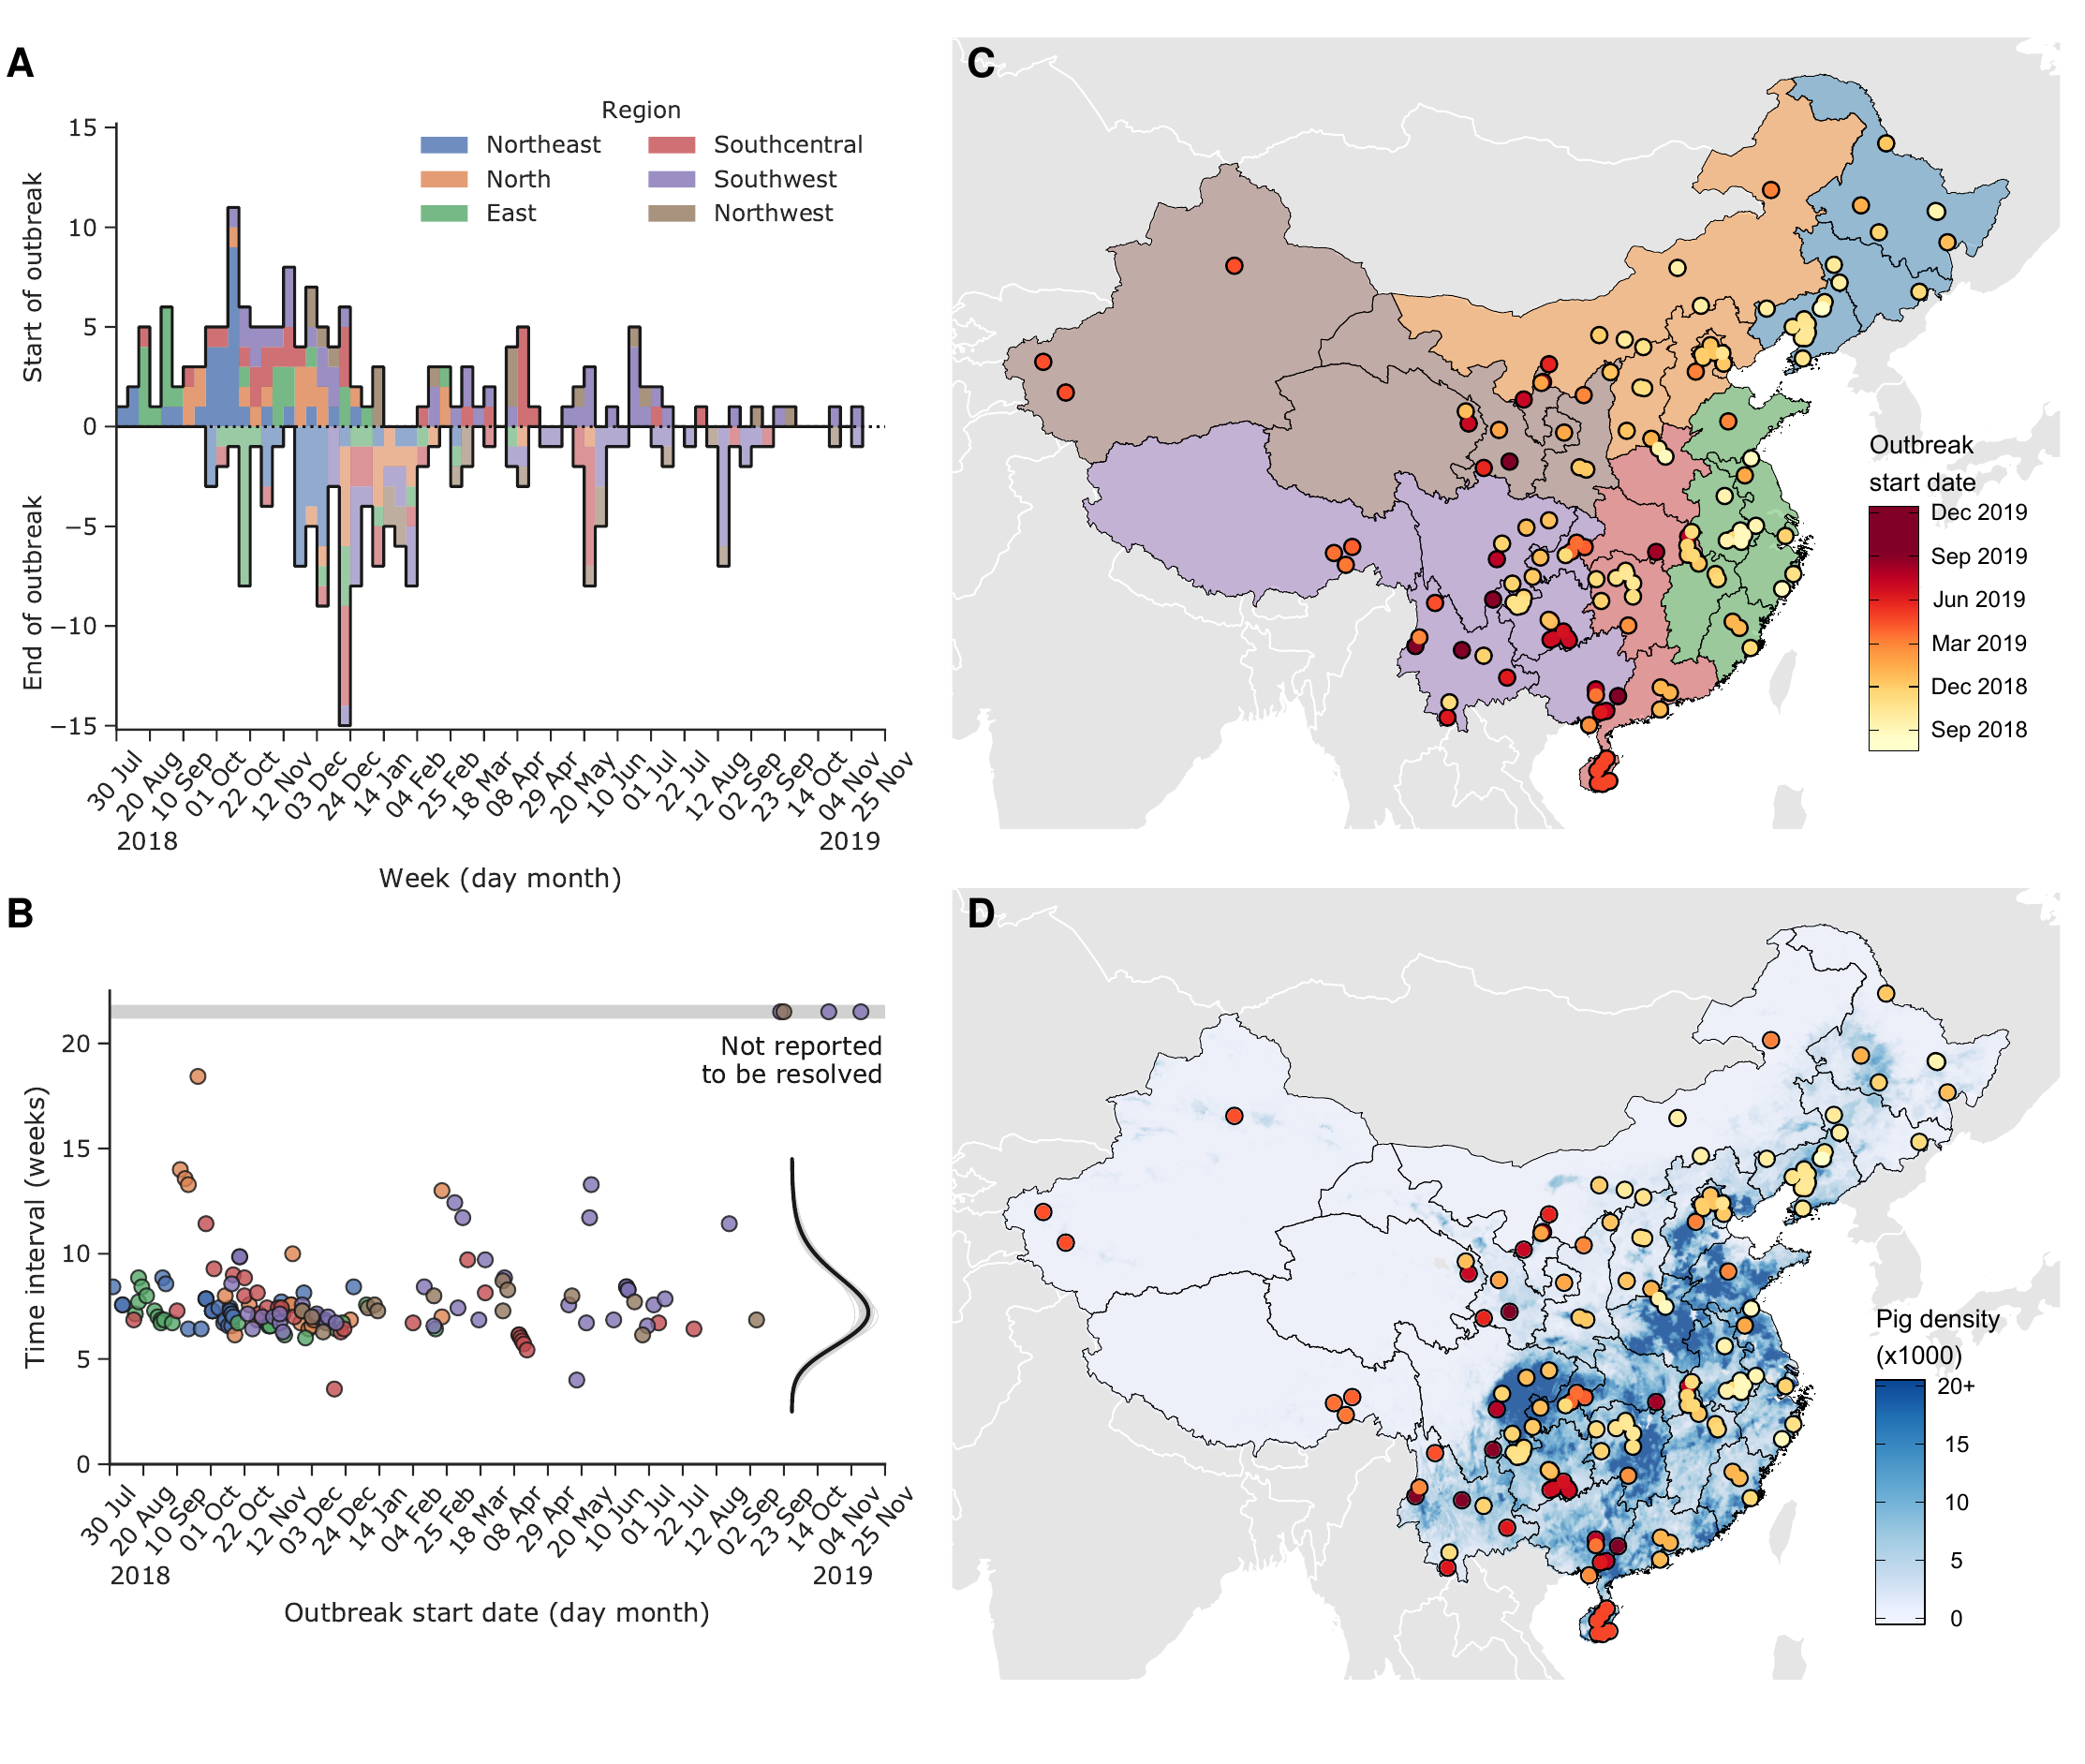

In [140]:
display(Image("../../figures/pngs/Fig1.png", width="75%"))

In [141]:
%%capture
%%bash
filename=Fig1S1
pdflatex <<TeXScript
\documentclass{standalone}
\usepackage{tikz,graphicx,helvet}
\usepackage[T1]{fontenc}
\renewcommand{\familydefault}{\sfdefault}

\begin{document}
\begin{tikzpicture}
    \node[anchor=west] at (.1in,0in) {\includegraphics{../../figures/draft/Fig1-epicurve_by_unit_size.pdf}};
    \node[anchor=east] at (0in,0in) {\includegraphics{../../figures/draft/Fig1-epicurve_by_unit_type.pdf}};
    \node[anchor=east] at (0.15in,3.1in) {\huge {\bf B}};
    \node[anchor=east] at (-6.45in,3.1in) {\huge {\bf A}};
\end{tikzpicture}
\end{document}
TeXScript
mv texput.pdf ../../figures/${filename}.pdf
rm texput.*
pdftoppm -png ../../figures/${filename}.pdf .output
mv .output-1.png ../../figures/pngs/${filename}.png

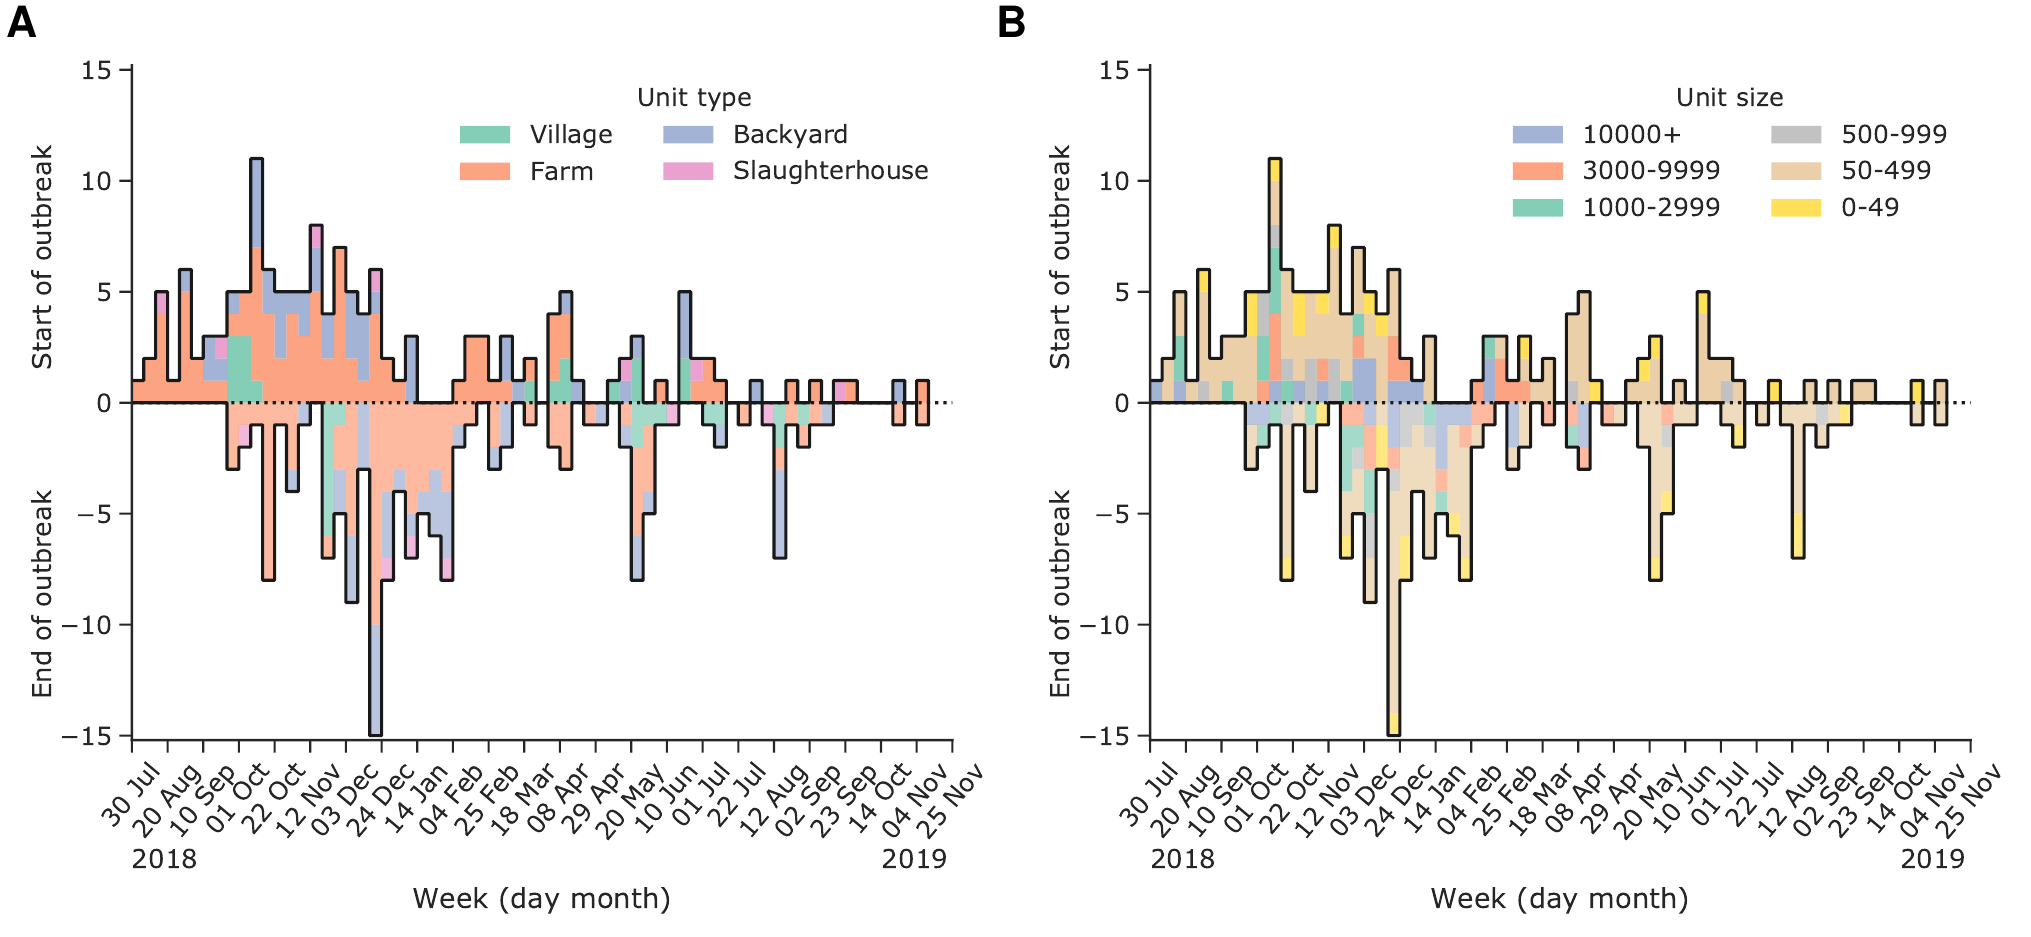

In [142]:
display(Image("../../figures/pngs/Fig1S1.png", width="75%"))

# Checking correlations

In [143]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [144]:
Df.shape

(153, 28)

## B/w starting day and size of the infected unit

In [145]:
# Pearson's r
Df_['t'].corr(Df_['susceptible'])

-0.06741797542314698

In [146]:
# Pearson's r and P value 
ss.pearsonr(Df_['t'],Df_['susceptible'])

(-0.06741797542314701, 0.4076602252369593)

In [147]:
# To confirm P-value
cw_lm=ols('t ~ susceptible',data=Df_).fit() 
sm.stats.anova_lm(cw_lm, typ=2)

sum_sq     df         F   PR(>F)
susceptible  7.871743e+03    1.0  0.689456  0.40766
Residual     1.724015e+06  151.0       NaN      NaN

## B/w starting day and type of the infected unit

In [148]:
cw_lm=ols('t ~ C(unit)',data=Df).fit() 
sm.stats.anova_lm(cw_lm, typ=2)

sum_sq     df         F    PR(>F)
C(unit)   4.861354e+04    3.0  1.434391  0.235079
Residual  1.683273e+06  149.0       NaN       NaN

# Creating some necessary variables

In [149]:
noutbreaks = Df.shape[0]
noutbreaks

153

In [150]:
Distance = np.zeros([Df.shape[0]]*2)
for index_infector, index_infectee in itertools.product(np.arange(noutbreaks),np.arange(noutbreaks)):
    coords_infectee = tuple((Df.loc[index_infectee,['lat','long']]).values)
    coords_infector = tuple((Df.loc[index_infector,['lat','long']]).values)
    Distance[index_infectee,index_infector] = geopy.distance.distance(coords_infectee, coords_infector).km

Distance = shared(Distance)
Distance.eval()

array([[   0.        ,   11.08522035,    6.03591897, ..., 1850.33327796,
        2738.57590423, 2917.10137865],
       [  11.08522035,    0.        ,    5.05231349, ..., 1860.60942195,
        2747.38264424, 2926.42559735],
       [   6.03591897,    5.05231349,    0.        , ..., 1855.87800548,
        2743.29002158, 2922.10626173],
       ...,
       [1850.33327796, 1860.60942195, 1855.87800548, ...,    0.        ,
        1066.29844811, 1147.93456395],
       [2738.57590423, 2747.38264424, 2743.29002158, ..., 1066.29844811,
           0.        ,  285.45350223],
       [2917.10137865, 2926.42559735, 2922.10626173, ..., 1147.93456395,
         285.45350223,    0.        ]])

# 1. Reconstruction of the transmission network by minimal distance 

In [154]:
with pm.Model() as model:
    Δdata = (observed_data['end']-observed_data['start']).astype('timedelta64[D]').astype('int').values
    
    Δmean = pm.HalfNormal('Δmean',np.mean(Δdata))
    Δsd = pm.HalfNormal('Δsd',np.std(Δdata))
    pm.Gamma('Δobs',mu=Δmean,sd=Δsd,observed=Δdata)
    
    trace_delay = pm.sample(10000,tune=5000, random_seed=523)
    
    K = Df['t'].shape[0] #number of outbreaks
    starting_times = shared(Df['t'].values)
    M_times = tt.reshape(tt.repeat(starting_times,K)-tt.tile(starting_times,K),(K,K))
    
    Δcens = pm.Gamma('Δcens',mu=Δmean,sd=Δsd,shape=cencored_data.shape[0])
    ending_times = starting_times + tt.concatenate([Δdata,Δcens])
    M_times_end = tt.reshape(tt.tile(ending_times,K)-tt.repeat(starting_times,K),(K,K))
    
    incubation_time_mean = 6.3
    incubation_time_sd = 1.3
    incubation_time = pm.Gamma('incubation_time',mu=incubation_time_mean,sd=incubation_time_sd,shape=(K,K))
    
    M = tt.switch(tt.ge(M_times_end,-incubation_time),tt.switch(tt.ge(M_times,incubation_time),Distance,1e5),1e5)
    connectivity = pm.Deterministic('connectivity',tt.argsort(M)[:,0])
    # to check if we indeed have a possible pair of infector - infectee
    availability = pm.Deterministic('availability',tt.switch(tt.lt(M.min(axis=1),1e5),1,0))
    
    display(pm.summary(trace_delay))

    trace = pm.sample_posterior_predictive(trace_delay, vars=[connectivity,availability], samples=nsamples, random_seed=523)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Δsd, Δmean]
Sampling 4 chains, 0 divergences: 100%|██████████| 60000/60000 [00:12<00:00, 4660.80draws/s]


mean        sd  mc_error    hpd_2.5   hpd_97.5         n_eff  \
Δmean  53.977401  0.971762  0.005313  52.053013  55.858790  29882.340045   
Δsd    11.814547  0.716926  0.003752  10.475763  13.250369  30335.703314   

           Rhat  
Δmean  1.000032  
Δsd    0.999997

/home/aakhmetz/anaconda/lib/python3.7/site-packages/pymc3/sampling.py:1109: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn("samples parameter is smaller than nchains times ndraws, some draws "
100%|██████████| 1000/1000 [01:05<00:00, 15.29it/s]


In [155]:
for idx in range(noutbreaks):
    res_ = trace['connectivity'][:,idx]
    avail_ = trace['availability'][:,idx]
    out_ = [0]*noutbreaks
    for key, group in itertools.groupby(np.sort(res_[avail_==1])):
        out_[key] = len(list(group))/len(res_)
    
    res_occurrences = np.c_[res_occurrences,out_] if idx else out_
prob = res_occurrences.T
prob

array([[0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.432, 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.444, 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       ...,
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , ..., 0.   , 1.   , 0.   ]])

In [156]:
prob.shape

(153, 153)

In [157]:
for idx in range(noutbreaks-1):
    avail_ = trace['availability'][:,idx]
    out_avail_ = (1-len(avail_[avail_==1])/len(avail_))*100
    res_failure = np.r_[res_failure,out_avail_] if idx else [out_avail_]
    
res_failure

array([100. ,  56.8,  55.6,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
         0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
         0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
         0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
         0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
         0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
         0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
         0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
         0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
         0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
         0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
         0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
         0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
         0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
         0. ,   0. ,

In [158]:
for idx,res_ in enumerate(trace['connectivity']):
    res_occurrences = [[key,len(list(group))] for key, group in itertools.groupby(np.sort(res_))]
    df = pd.DataFrame({'index': [x[0] for x in res_occurrences], 'n': [x[1] for x in res_occurrences]})\
        .merge(Df.reset_index().loc[:,['index','start_week']],how='right').sort_values('index').fillna(0).set_index('index')
    Rts_ = df.groupby('start_week').mean().reset_index().merge(pd.DataFrame({'start_week': np.arange(0,max(Df['start_week'])+1)}),how='right').\
        fillna(0).sort_values('start_week').n.values
    Rts = Rts_ if idx==0 else np.vstack([Rts,Rts_])

Rts_percentiles = np.percentile(Rts,[2.5,25,50,75,97.5],axis=0).T
Rts_percentiles

array([[15.        , 16.        , 17.        , 17.        , 17.        ],
       [ 1.5       ,  1.5       ,  1.5       ,  1.5       ,  2.        ],
       [ 1.4       ,  1.4       ,  1.4       ,  1.4       ,  1.6       ],
       [ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [ 0.        ,  0.16666667,  0.16666667,  0.16666667,  0.16666667],
       [ 0.5       ,  1.        ,  1.5       ,  1.5       ,  1.5       ],
       [ 0.66666667,  0.66666667,  0.66666667,  0.66666667,  0.66666667],
       [ 1.33333333,  1.66666667,  1.66666667,  1.66666667,  2.        ],
       [ 1.4       ,  1.8       ,  1.8       ,  2.        ,  2.2       ],
       [ 1.2       ,  1.6       ,  1.6       ,  1.8       ,  1.805     ],
       [ 0.54545455,  0.54545455,  0.54545455,  0.63636364,  0.72727273],
       [ 1.5       ,  1.66666667,  1.66666667,  1.66666667,  1.83333333],
       [ 0.6       ,  0.6       ,  0.6       ,  0.8       ,  1.        ],
       [ 1.6       ,  1.8       ,  2. 

CPU times: user 380 ms, sys: 286 ms, total: 666 ms
Wall time: 240 ms


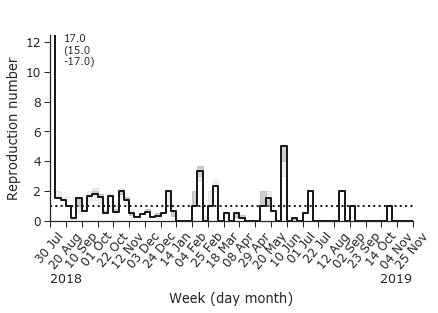

In [159]:
%%time
fig, ax = plt.subplots(1)
fig.set_size_inches(6.5,3.8);
clr = 'C7'

ymx = 12.5

df_Rts = pd.DataFrame(Rts_percentiles,columns=['p2.5','p25','median','p75','p97.5']).\
    reset_index().rename(columns={'index':'week'}).set_index('week')

df_Rts.round(3).to_csv("csvs/RtsMinimal.csv")

xmx = max(df_Rts.index)+3

xs = df_Rts.index
ys = df_Rts['median']
ax.step(np.r_[xs,xs[-1:]+5],np.r_[ys,ys[-1:]],where='post',lw=2,color='k')
ys1 = df_Rts['p2.5']; ys2 = df_Rts['p97.5']
ax.fill_between(np.r_[xs,xs[-1:]+5],np.r_[ys1,ys1[-1:]],np.r_[ys2,ys2[-1:]],
                step='post',color=clr,alpha=.15)
ys1 = df_Rts['p25']; ys2 = df_Rts['p75']
ax.fill_between(np.r_[xs,xs[-1:]+5],np.r_[ys1,ys1[-1:]],np.r_[ys2,ys2[-1:]],
                step='post',color=clr,alpha=.3)

xtks = [int(x) for x in np.arange(np.min(Df['start_week']),
                                  np.max(np.r_[Df['start_week'],Df['end_week'].dropna()]+4),3)]
ax.set_xticks(xtks)
ax.set_xticklabels([x.strftime("%d %b") for x in [week_date0+np.timedelta64(x,'W') for x in xtks]])
ax.set_xlim(xtks[0],xtks[-1])
def set_xlabel_annotation(ax):
    ax.annotate('2019', (0,0), (330, -52), xycoords='axes fraction', textcoords='offset points', 
                va='top', fontsize=12.5)
    ax.annotate('2018', (0,0), (0, -52), xycoords='axes fraction', textcoords='offset points', 
                va='top', fontsize=12.5)
set_xlabel_annotation(ax)
ax.set_xlabel("Week (day month)",labelpad=20)
ax.set_ylabel("Reproduction number")
ax.set_title(r"\bf x",y=1.06,color='w')
ax.set_yticks(np.arange(0,ymx+2,2))
ax.set_ylim(bottom=0,top=ymx)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False);
fig.autofmt_xdate(rotation=50,ha='center')
ax.axhline(y=1,lw=2,color='k',linestyle=':',zorder=-2)

if (df_Rts['p97.5'].iloc[0]>ymx):
    ax.text(xtks[1]-.5,ymx-2,'%.1f\n(%.1f\n-%.1f)'%(df_Rts['median'].iloc[0],df_Rts['p2.5'].iloc[0],df_Rts['p97.5'].iloc[0]),
            ha='left',fontsize=10)

plt.savefig("../../figures/draft/FigMinimal-Rt.pdf",format='pdf',dpi=300,bbox_inches='tight')

In [160]:
print("Distance")
res_distance = [[Distance.eval()[j][res_[j]] for j in range(len(res_)) if ((res_[j]>=0)&(av_[j]>0))] 
                for res_,av_ in zip(trace['connectivity'],trace['availability'])]
res_distance = reduce(concat, res_distance)
print(np.r_[min(res_distance),max(res_distance),ss.scoreatpercentile(res_distance,[2.5,25,50,75,97.5]),np.mean(res_distance),np.std(res_distance)])

print("\nSerial interval")
res_SI = [[(Df.loc[j,'t'].item()-Df.loc[res_[j],'t'].item()) for j in range(len(res_)) if ((res_[j]>=0)&(av_[j]>0))] 
          for res_,av_ in zip(trace['connectivity'],trace['availability'])]
res_SI= reduce(concat, res_SI)
print(np.r_[min(res_SI),max(res_SI),ss.scoreatpercentile(res_SI,[2.5,25,50,75,97.5]),np.mean(res_SI),np.std(res_SI)])

Distance
[   5.69326486 1921.33043518   12.8117909   101.83975516  220.8916986
  481.65211151 1548.28231179  340.86038123  361.36369959]

Serial interval
[ 3.         65.          6.         14.         25.         44.
 62.         29.27930221 17.88524931]


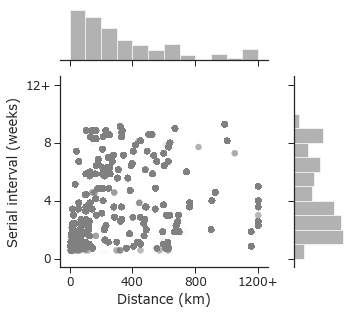

In [161]:
ystep = 400; ymx = 1200
xstep = 4; xmx = 12
clr0 = "grey"

ydistance = [y if y<=ymx else ymx for y in res_distance]
ySI = [y/7 if y<=xmx*7 else xmx for y in res_SI]

hist_plot = sns.JointGrid(ydistance, ySI, ratio=3)
hist_plot = hist_plot.plot_joint(plt.scatter, color=clr0, s=40, edgecolor='none', alpha=.03)
hist_plot.ax_marg_y.hist(ySI, color=clr0, alpha=.6,
                      orientation="horizontal", 
                      bins=np.arange(0, xmx+xstep/4, xstep/4))
hist_plot.ax_marg_x.hist(ydistance, color=clr0, alpha=.6,
                      bins=np.arange(0, ymx+ystep/4, ystep/4))

hist_plot.set_axis_labels('Distance (km)', 'Serial interval (weeks)')

tks_distance = np.arange(0,ymx+ystep,ystep)
hist_plot.ax_joint.set_xticks(tks_distance);
hist_plot.ax_marg_x.set_xticks(tks_distance);
hist_plot.ax_joint.set_xticklabels([tklb if idx else str(tklb)+"+" for idx,tklb in enumerate(tks_distance[::-1])][::-1])
tks_SI = np.arange(0,xmx+xstep,xstep)
hist_plot.ax_joint.set_yticks(tks_SI);
hist_plot.ax_joint.set_yticklabels([tklb if idx else str(tklb)+"+" for idx,tklb in enumerate(tks_SI[::-1])][::-1])

fig = plt.gcf()
fig.set_size_inches(5,4.6)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig("../../figures/draft/FigMinimal-scatter.pdf",format='pdf',bbox_inches='tight')

In [162]:
Df_cut = Df.loc[:,['start','lat','long']]

R[write to console]: Loading required package: mapproj

R[write to console]: Regions defined for each Polygons



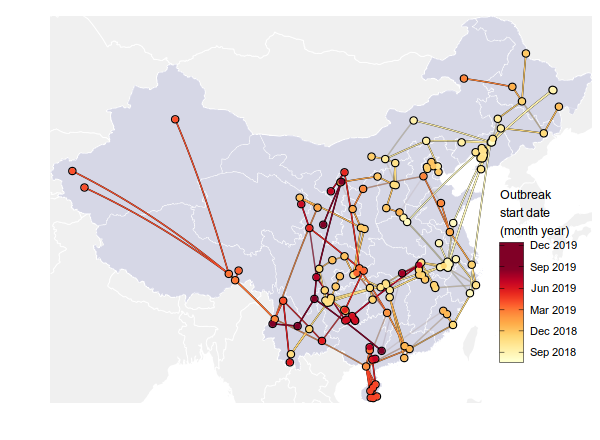

In [163]:
%%R -w 600 -h 440 -r 100 -i Df_cut -i prob -i clr_background_China
lbrs = c("RColorBrewer","geosphere","ggplot2","dplyr","magrittr","tidyr","ggmap",
         "glue","lubridate","rnaturalearth","rnaturalearthdata")

for(x in lbrs) { library(x,character.only=TRUE,warn.conflicts=FALSE) }
require("raster"); require("mapproj")
'%&%' <- function(x,y)paste0(x,y)
theme_set(theme_minimal(base_size=11)) 
remove_axes = theme(axis.text = element_blank(),axis.line = element_blank(),axis.ticks = element_blank(),
                    panel.border = element_blank(),panel.grid = element_blank(),axis.title = element_blank())
raster::getData("GADM",country="CHN",level = 1) %>% fortify -> chn_map

Df_cut %>% mutate(start = as.Date(start,"%Y-%m-%d",origin = lubridate::origin)) -> df

world = ne_countries(scale = "medium", returnclass = "sf")

chn_long_minmax = c(chn_map$long %>% min, chn_map$long %>% max)
chn_lat_minmax = c(chn_map$lat %>% min, chn_map$lat %>% max)

chn_map %>% 
    ggplot() +
        geom_sf(data = world, size=.3, color="white", fill="#f0f0f0") +
        geom_map(map = chn_map, aes(group = group, map_id = id), fill = clr_background_China, alpha = .5, 
                 color="white", lwd = .15) +
        expand_limits(x = chn_map$long, y = chn_map$lat) +
        coord_sf(xlim = c(chn_long_minmax), ylim = c(chn_lat_minmax), expand=F) +
        remove_axes -> p

npoints = 15
idx = 1
for (infectee in 1:dim(prob)[1]) {
    point_dest = df[infectee,c('long','lat')]
    for (potential_infector in 1:dim(prob)[2]) {
#         print(c(infectee,potential_infector,df[potential_infector,c('province','long','lat')]))
        probability_of_transmission = prob[infectee,potential_infector]
        if (probability_of_transmission>0.01) {
            point_origin = df[potential_infector,c('long','lat')]
            if (!((point_origin[1] %>% is.na) | (point_origin[2] %>% is.na) | ((point_origin[1]==point_dest[1]) & (point_origin[2]==point_dest[2])))) {
                gcIntermediate(point_origin, point_dest, n=npoints, addStartEnd=TRUE) %>% as.data.frame %>% 
                    mutate(prob = probability_of_transmission, index = idx, 
                           infectee_start=df[infectee,]$start) -> inter_
                if (idx==1)
                    inter = inter_
                else 
                    inter %<>% rbind(inter_)
                idx = idx + 1
            }
        }
    }
}
p = p + geom_line(data=inter, aes(x=lon, y=lat, group=index, alpha=prob**.5, size=prob), lwd=.5) +
    geom_line(data=inter, aes(x=lon, y=lat, group=index, alpha=prob**.5, size=prob,
                                  colour=infectee_start), lwd=.4) +
    scale_alpha_continuous(guide = F, range = c(0, 1)) +
    scale_size_continuous(guide = F, range = c(0, .5))  

brks = as.Date(c('20180901','20181201','20190301','20190601','20190901','20191201'),"%Y%m%d")
brks_max = as.Date('20191201',"%Y%m%d")
brks_min = as.Date('20180801',"%Y%m%d")
brks_lbls = c('Sep 2018','Dec 2018','Mar 2019','Jun 2019','Sep 2019','Dec 2019')

p = p +         
    geom_point(data = arrange(df,desc(start)), aes(x = long, y = lat), color='black', size=2, stroke = .65, fill=NA, shape=21) +
    geom_point(data = arrange(df,start), aes(x = long, y = lat, color = start), size=1.4, shape=19) +
    scale_color_gradientn(colors = c(brewer.pal(9,"YlOrRd"),rep(brewer.pal(9,"YlOrRd")[9],2)),
                          breaks = brks,
                          labels = brks_lbls,
                          limits = c(brks_min, max(c(max(df$start), brks_max))), 
                          name = "Outbreak\nstart date\n(month year)", 
                          trans = "date", 
                          guide = guide_colourbar(title.position='top',direction = "vertical",
                                                  frame.colour = "black", ticks.colour = "black",
                                                  title.theme = element_text(size = 9),
                                                  label.theme = element_text(size = 8, hjust = 0.5))) +
    theme(legend.position = c(.9, .33)) + 
    remove_axes +
    theme(panel.grid.major = element_line(color = "white"), axis.text = element_text(color = "white"))


ggsave(plot=p,width=6,height=4.4,filename="../../figures/draft/FigMinimal-map.pdf",useDingbats=FALSE)

p

In [164]:
%%capture
%%bash
type=Minimal
filename=Fig${type}
pdflatex <<TeXScript
\documentclass{standalone}
\usepackage{tikz,graphicx}
\usepackage[T1]{fontenc}

\begin{document}
\begin{tikzpicture}
    \node[anchor=north east,scale=1.35] at (-1.1in,-.2in) {\includegraphics{../../figures/draft/Fig${type}-map.pdf}};
    \node[anchor=north west] at (-1in,-2.15in) {\includegraphics{../../figures/draft/Fig${type}-Rt.pdf}};
    \node[anchor=north west,scale=.95] at (.32in,0in) {\includegraphics{../../figures/draft/Fig${type}-scatter.pdf}};
\end{tikzpicture}
\end{document}
TeXScript
mv texput.pdf ../../figures/${filename}.pdf
rm texput.*
pdftoppm -png ../../figures/${filename}.pdf .output
mv .output-1.png ../../figures/pngs/${filename}.png

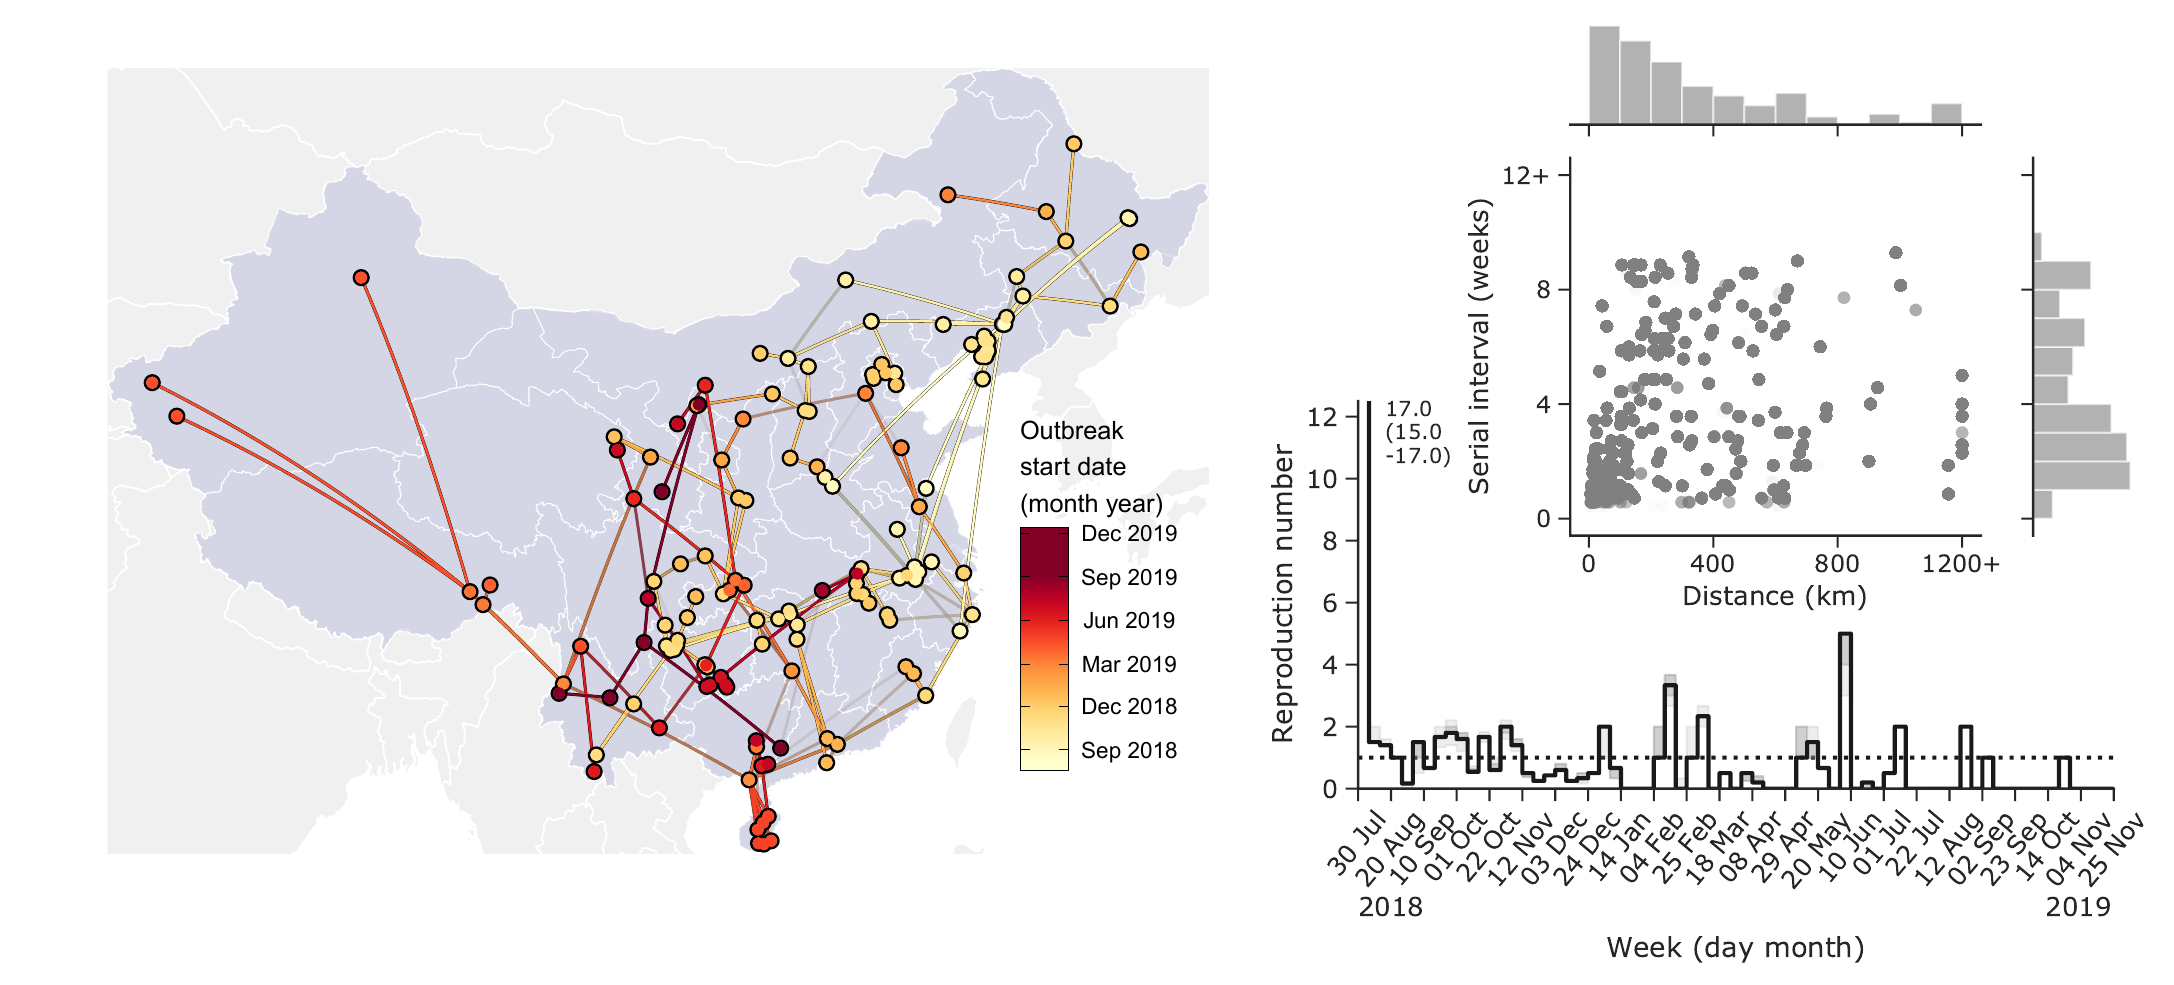

In [165]:
locale.setlocale(locale.LC_ALL, 'en_US.utf8')
display(Image("../../figures/pngs/FigMinimal.png", width="75%"))

### Network

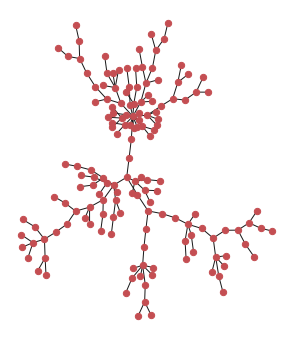

In [167]:
G_minimal = nx.Graph()
G_minimal.add_edges_from([(y,x) for x,y in enumerate( trace['connectivity'][0]) if y>=0])

fig, ax = plt.subplots(figsize=(5, 6))
nx.draw(G_minimal,pos=nx.kamada_kawai_layout(G_minimal),ax=ax,node_size=40,node_color='C3');

# 2. Exponential 

In [168]:
df_epi = Df.groupby('start_week').size()
df_epi = pd.DataFrame(df_epi,columns=['n']).reset_index()
df_epi = pd.DataFrame({'start_week': range(xmax_week+1)}).merge(df_epi,how='left').fillna(0)
df_epi['n'] = df_epi['n'].astype(int)
df_epi[:4]

start_week  n
0           0  1
1           1  2
2           2  5
3           3  1

In [169]:
# distance kernel
distance_baseline = 200.
dbar = shared(distance_baseline)
M_distance = tt.exp(-Distance/dbar)

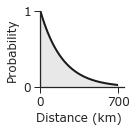

In [170]:
fig, ax = plt.subplots(1)
fig.set_size_inches(2,2); 

dbar_val = dbar.eval()
xmx0 = dbar.eval()*3+100; xstp0 = 100

xx = np.linspace(0,xmx0,1000)
ε_ = 0.01
yy = [np.exp(-_/dbar_val) for _ in xx]
ax.plot(xx,yy,c='k',lw=2)
ax.fill_between(xx,yy,color='C7',alpha=.2)

xtks = np.arange(0,xmx0+xstp0,xstp0)
ax.set_xticks([0,xmx0])
ax.set_xlim(0,xmx0)
ax.set_yticks([0,1])
ax.set_ylim(0,1)
ax.set_xlabel('Distance (km)',size=12);
ax.set_ylabel('Probability',size=12);
# ax.axvline(x=dbar_val,lw=1,color='k',linestyle='dashed',zorder=2)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_bounds(0,xmx0+50)
    
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig("../../figures/draft/FigExponential-distr.pdf",format='pdf',bbox_inches='tight')

In [173]:
def makeModel(dbar_val):
    dbar.set_value(dbar_val)
    with pm.Model() as model:
        Δdata = (observed_data['end']-observed_data['start']).astype('timedelta64[D]').astype('int').values

        Δmean = pm.HalfNormal('Δmean',np.mean(Δdata))
        Δsd = pm.HalfNormal('Δsd',np.std(Δdata))
        pm.Gamma('Δobs',mu=Δmean,sd=Δsd,observed=Δdata)

        trace_delay = pm.sample(10000, tune=5000, init='advi', random_seed=523)

        K = Df['t'].shape[0] #number of outbreaks
        starting_times = shared(Df['t'].values)
        # creating a matrix of time intervals between potential pairs of infector-infectee
        # by broadcasting of the vector "starting_times" to two dimensions (~repeat and tile operations)
        Δcens = pm.Gamma('Δcens',mu=Δmean,sd=Δsd,shape=cencored_data.shape[0])
        ending_times = starting_times + tt.concatenate([Δdata,Δcens])
        M_times_end = tt.reshape(tt.tile(ending_times,K)-tt.repeat(starting_times,K),(K,K))

        incubation_time_mean = 6.3
        incubation_time_sd = 1.3
        incubation_time = pm.Gamma('incubation_time',mu=incubation_time_mean,sd=incubation_time_sd,shape=(K,K))
        
        M = tt.switch(tt.ge(M_times_end,-incubation_time),tt.switch(tt.ge(M_times,incubation_time),M_distance,0),0)
        
        # sometimes there are no infectors to connect with, so we assign 1 to such cases
        failed_to_connect = tt.switch(tt.gt(M.max(axis=1),0),0,1)
        # and add as the last column to the matrix M
        p = pm.Deterministic('p',tt.concatenate([M,tt.shape_padright(failed_to_connect)],axis=1))
        # then, whenever we can't connect, the last element will be chosen
        connectivity_ = pm.Categorical('connectivity_',p=p,shape=K)
        # for simplicity we denote those last elements by -1
        connectivity = pm.Deterministic('connectivity',tt.switch(tt.lt(connectivity_,K),connectivity_,-1))

        trace = pm.sample_posterior_predictive(trace_delay, vars=[p,connectivity], samples=nsamples, random_seed=523)  #
        
    display(pm.summary(trace_delay))

    return trace

In [174]:
trace = makeModel(dbar.eval())

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average Loss = 621.18:   6%|▌         | 11196/200000 [00:03<00:51, 3678.76it/s]
Convergence achieved at 11200
Interrupted at 11,199 [5%]: Average Loss = 1,011.2
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Δsd, Δmean]
Sampling 4 chains, 0 divergences: 100%|██████████| 60000/60000 [00:13<00:00, 4401.02draws/s]
/home/aakhmetz/anaconda/lib/python3.7/site-packages/pymc3/sampling.py:1109: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn("samples parameter is smaller than nchains times ndraws, some draws "
100%|██████████| 1000/1000 [02:20<00:00,  7.10it/s]


mean        sd  mc_error    hpd_2.5   hpd_97.5         n_eff  \
Δmean  53.981857  0.965787  0.005767  52.100017  55.887244  27822.119747   
Δsd    11.823280  0.725732  0.006756  10.425311  13.273655  10867.210640   

           Rhat  
Δmean  1.000017  
Δsd    1.000030

In [175]:
for idx in range(noutbreaks):
    res_ = trace['connectivity'][:,idx] 
    out_ = [0]*noutbreaks
    for key, group in itertools.groupby(np.sort(res_[res_>=0])):
        out_[key] = len(list(group))/len(res_)
    
    res_occurrences = np.c_[res_occurrences,out_] if idx else out_
prob = res_occurrences.T
prob

array([[0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.433, 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.448, 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       ...,
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , ..., 0.019, 0.   , 0.   ],
       [0.   , 0.   , 0.   , ..., 0.004, 0.772, 0.   ]])

In [176]:
for idx,res_ in enumerate(trace['connectivity']):
    res_occurrences = [[key,len(list(group))] for key, group in itertools.groupby(np.sort(res_))]
    df = pd.DataFrame({'index': [x[0] for x in res_occurrences], 'n': [x[1] for x in res_occurrences]})\
        .merge(Df.reset_index().loc[:,['index','start_week']],how='right').sort_values('index').fillna(0).set_index('index')
    Rts_ = df.groupby('start_week').mean().reset_index().merge(pd.DataFrame({'start_week': np.arange(0,max(Df['start_week'])+1)}),how='right').\
        fillna(0).sort_values('start_week').n.values
    Rts = Rts_ if idx==0 else np.vstack([Rts,Rts_])

Rts_percentiles = np.percentile(Rts,[2.5,25,50,75,97.5],axis=0).T
Rts_percentiles

array([[ 2.        ,  5.        ,  6.        ,  8.        , 10.        ],
       [ 3.        ,  4.        ,  5.        ,  5.5       ,  7.        ],
       [ 1.        ,  1.4       ,  1.6       ,  1.8       ,  2.2       ],
       [ 0.        ,  1.        ,  2.        ,  2.        ,  4.        ],
       [ 0.        ,  0.33333333,  0.5       ,  0.66666667,  1.        ],
       [ 0.        ,  0.        ,  0.5       ,  0.5       ,  1.5       ],
       [ 0.33333333,  0.66666667,  1.        ,  1.66666667,  2.33333333],
       [ 0.66666667,  1.33333333,  2.        ,  2.33333333,  3.33333333],
       [ 1.        ,  1.6       ,  2.        ,  2.4       ,  3.005     ],
       [ 0.8       ,  1.4       ,  1.8       ,  2.2       ,  2.8       ],
       [ 0.18181818,  0.45454545,  0.54545455,  0.72727273,  1.        ],
       [ 0.66666667,  1.16666667,  1.33333333,  1.66666667,  2.33333333],
       [ 0.4       ,  0.8       ,  1.2       ,  1.4       ,  2.        ],
       [ 0.4       ,  0.8       ,  1.2

CPU times: user 420 ms, sys: 319 ms, total: 739 ms
Wall time: 244 ms


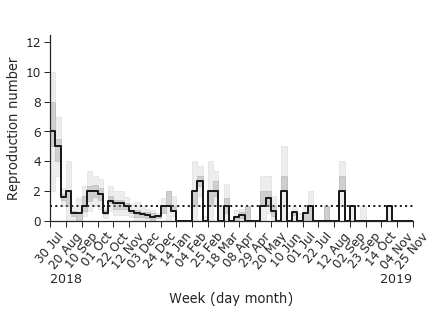

In [177]:
%%time
fig, ax = plt.subplots(1)
fig.set_size_inches(6.5,3.8);
clr = 'C7'

ymx = 12.5
xtext19 = 266
xtext18 = 102

df_Rts = pd.DataFrame(Rts_percentiles,columns=['p2.5','p25','median','p75','p97.5']).\
    reset_index().rename(columns={'index':'week'}).set_index('week')

df_Rts.round(3).to_csv("csvs/RtsExponential.csv")

xmx = max(df_Rts.index)+3

xs = df_Rts.index
ys = df_Rts['median']
ax.step(np.r_[xs,xs[-1:]+5],np.r_[ys,ys[-1:]],where='post',lw=2,color='k')
ys1 = df_Rts['p2.5']; ys2 = df_Rts['p97.5']
ax.fill_between(np.r_[xs,xs[-1:]+5],np.r_[ys1,ys1[-1:]],np.r_[ys2,ys2[-1:]],
                step='post',color=clr,alpha=.15)
ys1 = df_Rts['p25']; ys2 = df_Rts['p75']
ax.fill_between(np.r_[xs,xs[-1:]+5],np.r_[ys1,ys1[-1:]],np.r_[ys2,ys2[-1:]],
                step='post',color=clr,alpha=.3)

xtks = [int(x) for x in np.arange(np.min(Df['start_week']),
                                  np.max(np.r_[Df['start_week'],Df['end_week'].dropna()]+4),3)]
ax.set_xticks(xtks)
ax.set_xticklabels([x.strftime("%d %b") for x in [week_date0+np.timedelta64(x,'W') for x in xtks]])
ax.set_xlim(xtks[0],xtks[-1])
set_xlabel_annotation(ax)
ax.set_xlabel("Week (day month)",labelpad=20)
ax.set_ylabel("Reproduction number")
ax.set_title(r"\bf x",y=1.06,color='w')
ax.set_yticks(np.arange(0,ymx+2,2))
ax.set_ylim(bottom=0,top=ymx)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False);
fig.autofmt_xdate(rotation=50,ha='center')
ax.axhline(y=1,lw=2,color='k',linestyle=':',zorder=-2)

# plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig("../../figures/draft/FigExponential-Rt.pdf",format='pdf',dpi=300,bbox_inches='tight')

In [178]:
print("Distance")
res_distance = [[Distance.eval()[j][res_[j]] for j in range(len(res_)) if res_[j]>=0] 
                for res_ in trace['connectivity']]
res_distance = reduce(concat, res_distance)
print(np.r_[min(res_distance),max(res_distance),ss.scoreatpercentile(res_distance,[2.5,25,50,75,97.5]),np.mean(res_distance),np.std(res_distance)])

print("\nSerial interval")
res_SI = [[(Df.loc[j,'t'].item()-Df.loc[res_[j],'t'].item()) for j in range(len(res_)) if res_[j]>=0] 
          for res_ in trace['connectivity']]
res_SI= reduce(concat, res_SI)
print(np.r_[min(res_SI),max(res_SI),ss.scoreatpercentile(res_SI,[2.5,25,50,75,97.5]),np.mean(res_SI),np.std(res_SI)])

Distance
[   5.69326486 3548.04573565   21.89744352  159.98925509  370.57748542
  666.43445435 1548.9301443   462.7300668   395.25784556]

Serial interval
[  3.         112.           6.          14.          26.
  43.          64.          29.57740869  18.04531355]


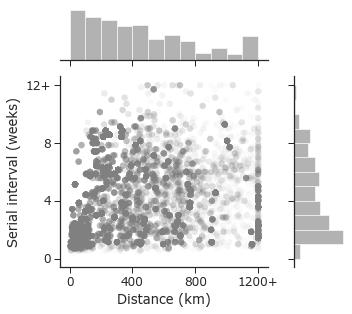

In [179]:
ystep = 400; ymx = 1200
xstep = 4; xmx = 12

number_of_sample_for_scatterplot = 25000
ydistance = [y if y<=ymx else ymx for y in res_distance[:number_of_sample_for_scatterplot]]
ySI = [y/7 if y<=xmx*7 else xmx for y in res_SI[:number_of_sample_for_scatterplot]]

hist_plot = sns.JointGrid(ydistance, ySI, ratio=3)
hist_plot = hist_plot.plot_joint(plt.scatter, color=clr0, s=40, edgecolor='none', alpha=.03)
hist_plot.ax_marg_y.hist(ySI, color=clr0, alpha=.6,
                      orientation="horizontal", #edgecolor='k',
                      bins=np.arange(0, xmx+xstep/4, xstep/4))
hist_plot.ax_marg_x.hist(ydistance, color=clr0, alpha=.6, #edgecolor='k',
                      bins=np.arange(0, ymx+ystep/4, ystep/4))

hist_plot.set_axis_labels('Distance (km)', 'Serial interval (weeks)')

tks_distance = np.arange(0,ymx+ystep,ystep)
hist_plot.ax_joint.set_xticks(tks_distance);
hist_plot.ax_marg_x.set_xticks(tks_distance);
hist_plot.ax_joint.set_xticklabels([tklb if idx else str(tklb)+"+" for idx,tklb in enumerate(tks_distance[::-1])][::-1])
tks_SI = np.arange(0,xmx+xstep,xstep)
hist_plot.ax_joint.set_yticks(tks_SI);
hist_plot.ax_joint.set_yticklabels([tklb if idx else str(tklb)+"+" for idx,tklb in enumerate(tks_SI[::-1])][::-1])

fig = plt.gcf()
fig.set_size_inches(5,4.6)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig("../../figures/draft/FigExponential-scatter.pdf",format='pdf',bbox_inches='tight')

R[write to console]: Loading required package: mapproj

R[write to console]: Regions defined for each Polygons



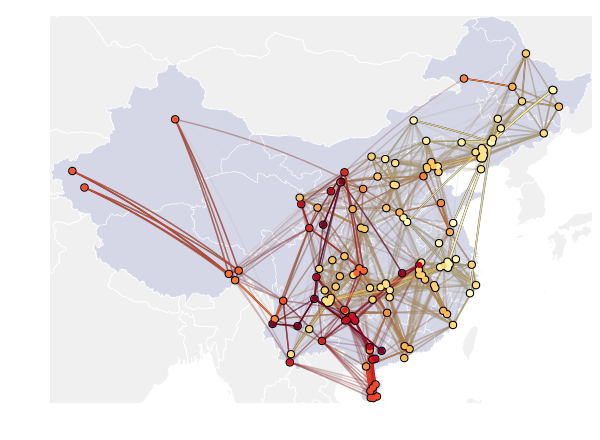

In [180]:
%%R -w 600 -h 440 -r 100 -i Df_cut -i prob -i clr_background_China
lbrs = c("RColorBrewer","geosphere","ggplot2","dplyr","magrittr","tidyr","ggmap","glue","lubridate", 
         "rnaturalearth","rnaturalearthdata")

for(x in lbrs) { library(x,character.only=TRUE,warn.conflicts=FALSE) }
require("raster"); require("mapproj")
'%&%' <- function(x,y)paste0(x,y)
theme_set(theme_minimal(base_size=11)) 
remove_axes = theme(axis.text = element_blank(),axis.line = element_blank(),axis.ticks = element_blank(),
                    panel.border = element_blank(),panel.grid = element_blank(),axis.title = element_blank())
raster::getData("GADM",country="CHN",level = 1) %>% fortify -> chn_map

Df_cut %>% mutate(start = as.Date(start,"%Y-%m-%d",origin = lubridate::origin)) -> df

world = ne_countries(scale = "medium", returnclass = "sf")

chn_long_minmax = c(chn_map$long %>% min, chn_map$long %>% max)
chn_lat_minmax = c(chn_map$lat %>% min, chn_map$lat %>% max)

chn_map %>% 
    ggplot() +
        geom_sf(data = world, size=.3, color="white", fill="#f0f0f0") +
        geom_map(map = chn_map, aes(group = group, map_id = id), fill = clr_background_China, alpha = .5, 
                 color="white", lwd = .15) +
        expand_limits(x = chn_map$long, y = chn_map$lat) +
        coord_sf(xlim = c(chn_long_minmax), ylim = c(chn_lat_minmax), expand=F) +
        remove_axes -> p

npoints = 15
idx = 1
for (infectee in 1:dim(prob)[1]) {
    point_dest = df[infectee,c('long','lat')]
    for (potential_infector in 1:dim(prob)[2]) {
        probability_of_transmission = prob[infectee,potential_infector]
        if (probability_of_transmission>0.01) {
            point_origin = df[potential_infector,c('long','lat')]
            if (!((point_origin[1] %>% is.na) | (point_origin[2] %>% is.na) | ((point_origin[1]==point_dest[1]) & (point_origin[2]==point_dest[2])))) {
                gcIntermediate(point_origin, point_dest, n=npoints, addStartEnd=TRUE) %>% as.data.frame %>% 
                    mutate(prob = probability_of_transmission, index = idx, 
                           infectee_start=df[infectee,]$start) -> inter_
                if (idx==1)
                    inter = inter_
                else 
                    inter %<>% rbind(inter_)
                idx = idx + 1
            }
        }
    }
}
p = p + geom_line(data=inter, aes(x=lon, y=lat, group=index, alpha=prob**.5, size=prob), lwd=.5) +
    geom_line(data=inter, aes(x=lon, y=lat, group=index, alpha=prob**.5, size=prob,
                                  colour=infectee_start), lwd=.4) +
    scale_alpha_continuous(guide = F, range = c(0, 1)) +
    scale_size_continuous(guide = F, range = c(0, .5))  

brks_max = as.Date('20191201',"%Y%m%d")
brks_min = as.Date('20180731',"%Y%m%d")

p = p +         
    geom_point(data = arrange(df,desc(start)), aes(x = long, y = lat), color='black', size=2, stroke = .65, fill=NA, shape=21) +
    geom_point(data = arrange(df,start), aes(x = long, y = lat, color = start), size=1.4, shape=19) +
    scale_color_gradientn(colors = c(brewer.pal(9,"YlOrRd"),rep(brewer.pal(9,"YlOrRd")[9],2)),
                          limits = c(brks_min, max(c(max(df$start), brks_max))), 
                          trans = "date", 
                          guide = F) +
    remove_axes +
    theme(panel.grid.major = element_line(color = "white"), axis.text = element_text(color = "white"))

ggsave(plot=p,width=6,height=4.4,filename="../../figures/draft/FigExponential-map.pdf",useDingbats=FALSE)

p

In [181]:
%%capture
%%bash
type=Exponential
filename=Fig${type}
pdflatex <<TeXScript
\documentclass{standalone}
\usepackage{tikz,graphicx}
\usepackage[T1]{fontenc}

\begin{document}
\begin{tikzpicture}
    \node[anchor=north east,scale=1.35] at (-1.1in,-.2in) {\includegraphics{../../figures/draft/Fig${type}-map.pdf}};
    \node[anchor=north west] at (-1in,-2.15in) {\includegraphics{../../figures/draft/Fig${type}-Rt.pdf}};
    \node[anchor=north west,scale=.95] at (.32in,0in) {\includegraphics{../../figures/draft/Fig${type}-scatter.pdf}};
    \node[anchor=north east,scale=.95] at (-6.9in,-4.25in) {\includegraphics{../../figures/draft/Fig${type}-distr.pdf}};
\end{tikzpicture}
\end{document}
TeXScript
mv texput.pdf ../../figures/${filename}.pdf
rm texput.*
pdftoppm -png ../../figures/${filename}.pdf .output
mv .output-1.png ../../figures/pngs/${filename}.png

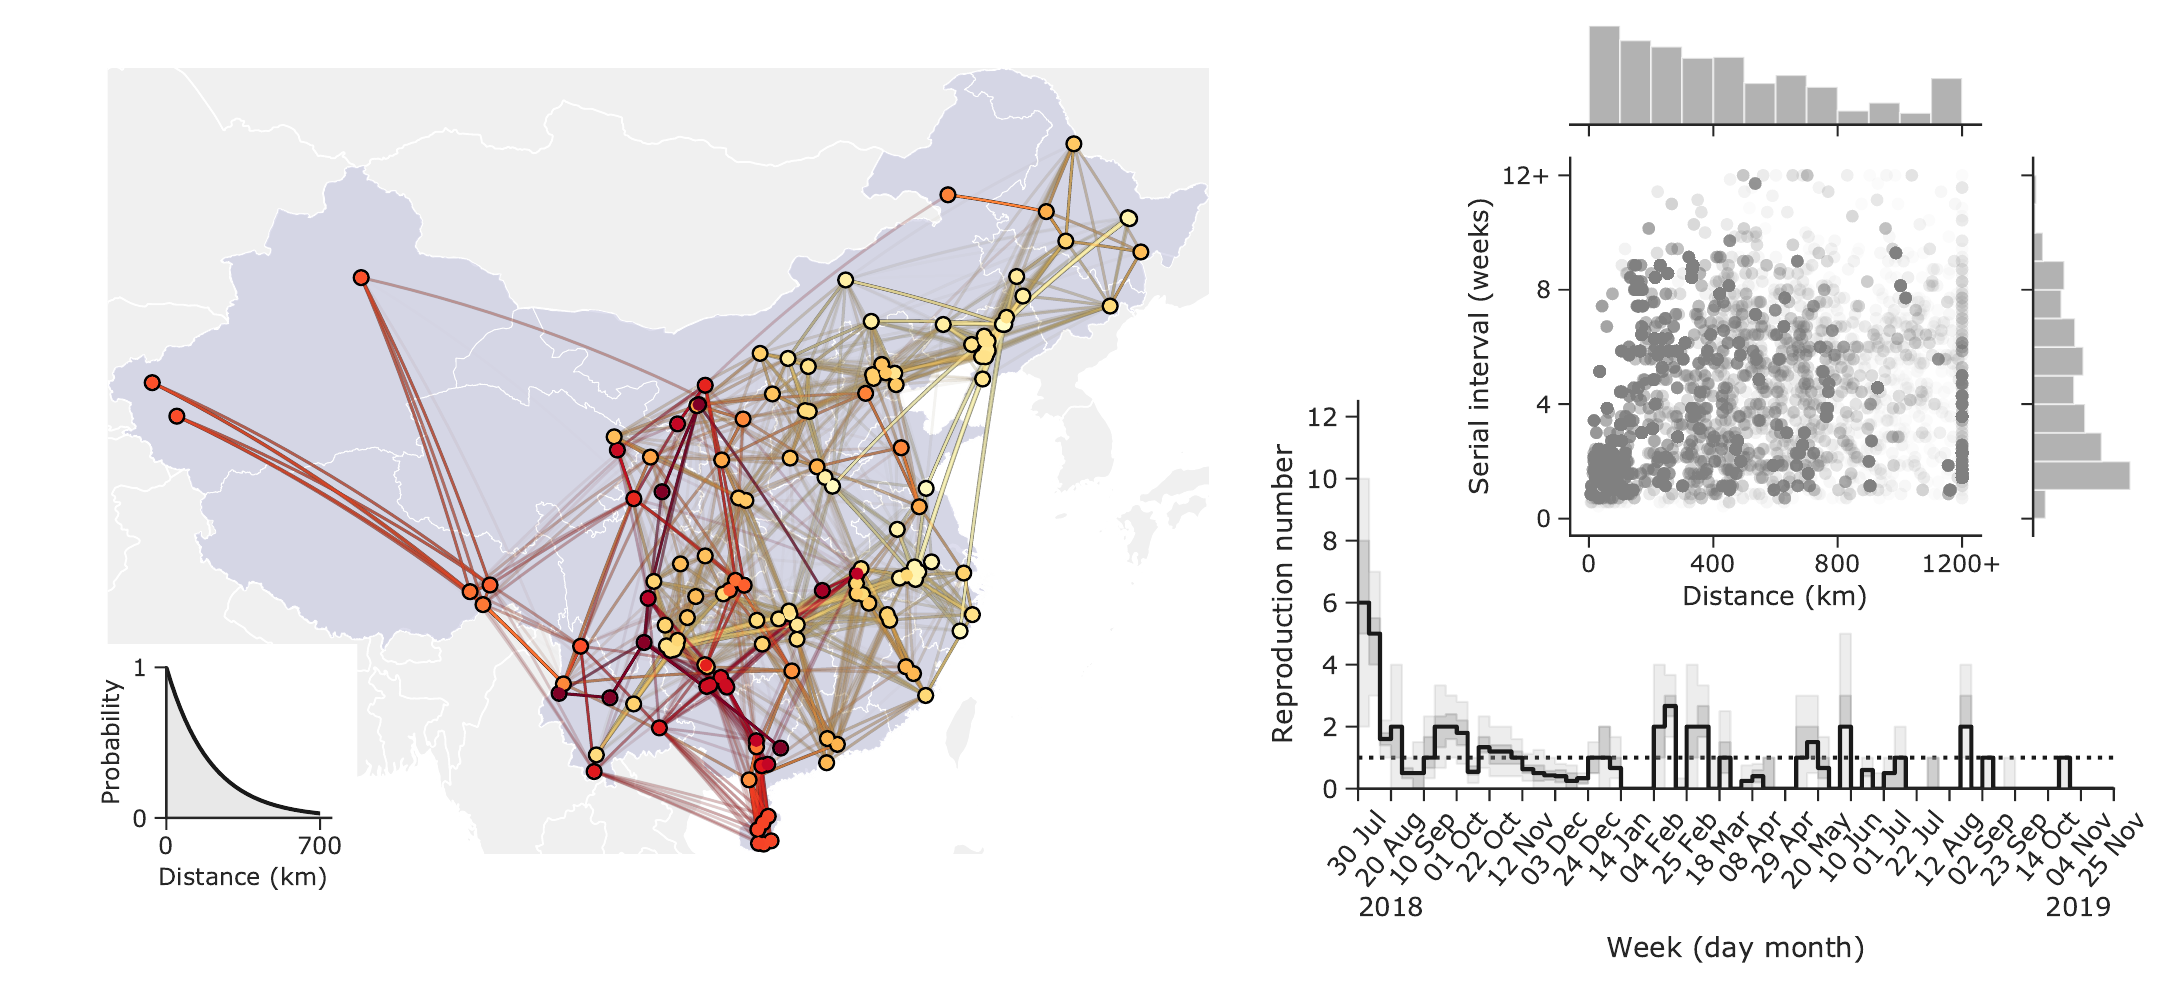

In [182]:
locale.setlocale(locale.LC_ALL,'en_US.utf8')
display(Image("../../figures/pngs/FigExponential.png", width="75%"))

### Network

/home/aakhmetz/anaconda/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


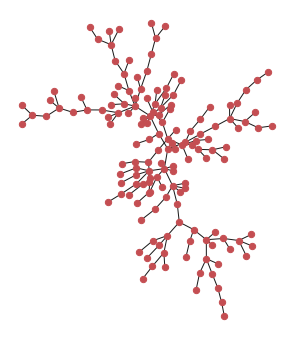

In [183]:
G_exponential = nx.Graph()
G_exponential.add_edges_from([(x,y) for x,y in enumerate(trace['connectivity'][0]) if y>=0])

fig, ax = plt.subplots(figsize=(5, 6))
nx.draw(G_exponential,pos=nx.kamada_kawai_layout(G_exponential),ax=ax,node_size=40,node_color='C3');

### Connectivity

In [184]:
notlinked = []
for idx in range(nsamples):
    Y = [Df.loc[infectee_number,'start_week'] for infectee_number,infector_number in enumerate(trace['connectivity'][idx]) if infector_number>0]
    notlinked = np.append(notlinked,[noutbreaks-sum([y[-1] for y in getCounts(Y)])])
notlinked[:5]
print("Statistics for not linked outbreaks")
print(np.r_[min(notlinked),max(notlinked),ss.scoreatpercentile(notlinked,[2.5,25,50,75,97.5]),np.mean(notlinked),np.std(notlinked)])

Statistics for not linked outbreaks
[ 3.         17.          5.          7.          8.          9.
 12.          8.205       1.92067046]


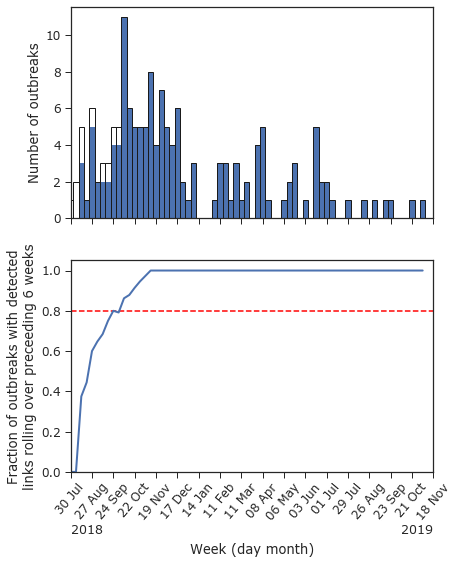

In [185]:
fig, axs = plt.subplots(2,1,sharex=True)
fig.set_size_inches(6.5,9.5);

Yall = Df.loc[:,'start_week']
Y = [Df.loc[infectee_number,'start_week'] for infectee_number,infector_number in enumerate(trace['connectivity'][0]) if infector_number>0]
Y = getCounts(Y); Yall = getCounts(Yall);

ax = axs[0]
ax.bar([y[0] for y in Y], [y[1] for y in Y], edgecolor='none',facecolor='C0',width=1,label='with determined links');
ax.bar([y[0] for y in Yall], [y[1] for y in Yall], edgecolor='k',facecolor='none',width=1, 
       label='all reported')

step = 4
xtks = np.arange(0,np.max(Yall)+step,step)
xtkslabels = [x.strftime("%d %b") for x in [week_date0+np.timedelta64(x,'W') for x in xtks]]
ax.set_xticks(xtks)
ax.set_xticklabels(xtkslabels)
ax.set_xlabel('Week (starting day of the week)')
ax.set_ylabel('Number of outbreaks')

ax = axs[1]

dfY = pd.DataFrame(Yall,columns=['start_week','all']).\
    merge(pd.DataFrame(Y,columns=['start_week','reported']),on='start_week',how='left').fillna(0)
dfY['reported_fraction'] = dfY.reported/dfY['all']
rolling_period = 6
dfY['all_sum_over_last_X'] =  dfY['all'].rolling(rolling_period,min_periods=1).sum()
dfY['reported_sum_over_last_X'] =  dfY['reported'].rolling(rolling_period,min_periods=1).sum()
dfY['reported_fraction_sum_over_last_X'] = dfY['reported_sum_over_last_X']/dfY['all_sum_over_last_X']

ax.plot(dfY.start_week, dfY.reported_fraction_sum_over_last_X, color='C0',lw=2);
ax.axhline(.8,color='red',ls='dashed',zorder=-5)

ax.set_xticks(xtks)
ax.set_xticklabels(xtkslabels)
ax.set_xlabel('Week (day month)',labelpad=20)
ax.set_xlim(np.min(xtks),np.max(xtks))
ax.set_ylim(0,1.05)
ax.set_ylabel('Fraction of outbreaks with detected\nlinks rolling over preceeding %d weeks'%rolling_period)
set_xlabel_annotation(ax)

fig.autofmt_xdate(rotation=50,ha='center')
plt.savefig("../../figures/draft/FigDetectedLinks_exponential.pdf",format='pdf',bbox_inches='tight')

In [186]:
dfY.loc[:,['reported','all']].aggregate(sum)

reported    143.0
all         153.0
dtype: float64

[0, 0]


Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average Loss = 642.32:   5%|▍         | 9704/200000 [00:03<01:00, 3128.01it/s] 
Convergence achieved at 9800
Interrupted at 9,799 [4%]: Average Loss = 1,135
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Δsd, Δmean]
Sampling 4 chains, 0 divergences: 100%|██████████| 60000/60000 [00:21<00:00, 2802.48draws/s]
The number of effective samples is smaller than 25% for some parameters.
/home/aakhmetz/anaconda/lib/python3.7/site-packages/pymc3/sampling.py:1109: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn("samples parameter is smaller than nchains times ndraws, some draws "
100%|██████████| 1000/1000 [02:19<00:00,  7.17it/s]


mean        sd  mc_error    hpd_2.5   hpd_97.5         n_eff  \
Δmean  53.973823  0.965215  0.005717  52.025031  55.826814  28691.583693   
Δsd    11.806079  0.719689  0.007821  10.476638  13.292454   9841.683216   

           Rhat  
Δmean  1.000044  
Δsd    1.000410

[0, 1]


Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average Loss = 642.32:   5%|▍         | 9541/200000 [00:02<00:56, 3346.63it/s] 
Convergence achieved at 9800
Interrupted at 9,799 [4%]: Average Loss = 1,135
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Δsd, Δmean]
Sampling 4 chains, 0 divergences: 100%|██████████| 60000/60000 [00:13<00:00, 4390.87draws/s]
The number of effective samples is smaller than 25% for some parameters.
100%|██████████| 1000/1000 [02:26<00:00,  6.84it/s]


mean        sd  mc_error    hpd_2.5   hpd_97.5         n_eff  \
Δmean  53.973823  0.965215  0.005717  52.025031  55.826814  28691.583693   
Δsd    11.806079  0.719689  0.007821  10.476638  13.292454   9841.683216   

           Rhat  
Δmean  1.000044  
Δsd    1.000410

[1, 0]


Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average Loss = 621.18:   5%|▌         | 10759/200000 [00:03<00:55, 3434.12it/s]
Convergence achieved at 11200
Interrupted at 11,199 [5%]: Average Loss = 1,011.2
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Δsd, Δmean]
100%|██████████| 1000/1000 [02:22<00:00,  7.02it/s]


mean        sd  mc_error    hpd_2.5   hpd_97.5         n_eff  \
Δmean  53.981857  0.965787  0.005767  52.100017  55.887244  27822.119747   
Δsd    11.823280  0.725732  0.006756  10.425311  13.273655  10867.210640   

           Rhat  
Δmean  1.000017  
Δsd    1.000030

[1, 1]


Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average Loss = 642.32:   5%|▍         | 9756/200000 [00:02<00:50, 3735.24it/s] 
Convergence achieved at 9800
Interrupted at 9,799 [4%]: Average Loss = 1,135
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Δsd, Δmean]
Sampling 4 chains, 0 divergences: 100%|██████████| 60000/60000 [00:13<00:00, 4491.74draws/s]
The number of effective samples is smaller than 25% for some parameters.
100%|██████████| 1000/1000 [02:22<00:00,  7.01it/s]


mean        sd  mc_error    hpd_2.5   hpd_97.5         n_eff  \
Δmean  53.973823  0.965215  0.005717  52.025031  55.826814  28691.583693   
Δsd    11.806079  0.719689  0.007821  10.476638  13.292454   9841.683216   

           Rhat  
Δmean  1.000044  
Δsd    1.000410

CPU times: user 11min 14s, sys: 8.37 s, total: 11min 23s
Wall time: 11min 35s


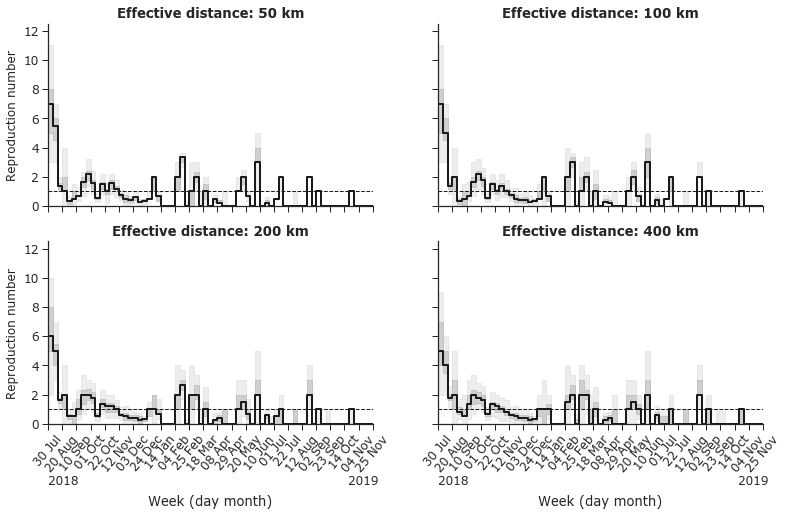

In [187]:
%%time
fig, axs = plt.subplots(2,2,sharex=True,sharey=True)
fig.set_size_inches(11.5,7.5); 
clr = 'C7'

ymx = 12.5
xtext19 = 266
xtext18 = 102

distances = [50,100,200,400]
for idx0,dbar_val in enumerate(distances):
    print([idx0//2,idx0%2])
    ax = axs[idx0//2,idx0%2]
    
    trace = makeModel(dbar_val)
    
    for idx,res_ in enumerate(trace['connectivity']):
        res_occurrences = [[key,len(list(group))] for key, group in itertools.groupby(np.sort(res_))]
        df = pd.DataFrame({'index': [x[0] for x in res_occurrences], 'n': [x[1] for x in res_occurrences]})\
            .merge(Df.reset_index().loc[:,['index','start_week']],how='right').sort_values('index').fillna(0).set_index('index')
        Rts_ = df.groupby('start_week').mean().reset_index().merge(pd.DataFrame({'start_week': np.arange(0,max(Df['start_week'])+1)}),how='right').\
            fillna(0).sort_values('start_week').n.values
        Rts = Rts_ if idx==0 else np.vstack([Rts,Rts_])

    Rts_percentiles = np.percentile(Rts,[2.5,25,50,75,97.5],axis=0).T
    
    df_Rts = pd.DataFrame(Rts_percentiles,columns=['p2.5','p25','median','p75','p97.5']).\
                reset_index().rename(columns={'index':'week'}).set_index('week')
    
    df_Rts.round(3).to_csv("csvs/RtsExponential-%d.csv"%dbar.eval())

    xmx = max(df_Rts.index)+3

    xs = df_Rts.index
    ys = df_Rts['median']
    ax.step(np.r_[xs,xs[-1:]+5],np.r_[ys,ys[-1:]],where='post',lw=2,color='k')
    ys1 = df_Rts['p2.5']; ys2 = df_Rts['p97.5']
    ax.fill_between(np.r_[xs,xs[-1:]+5],np.r_[ys1,ys1[-1:]],np.r_[ys2,ys2[-1:]],
                    step='post',color=clr,alpha=.15)
    ys1 = df_Rts['p25']; ys2 = df_Rts['p75']
    ax.fill_between(np.r_[xs,xs[-1:]+5],np.r_[ys1,ys1[-1:]],np.r_[ys2,ys2[-1:]],
                    step='post',color=clr,alpha=.3)

    xtks = [int(x) for x in np.arange(np.min(Df['start_week']),
                                      np.max(np.r_[Df['start_week'],Df['end_week'].dropna()]+4),3)]
    ax.set_xticks(xtks)
    ax.set_xticklabels([x.strftime("%d %b") for x in [week_date0+np.timedelta64(x,'W') for x in xtks]])
    ax.set_xlim(xtks[0],xtks[-1])
    ax.set_ylim(bottom=0,top=ymx)
    if(idx0//2==1): 
        ax.annotate('2019', (0,0), (300, -52), xycoords='axes fraction', 
                    textcoords='offset points', va='top', fontsize=12)
        ax.annotate('2018', (0,0), (0, -52), xycoords='axes fraction', 
                    textcoords='offset points', va='top', fontsize=12)
        ax.set_xlabel('Week (day month)',labelpad=20)
    if(idx0%2==0): 
        ax.set_ylabel('Reproduction number',size=12);
    ax.set_title(r"Effective distance: %d km"%dbar.eval(),fontweight="bold")
    ax.axhline(y=1,lw=1,color='k',linestyle='dashed',zorder=2)
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
fig.autofmt_xdate(rotation=50,ha='center')
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig("../../figures/FigExponential-Rts.pdf",format='pdf',bbox_inches='tight')

# 3. Equal probability

In [188]:
dbar.set_value(3*distance_baseline)

# distance kernel
M_distance = tt.switch(tt.lt(Distance,dbar),1,0)

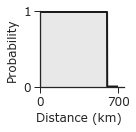

In [189]:
fig, ax = plt.subplots(1)
fig.set_size_inches(2,2); 

dbar_val = dbar.eval()
xmx0 = dbar.eval()+100; xstp0 = 100

xx = np.linspace(0,xmx0,1000)
ε_ = 0.01
yy = [1-ε_ if _<=dbar_val else ε_ for _ in xx]
ax.plot(xx,yy,c='k',lw=2)
ax.fill_between(xx,yy,color='C7',alpha=.2)

xtks = np.arange(0,xmx0+xstp0,xstp0)
ax.set_xticks([0,xmx0])
ax.set_xlim(0,xmx0)
ax.set_yticks([0,1])
ax.set_ylim(0,1)
ax.set_xlabel('Distance (km)',size=12);
ax.set_ylabel('Probability',size=12);
# ax.axvline(x=dbar_val,lw=1,color='k',linestyle='dashed',zorder=2)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_bounds(0,xmx0+50)
    
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig("../../figures/draft/FigEqual-distr.pdf",format='pdf',bbox_inches='tight')

In [190]:
trace = makeModel(dbar.eval())

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average Loss = 642.32:   5%|▍         | 9515/200000 [00:02<00:56, 3371.02it/s] 
Convergence achieved at 9800
Interrupted at 9,799 [4%]: Average Loss = 1,135
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Δsd, Δmean]
Sampling 4 chains, 0 divergences: 100%|██████████| 60000/60000 [00:13<00:00, 4565.75draws/s]
The number of effective samples is smaller than 25% for some parameters.
/home/aakhmetz/anaconda/lib/python3.7/site-packages/pymc3/sampling.py:1109: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn("samples parameter is smaller than nchains times ndraws, some draws "
100%|██████████| 1000/1000 [02:29<00:00,  6.69it/s]


mean        sd  mc_error    hpd_2.5   hpd_97.5         n_eff  \
Δmean  53.973823  0.965215  0.005717  52.025031  55.826814  28691.583693   
Δsd    11.806079  0.719689  0.007821  10.476638  13.292454   9841.683216   

           Rhat  
Δmean  1.000044  
Δsd    1.000410

In [191]:
for idx in range(noutbreaks):
    res_ = trace['connectivity'][:,idx] 
    out_ = [0]*noutbreaks
    for key, group in itertools.groupby(np.sort(res_[res_>=0])):
        out_[key] = len(list(group))/len(res_)
    
    res_occurrences = np.c_[res_occurrences,out_] if idx else out_
prob = res_occurrences.T
prob

array([[0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.433, 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.448, 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       ...,
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , ..., 0.   , 0.513, 0.   ]])

In [192]:
for idx,res_ in enumerate(trace['connectivity']):
    res_occurrences = [[key,len(list(group))] for key, group in itertools.groupby(np.sort(res_))]
    df = pd.DataFrame({'index': [x[0] for x in res_occurrences], 'n': [x[1] for x in res_occurrences]})\
        .merge(Df.reset_index().loc[:,['index','start_week']],how='right').sort_values('index').fillna(0).set_index('index')
    Rts_ = df.groupby('start_week').mean().reset_index().merge(pd.DataFrame({'start_week': np.arange(0,max(Df['start_week'])+1)}),how='right').\
        fillna(0).sort_values('start_week').n.values
    Rts = Rts_ if idx==0 else np.vstack([Rts,Rts_])

Rts_percentiles = np.percentile(Rts,[2.5,25,50,75,97.5],axis=0).T
Rts_percentiles

array([[0.        , 2.        , 3.        , 4.        , 6.        ],
       [0.5       , 1.5       , 1.5       , 2.        , 3.        ],
       [0.8       , 1.2       , 1.4       , 1.4       , 1.8       ],
       [0.        , 0.        , 1.        , 2.        , 3.        ],
       [0.        , 0.16666667, 0.33333333, 0.33333333, 0.66666667],
       [0.        , 0.5       , 0.5       , 1.        , 1.5       ],
       [1.        , 1.33333333, 2.        , 2.33333333, 3.        ],
       [0.66666667, 1.66666667, 2.        , 2.66666667, 3.66666667],
       [0.8       , 1.4       , 1.6       , 2.        , 2.6       ],
       [0.6       , 1.        , 1.4       , 1.6       , 2.2       ],
       [0.18181818, 0.36363636, 0.45454545, 0.63636364, 0.90909091],
       [0.66666667, 1.16666667, 1.33333333, 1.66666667, 2.16666667],
       [0.6       , 1.        , 1.2       , 1.6       , 2.2       ],
       [0.4       , 1.        , 1.2       , 1.6       , 2.        ],
       [0.2       , 0.6       , 0.

CPU times: user 418 ms, sys: 238 ms, total: 656 ms
Wall time: 212 ms


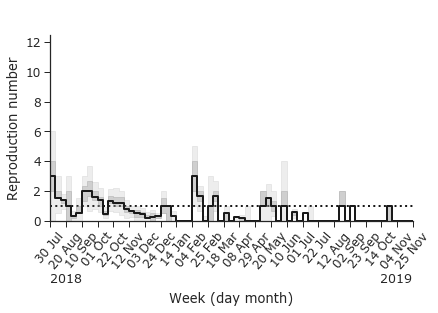

In [193]:
%%time
fig, ax = plt.subplots(1)
fig.set_size_inches(6.5,3.8);
clr = 'C7'

ymx = 12.5

df_Rts = pd.DataFrame(Rts_percentiles,columns=['p2.5','p25','median','p75','p97.5']).\
    reset_index().rename(columns={'index':'week'}).set_index('week')

xmx = max(df_Rts.index)+3

xs = df_Rts.index
ys = df_Rts['median']
ax.step(np.r_[xs,xs[-1:]+5],np.r_[ys,ys[-1:]],where='post',lw=2,color='k')
ys1 = df_Rts['p2.5']; ys2 = df_Rts['p97.5']
ax.fill_between(np.r_[xs,xs[-1:]+5],np.r_[ys1,ys1[-1:]],np.r_[ys2,ys2[-1:]],
                step='post',color=clr,alpha=.15)
ys1 = df_Rts['p25']; ys2 = df_Rts['p75']
ax.fill_between(np.r_[xs,xs[-1:]+5],np.r_[ys1,ys1[-1:]],np.r_[ys2,ys2[-1:]],
                step='post',color=clr,alpha=.3)

xtks = [int(x) for x in np.arange(np.min(Df['start_week']),
                                  np.max(np.r_[Df['start_week'],Df['end_week'].dropna()]+4),3)]
ax.set_xticks(xtks)
ax.set_xticklabels([x.strftime("%d %b") for x in [week_date0+np.timedelta64(x,'W') for x in xtks]])
ax.set_xlim(xtks[0],xtks[-1])
set_xlabel_annotation(ax)
ax.set_xlabel("Week (day month)",labelpad=20)
ax.set_ylabel("Reproduction number")
ax.set_title(r"\bf x",y=1.06,color='w')
ax.set_yticks(np.arange(0,ymx+2,2))
ax.set_ylim(bottom=0,top=ymx)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False);
fig.autofmt_xdate(rotation=50,ha='center')
ax.axhline(y=1,lw=2,color='k',linestyle=':',zorder=-2)

# plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig("../../figures/draft/FigEqual-Rt.pdf",format='pdf',dpi=300,bbox_inches='tight')

In [194]:
print("Distance")
res_distance = [[Distance.eval()[j][res_[j]] for j in range(len(res_)) if res_[j]>=0] 
                for res_ in trace['connectivity']]
res_distance = reduce(concat, res_distance)
print(np.r_[min(res_distance),max(res_distance),ss.scoreatpercentile(res_distance,[2.5,25,50,75,97.5]),np.mean(res_distance),np.std(res_distance)])

print("\nSerial interval")
res_SI = [[(Df.loc[j,'t'].item()-Df.loc[res_[j],'t'].item()) for j in range(len(res_)) if res_[j]>=0] 
          for res_ in trace['connectivity']]
res_SI= reduce(concat, res_SI)
print(np.r_[min(res_SI),max(res_SI),ss.scoreatpercentile(res_SI,[2.5,25,50,75,97.5]),np.mean(res_SI),np.std(res_SI)])

Distance
[  5.69326486 599.22453955  22.920077   204.99131091 380.14186782
 491.55664827 595.00068437 346.20900444 174.69317277]

Serial interval
[  3.         110.           6.          14.          26.
  43.          64.          29.80634374  18.01870195]


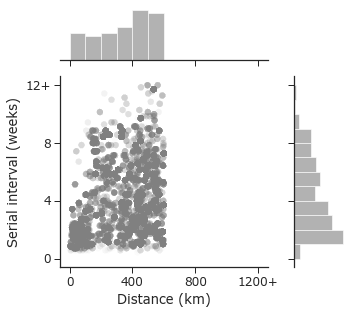

In [195]:
ystep = 400; ymx = 1200
xstep = 4; xmx = 12

number_of_sample_for_scatterplot = 25000
ydistance = [y if y<=ymx else ymx for y in res_distance[:number_of_sample_for_scatterplot]]
ySI = [y/7 if y<=xmx*7 else xmx for y in res_SI[:number_of_sample_for_scatterplot]]

hist_plot = sns.JointGrid(ydistance, ySI, ratio=3)
hist_plot = hist_plot.plot_joint(plt.scatter, color=clr0, s=40, edgecolor='none', alpha=.03)
hist_plot.ax_marg_y.hist(ySI, color=clr0, alpha=.6,
                      orientation="horizontal", #edgecolor='k',
                      bins=np.arange(0, xmx+xstep/4, xstep/4))
hist_plot.ax_marg_x.hist(ydistance, color=clr0, alpha=.6, #edgecolor='k',
                      bins=np.arange(0, ymx+ystep/4, ystep/4))

hist_plot.set_axis_labels('Distance (km)', 'Serial interval (weeks)')

tks_distance = np.arange(0,ymx+ystep,ystep)
hist_plot.ax_joint.set_xticks(tks_distance);
hist_plot.ax_marg_x.set_xticks(tks_distance);
hist_plot.ax_joint.set_xticklabels([tklb if idx else str(tklb)+"+" for idx,tklb in enumerate(tks_distance[::-1])][::-1])
tks_SI = np.arange(0,xmx+xstep,xstep)
hist_plot.ax_joint.set_yticks(tks_SI);
hist_plot.ax_joint.set_yticklabels([tklb if idx else str(tklb)+"+" for idx,tklb in enumerate(tks_SI[::-1])][::-1])

fig = plt.gcf()
fig.set_size_inches(5,4.6)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig("../../figures/draft/FigEqual-scatter.pdf",format='pdf',bbox_inches='tight')

R[write to console]: Loading required package: mapproj

R[write to console]: Regions defined for each Polygons



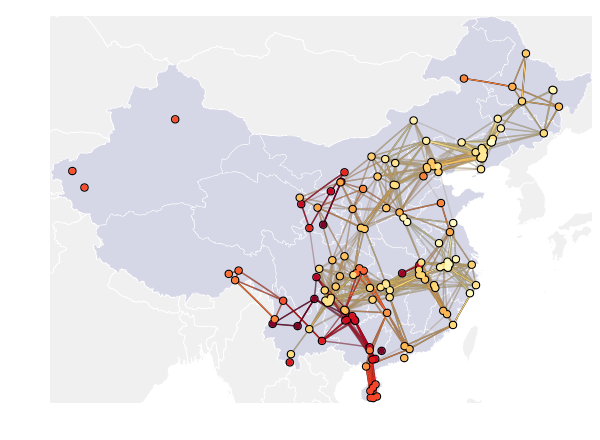

In [196]:
%%R -w 600 -h 440 -r 100 -i Df_cut -i prob -i clr_background_China
lbrs = c("RColorBrewer","geosphere","ggplot2","dplyr","magrittr","tidyr","ggmap","glue","lubridate", 
         "rnaturalearth","rnaturalearthdata")

for(x in lbrs) { library(x,character.only=TRUE,warn.conflicts=FALSE) }
require("raster"); require("mapproj")
'%&%' <- function(x,y)paste0(x,y)
theme_set(theme_minimal(base_size=11)) 
remove_axes = theme(axis.text = element_blank(),axis.line = element_blank(),axis.ticks = element_blank(),
                    panel.border = element_blank(),panel.grid = element_blank(),axis.title = element_blank())
raster::getData("GADM",country="CHN",level = 1) %>% fortify -> chn_map

Df_cut %>% mutate(start = as.Date(start,"%Y-%m-%d",origin = lubridate::origin)) -> df

world = ne_countries(scale = "medium", returnclass = "sf")

chn_long_minmax = c(chn_map$long %>% min, chn_map$long %>% max)
chn_lat_minmax = c(chn_map$lat %>% min, chn_map$lat %>% max)

chn_map %>% 
    ggplot() +
        geom_sf(data = world, size=.3, color="white", fill="#f0f0f0") +
        geom_map(map = chn_map, aes(group = group, map_id = id), fill = clr_background_China, alpha = .5, 
                 color="white", lwd = .15) +
        expand_limits(x = chn_map$long, y = chn_map$lat) +
        coord_sf(xlim = c(chn_long_minmax), ylim = c(chn_lat_minmax), expand=F) +
        remove_axes -> p

npoints = 15
idx = 1
for (infectee in 1:dim(prob)[1]) {
    point_dest = df[infectee,c('long','lat')]
    for (potential_infector in 1:dim(prob)[2]) {
        probability_of_transmission = prob[infectee,potential_infector]
        if (probability_of_transmission>0.01) {
            point_origin = df[potential_infector,c('long','lat')]
            if (!((point_origin[1] %>% is.na) | (point_origin[2] %>% is.na) | ((point_origin[1]==point_dest[1]) & (point_origin[2]==point_dest[2])))) {
                gcIntermediate(point_origin, point_dest, n=npoints, addStartEnd=TRUE) %>% as.data.frame %>% 
                    mutate(prob = probability_of_transmission, index = idx, 
                           infectee_start=df[infectee,]$start) -> inter_
                if (idx==1)
                    inter = inter_
                else 
                    inter %<>% rbind(inter_)
                idx = idx + 1
            }
        }
    }
}
p = p + geom_line(data=inter, aes(x=lon, y=lat, group=index, alpha=prob**.5, size=prob), lwd=.5) +
    geom_line(data=inter, aes(x=lon, y=lat, group=index, alpha=prob**.5, size=prob,
                                  colour=infectee_start), lwd=.4) +
    scale_alpha_continuous(guide = F, range = c(0, 1)) +
    scale_size_continuous(guide = F, range = c(0, .5))  

brks_max = as.Date('20191201',"%Y%m%d")
brks_min = as.Date('20180731',"%Y%m%d")

p = p +         
    geom_point(data = arrange(df,desc(start)), aes(x = long, y = lat), color='black', size=2, stroke = .65, fill=NA, shape=21) +
    geom_point(data = arrange(df,desc(start)), aes(x = long, y = lat, color = start), size=1.4, shape=19) +
    scale_color_gradientn(colors = c(brewer.pal(9,"YlOrRd"),rep(brewer.pal(9,"YlOrRd")[9],2)),
                          limits = c(brks_min, max(c(max(df$start), brks_max))), 
                          trans = "date", 
                          guide = F) +
    remove_axes +
    theme(panel.grid.major = element_line(color = "white"), axis.text = element_text(color = "white"))

ggsave(plot=p,width=6,height=4.4,filename="../../figures/draft/FigEqual-map.pdf",useDingbats=FALSE)

p

In [197]:
%%capture
%%bash
type=Equal
filename=Fig${type}
pdflatex <<TeXScript
\documentclass{standalone}
\usepackage{tikz,graphicx}
\usepackage[T1]{fontenc}

\begin{document}
\begin{tikzpicture}
    \node[anchor=north east,scale=1.35] at (-1.1in,-.2in) {\includegraphics{../../figures/draft/Fig${type}-map.pdf}};
    \node[anchor=north west] at (-1in,-2.15in) {\includegraphics{../../figures/draft/Fig${type}-Rt.pdf}};
    \node[anchor=north west,scale=.95] at (.32in,0in) {\includegraphics{../../figures/draft/Fig${type}-scatter.pdf}};
    \node[anchor=north east,scale=.95] at (-6.9in,-4.25in) {\includegraphics{../../figures/draft/Fig${type}-distr.pdf}};
\end{tikzpicture}
\end{document}
TeXScript
mv texput.pdf ../../figures/${filename}.pdf
rm texput.*
pdftoppm -png ../../figures/${filename}.pdf .output
mv .output-1.png ../../figures/pngs/${filename}.png

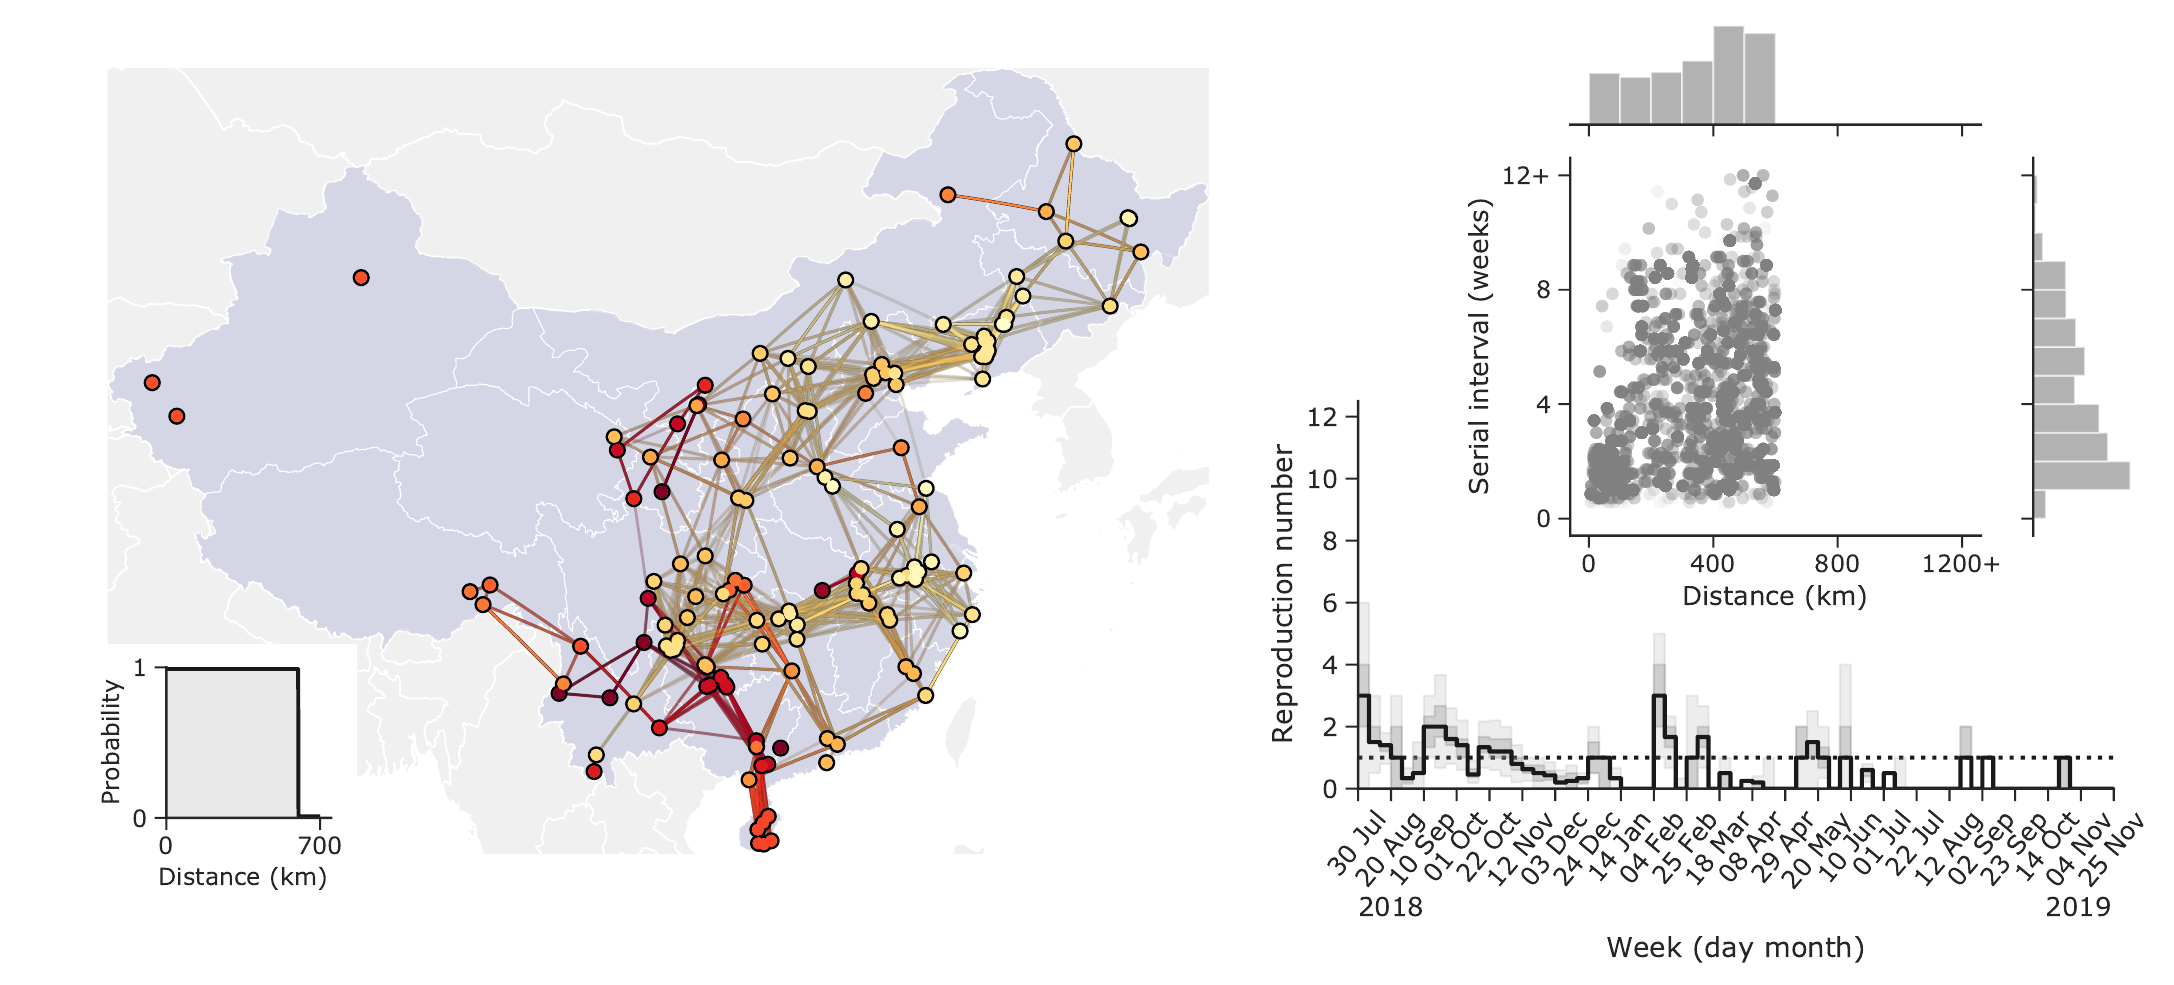

In [198]:
locale.setlocale(locale.LC_ALL, 'en_US.utf8')
display(Image("../../figures/pngs/FigEqual.png", width="75%"))

### Network

/home/aakhmetz/anaconda/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


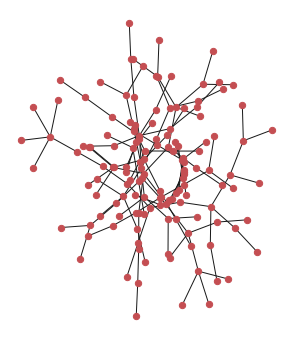

In [199]:
G_equal = nx.Graph()
G_equal.add_edges_from([(x,y) for x,y in enumerate(trace['connectivity'][0]) if y>=0])

fig, ax = plt.subplots(figsize=(5, 6))
nx.draw(G_equal,pos=nx.kamada_kawai_layout(G_equal),ax=ax,node_size=40,node_color='C3');

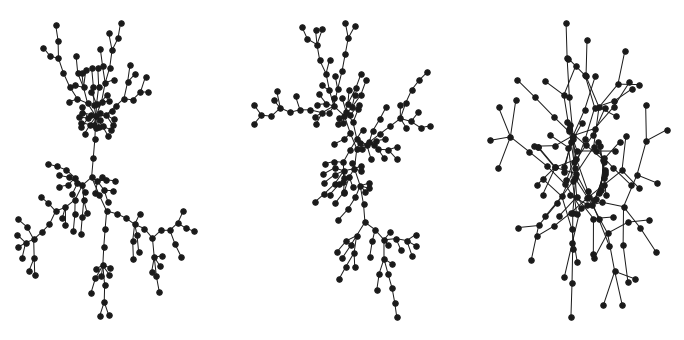

In [202]:
fig, axs = plt.subplots(1,3,figsize=(12, 6))

nd_size = 30
nd_color = "k"
nx.draw(G_minimal,pos=nx.kamada_kawai_layout(G_minimal),ax=axs[0],node_size=nd_size,node_color=nd_color);
nx.draw(G_exponential,pos=nx.kamada_kawai_layout(G_exponential),ax=axs[1],node_size=nd_size,node_color=nd_color);
nx.draw(G_equal,pos=nx.kamada_kawai_layout(G_equal),ax=axs[2],node_size=nd_size,node_color=nd_color);

plt.savefig("../../figures/draft/FigNetworkStructures.pdf",format='pdf',bbox_inches='tight')

### Connectivity

In [203]:
notlinked = []
for idx in range(nsamples):
    Y = [Df.loc[infectee_number,'start_week'] for infectee_number,infector_number in enumerate(trace['connectivity'][idx]) if infector_number>0]
    notlinked = np.append(notlinked,[noutbreaks-sum([y[-1] for y in getCounts(Y)])])
notlinked[:5]
print("Statistics for not linked outbreaks")
print(np.r_[min(notlinked),max(notlinked),ss.scoreatpercentile(notlinked,[2.5,25,50,75,97.5]),np.mean(notlinked),np.std(notlinked)])

Statistics for not linked outbreaks
[29.        38.        30.        31.        32.        33.
 35.        32.419      1.3854382]


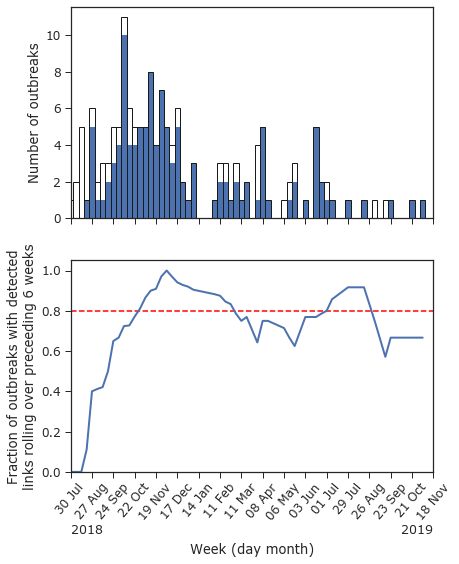

In [204]:
fig, axs = plt.subplots(2,1,sharex=True)
fig.set_size_inches(6.5,9.5);

Yall = Df.loc[:,'start_week']
Y = [Df.loc[infectee_number,'start_week'] for infectee_number,infector_number in enumerate(trace['connectivity'][0]) if infector_number>0]
Y = getCounts(Y); Yall = getCounts(Yall);

ax = axs[0]
ax.bar([y[0] for y in Y], [y[1] for y in Y], edgecolor='none',facecolor='C0',width=1,label='with determined links');
ax.bar([y[0] for y in Yall], [y[1] for y in Yall], edgecolor='k',facecolor='none',width=1, 
       label='all reported')

step = 4
xtks = np.arange(0,np.max(Yall)+step,step)
xtkslabels = [x.strftime("%d %b") for x in [week_date0+np.timedelta64(x,'W') for x in xtks]]
ax.set_xticks(xtks)
ax.set_xticklabels(xtkslabels)
ax.set_ylabel('Number of outbreaks')

ax = axs[1]

dfY = pd.DataFrame(Yall,columns=['start_week','all']).\
    merge(pd.DataFrame(Y,columns=['start_week','reported']),on='start_week',how='left').fillna(0)
dfY['reported_fraction'] = dfY.reported/dfY['all']
rolling_period = 6
dfY['all_sum_over_last_X'] =  dfY['all'].rolling(rolling_period,min_periods=1).sum()
dfY['reported_sum_over_last_X'] =  dfY['reported'].rolling(rolling_period,min_periods=1).sum()
dfY['reported_fraction_sum_over_last_X'] = dfY['reported_sum_over_last_X']/dfY['all_sum_over_last_X']

ax.plot(dfY.start_week, dfY.reported_fraction_sum_over_last_X, color='C0',lw=2);
ax.axhline(.8,color='red',ls='dashed',zorder=-5)

ax.set_xticks(xtks)
ax.set_xticklabels(xtkslabels)
ax.set_xlabel('Week (day month)',labelpad=20)
ax.set_xlim(np.min(xtks),np.max(xtks))
ax.set_ylim(0,1.05)
ax.set_ylabel('Fraction of outbreaks with detected\nlinks rolling over preceeding %d weeks'%rolling_period)
set_xlabel_annotation(ax)

fig.autofmt_xdate(rotation=50,ha='center')
plt.savefig("../../figures/draft/FigDetectedLinks_equal.pdf",format='pdf',bbox_inches='tight')

In [205]:
dfY.loc[:,['reported','all']].aggregate(sum)

reported    119.0
all         153.0
dtype: float64

[0, 0]


Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average Loss = 621.18:   6%|▌         | 11043/200000 [00:03<00:57, 3275.15it/s]
Convergence achieved at 11200
Interrupted at 11,199 [5%]: Average Loss = 1,011.2
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Δsd, Δmean]
Sampling 4 chains, 0 divergences: 100%|██████████| 60000/60000 [00:13<00:00, 4558.85draws/s]
/home/aakhmetz/anaconda/lib/python3.7/site-packages/pymc3/sampling.py:1109: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn("samples parameter is smaller than nchains times ndraws, some draws "
100%|██████████| 1000/1000 [02:11<00:00,  7.58it/s]


mean        sd  mc_error    hpd_2.5   hpd_97.5         n_eff  \
Δmean  53.981857  0.965787  0.005767  52.100017  55.887244  27822.119747   
Δsd    11.823280  0.725732  0.006756  10.425311  13.273655  10867.210640   

           Rhat  
Δmean  1.000017  
Δsd    1.000030

[0, 1]


Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average Loss = 621.18:   5%|▌         | 10723/200000 [00:01<00:33, 5631.63it/s]
Convergence achieved at 11200
Interrupted at 11,199 [5%]: Average Loss = 1,011.2
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Δsd, Δmean]
100%|██████████| 1000/1000 [01:56<00:00,  8.56it/s]


mean        sd  mc_error    hpd_2.5   hpd_97.5         n_eff  \
Δmean  53.981857  0.965787  0.005767  52.100017  55.887244  27822.119747   
Δsd    11.823280  0.725732  0.006756  10.425311  13.273655  10867.210640   

           Rhat  
Δmean  1.000017  
Δsd    1.000030

[1, 0]


Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average Loss = 621.18:   5%|▌         | 10971/200000 [00:01<00:33, 5593.48it/s]
Convergence achieved at 11200
Interrupted at 11,199 [5%]: Average Loss = 1,011.2
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Δsd, Δmean]
100%|██████████| 1000/1000 [02:11<00:00,  7.58it/s]


mean        sd  mc_error    hpd_2.5   hpd_97.5         n_eff  \
Δmean  53.981857  0.965787  0.005767  52.100017  55.887244  27822.119747   
Δsd    11.823280  0.725732  0.006756  10.425311  13.273655  10867.210640   

           Rhat  
Δmean  1.000017  
Δsd    1.000030

[1, 1]


Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average Loss = 642.32:   5%|▍         | 9621/200000 [00:01<00:36, 5155.10it/s] 
Convergence achieved at 9800
Interrupted at 9,799 [4%]: Average Loss = 1,135
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Δsd, Δmean]
Sampling 4 chains, 0 divergences: 100%|██████████| 60000/60000 [00:12<00:00, 4629.50draws/s]
The number of effective samples is smaller than 25% for some parameters.
100%|██████████| 1000/1000 [02:21<00:00,  7.08it/s]


mean        sd  mc_error    hpd_2.5   hpd_97.5         n_eff  \
Δmean  53.973823  0.965215  0.005717  52.025031  55.826814  28691.583693   
Δsd    11.806079  0.719689  0.007821  10.476638  13.292454   9841.683216   

           Rhat  
Δmean  1.000044  
Δsd    1.000410

CPU times: user 10min 19s, sys: 8.12 s, total: 10min 27s
Wall time: 10min 34s


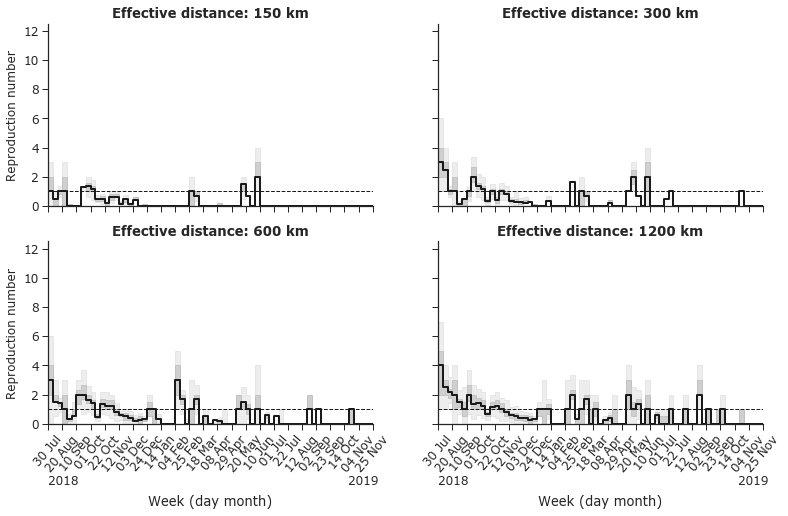

In [206]:
%%time
fig, axs = plt.subplots(2,2,sharex=True,sharey=True)
fig.set_size_inches(11.5,7.5);
clr = 'C7'

ymx = 12.5
xtext19 = 266
xtext18 = 102

for idx0,dbar_val in enumerate([3*x for x in distances]):
    print([idx0//2,idx0%2])
    ax = axs[idx0//2,idx0%2]
    
    trace = makeModel(dbar_val)

    for idx,res_ in enumerate(trace['connectivity']):
        res_occurrences = [[key,len(list(group))] for key, group in itertools.groupby(np.sort(res_))]
        df = pd.DataFrame({'index': [x[0] for x in res_occurrences], 'n': [x[1] for x in res_occurrences]})\
            .merge(Df.reset_index().loc[:,['index','start_week']],how='right').sort_values('index').fillna(0).set_index('index')
        Rts_ = df.groupby('start_week').mean().reset_index().merge(pd.DataFrame({'start_week': np.arange(0,max(Df['start_week'])+1)}),how='right').\
            fillna(0).sort_values('start_week').n.values
        Rts = Rts_ if idx==0 else np.vstack([Rts,Rts_])

    Rts_percentiles = np.percentile(Rts,[2.5,25,50,75,97.5],axis=0).T
    
    df_Rts = pd.DataFrame(Rts_percentiles,columns=['p2.5','p25','median','p75','p97.5']).\
    reset_index().rename(columns={'index':'week'}).set_index('week')
    
    df_Rts.round(3).to_csv("csvs/RtsEqual-%d.csv"%dbar.eval())

    xmx = max(df_Rts.index)+3

    xs = df_Rts.index
    ys = df_Rts['median']
    ax.step(np.r_[xs,xs[-1:]+5],np.r_[ys,ys[-1:]],where='post',lw=2,color='k')
    ys1 = df_Rts['p2.5']; ys2 = df_Rts['p97.5']
    ax.fill_between(np.r_[xs,xs[-1:]+5],np.r_[ys1,ys1[-1:]],np.r_[ys2,ys2[-1:]],
                    step='post',color=clr,alpha=.15)
    ys1 = df_Rts['p25']; ys2 = df_Rts['p75']
    ax.fill_between(np.r_[xs,xs[-1:]+5],np.r_[ys1,ys1[-1:]],np.r_[ys2,ys2[-1:]],
                    step='post',color=clr,alpha=.3)

    xtks = [int(x) for x in np.arange(np.min(Df['start_week']),
                                      np.max(np.r_[Df['start_week'],Df['end_week'].dropna()]+4),3)]
    ax.set_xticks(xtks)
    ax.set_xticklabels([x.strftime("%d %b") for x in [week_date0+np.timedelta64(x,'W') for x in xtks]])
    ax.set_xlim(xtks[0],xtks[-1])
    ax.set_ylim(bottom=0,top=ymx)
    if(idx0//2==1): 
        ax.annotate('2019', (0,0), (300, -52), xycoords='axes fraction', 
                    textcoords='offset points', va='top', fontsize=12)
        ax.annotate('2018', (0,0), (0, -52), xycoords='axes fraction', 
                    textcoords='offset points', va='top', fontsize=12)
        ax.set_xlabel('Week (day month)',labelpad=20)
    if(idx0%2==0): 
        ax.set_ylabel('Reproduction number',size=12);
    ax.set_title(r"Effective distance: %d km"%dbar_val,fontweight="bold")
    ax.axhline(y=1,lw=1,color='k',linestyle='dashed',zorder=2)
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
fig.autofmt_xdate(rotation=50,ha='center')
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig("../../figures/FigEqual-Rts.pdf",format='pdf',bbox_inches='tight')

# Final Fig2

In [207]:
%%capture
%%bash
filename=Fig2
pdflatex <<TeXScript
\documentclass{standalone}
\usepackage{tikz,graphicx,helvet}
\usepackage[T1]{fontenc}
\renewcommand{\familydefault}{\sfdefault}

\begin{document}
\begin{tikzpicture}
    \node[anchor=south west] at (0in,0in) {\includegraphics{../../figures/FigMinimal.pdf}};
    \node[anchor=north west] at (0in,.51in) {\includegraphics{../../figures/FigExponential.pdf}};
    \node[anchor=north west] at (0in,-5.4in) {\includegraphics{../../figures/FigEqual.pdf}};
    \node[anchor=north east] at (1.14in,6.08in) {\huge {\bf A}};
    \node[anchor=north east] at (1.14in,-.06in) {\huge {\bf B}};
    \node[anchor=north east] at (1.14in,-5.98in) {\huge {\bf C}};
\end{tikzpicture}
\end{document}

TeXScript
mv texput.pdf ../../figures/${filename}.pdf
rm texput.*
pdftoppm -png ../../figures/${filename}.pdf .output
mv .output-1.png ../../figures/pngs/${filename}.png

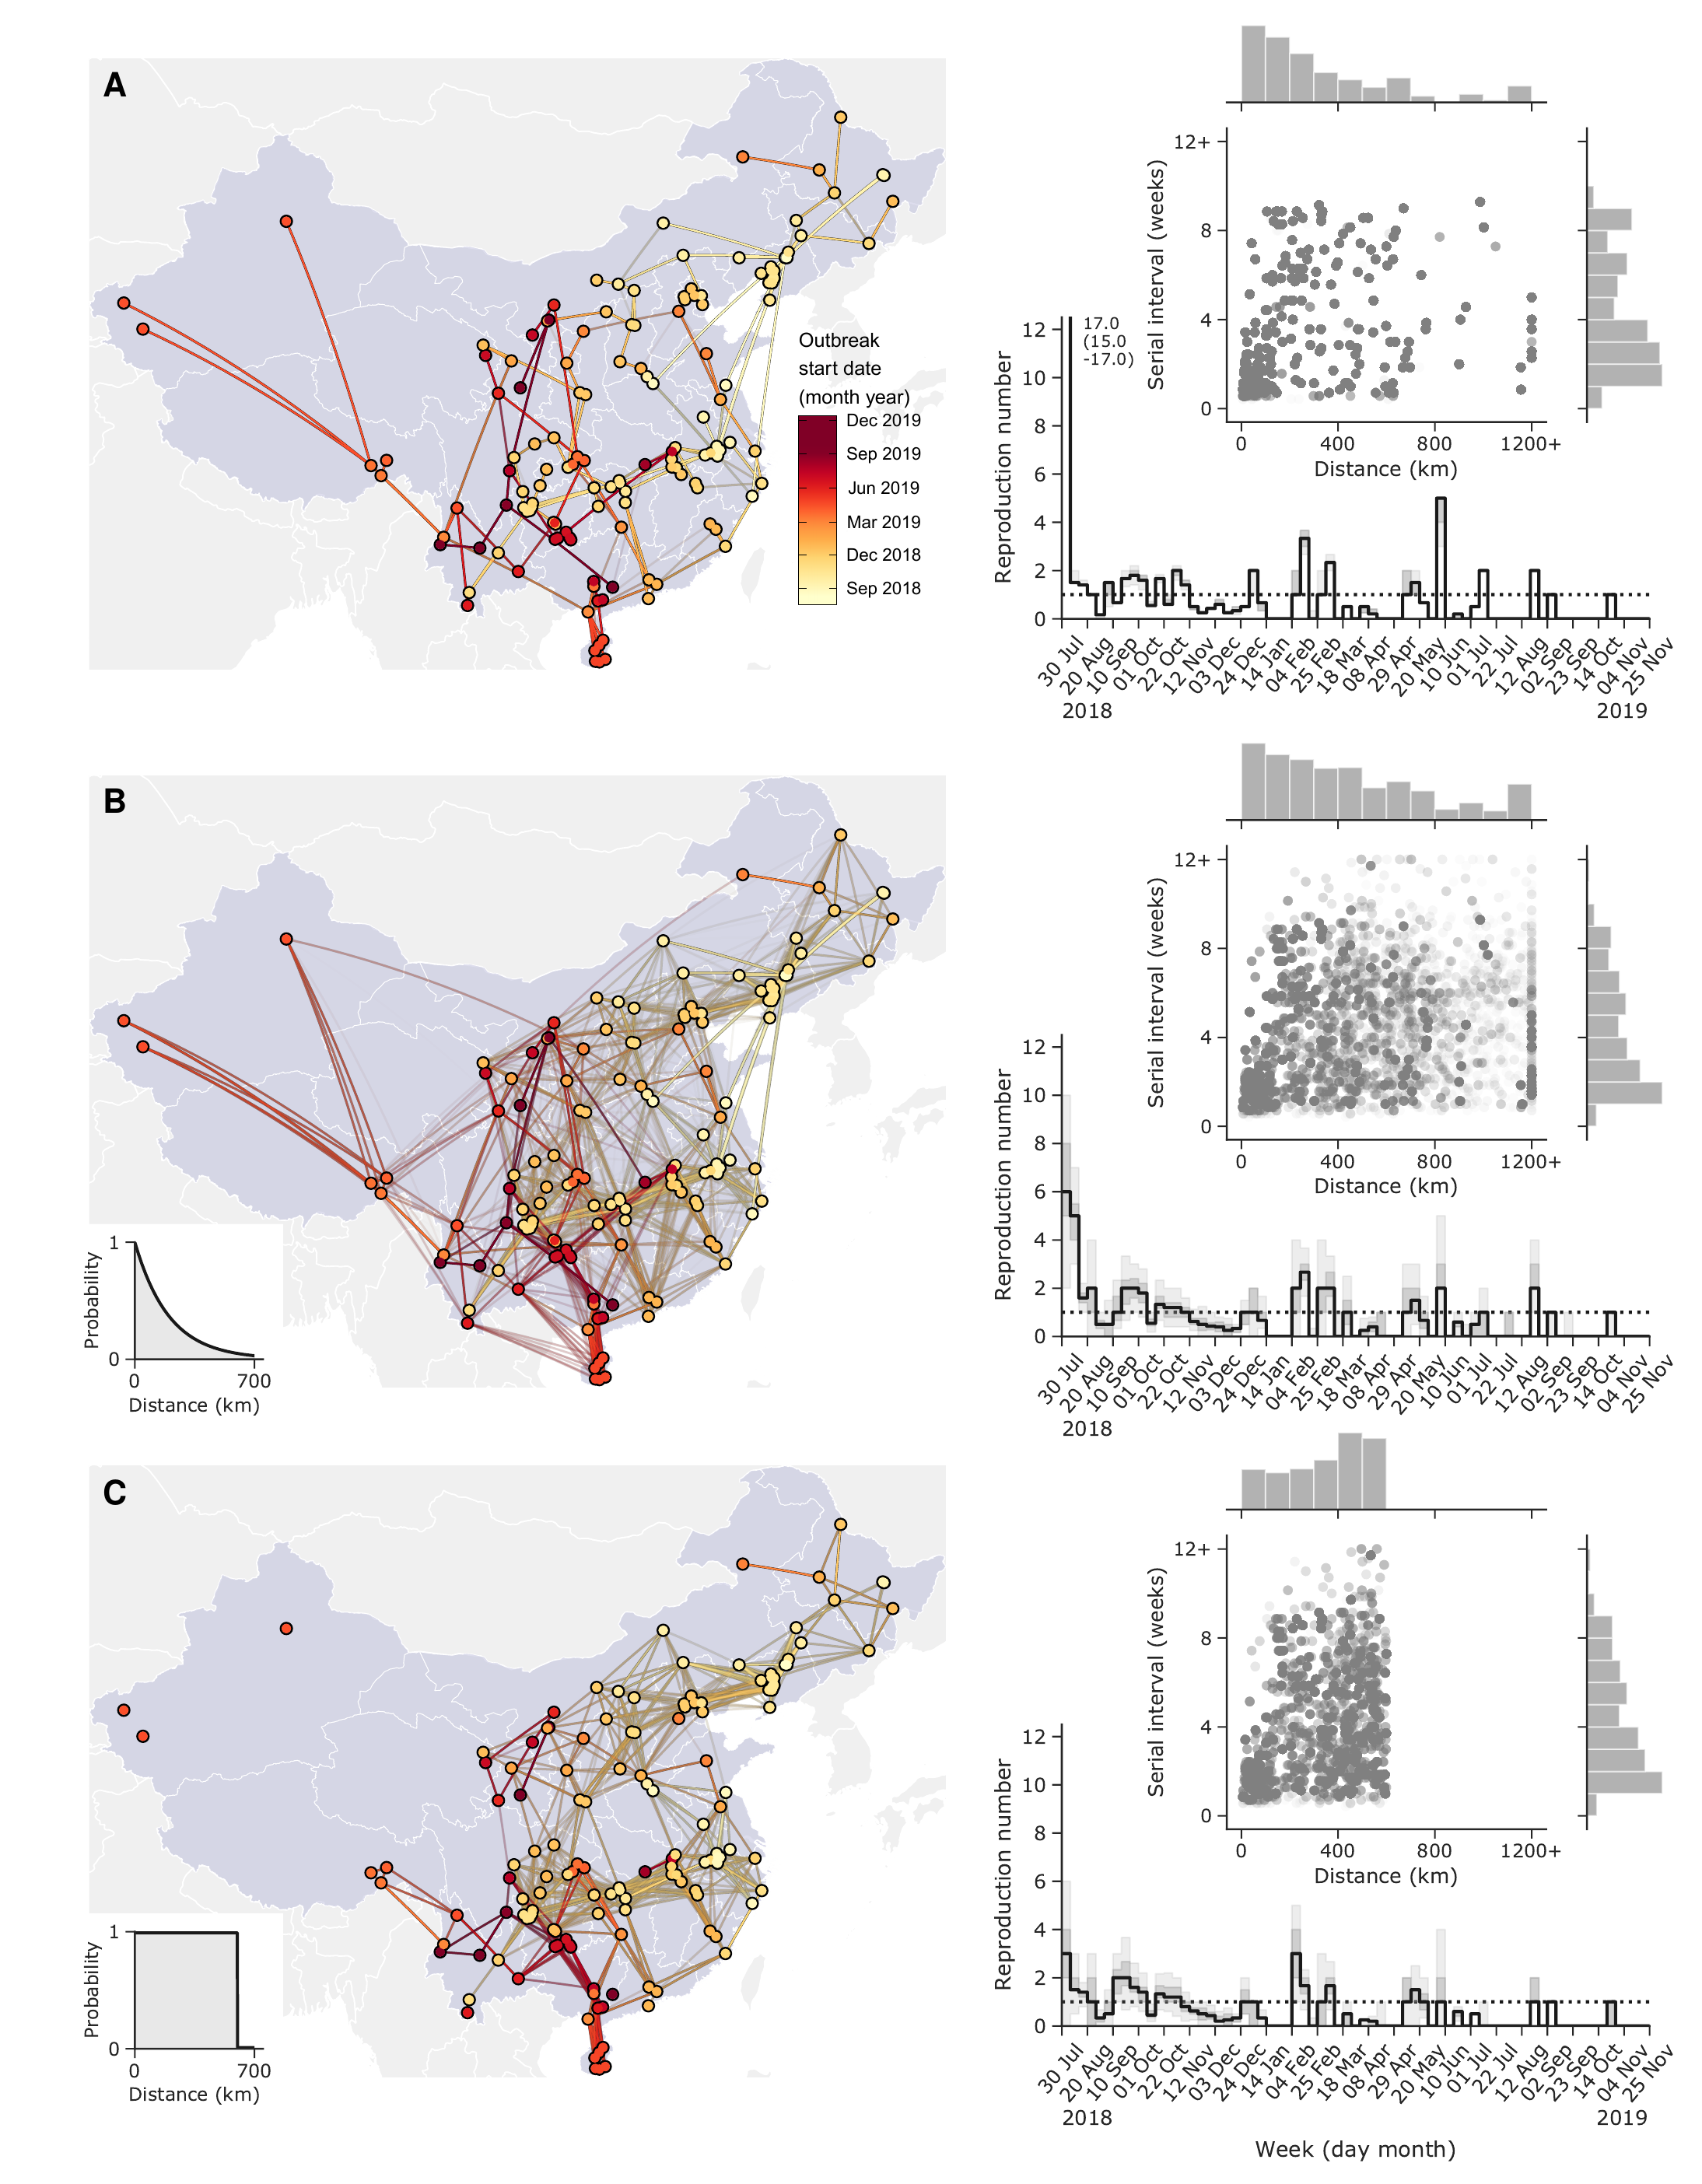

In [208]:
display(Image("../../figures/pngs/Fig2.png", width="75%"))

# Date of first arrival of ASF per province

In [234]:
Df_arrival = Df['start'].groupby(Df['province']).aggregate(min).reset_index()
Df_arrival

province      start
0            Anhui 2018-08-17
1          Beijing 2018-11-20
2        Chongking 2018-11-02
3           Fujian 2018-11-06
4            Gansu 2019-01-07
5        Guangdong 2018-12-17
6          Guangxi 2019-02-11
7          Guizhou 2018-10-14
8           Hainan 2019-04-11
9            Hebei 2019-02-22
10    Heilongjiang 2018-09-01
11           Henan 2018-08-14
12           Hubei 2018-10-30
13           Hunan 2018-09-28
14  Inner Mongolia 2018-09-12
15         Jiangsu 2018-08-15
16         Jiangxi 2018-11-07
17           Jilin 2018-09-17
18        Liaoning 2018-08-01
19         Ningxia 2019-01-11
20         Qinghai 2018-12-10
21         Shaanxi 2018-11-27
22        Shandong 2019-02-18
23        Shanghai 2018-11-15
24          Shanxi 2018-10-16
25         Sichuan 2018-11-13
26         Tianjin 2018-10-10
27           Tibet 2019-03-02
28        Xinjiang 2019-04-01
29          Yunnan 2018-10-19
30        Zhejiang 2018-08-17

In [235]:
tmax_str = '2019-12-01'
tmax = pd.to_datetime(tmax_str,format="%Y-%m-%d")
# tmax = date_today
# tmax_str = tmax.strftime("%Y-%m-%d")
tmax_str

'2019-12-01'

In [236]:
# end of the outbreak
Df['end_'] = [tmax if pd.isnull(x) else x for x in Df['end']]
Df_arrival = Df['end_'].groupby(Df['province']).aggregate(max).reset_index().rename(columns={'end_':'end'}).merge(Df_arrival,on='province')
Df = Df.drop('end_',1)

# number of affected animals
Df_arrival = Df['susceptible'].groupby(Df['province']).aggregate(sum).reset_index().rename(columns={'susceptible':'ASFhogs'}).merge(Df_arrival,on='province')
# number of affected units
Df_arrival = Df['t'].groupby(Df['province']).aggregate(len).reset_index().rename(columns={'t':'ASFunits'}).merge(Df_arrival,on='province')

Df_arrival

province  ASFunits  ASFhogs        end      start
0            Anhui         9  12965.0 2018-12-23 2018-08-17
1          Beijing         4  53054.0 2019-01-21 2018-11-20
2        Chongking         3    423.0 2019-05-04 2018-11-02
3           Fujian         3  22247.0 2019-02-07 2018-11-06
4            Gansu         3    586.0 2019-12-01 2019-01-07
5        Guangdong         3   6167.0 2019-02-06 2018-12-17
6          Guangxi         6  27739.0 2019-12-01 2019-02-11
7          Guizhou        10   1895.0 2019-08-15 2018-10-14
8           Hainan         6   1238.0 2019-05-24 2019-04-11
9            Hebei         1   5600.0 2019-04-12 2019-02-22
10    Heilongjiang         6  75303.0 2019-02-26 2018-09-01
11           Henan         2   3893.0 2018-10-31 2018-08-14
12           Hubei         8   2159.0 2019-09-12 2018-10-30
13           Hunan         8  18678.0 2019-03-23 2018-09-28
14  Inner Mongolia         6   1232.0 2019-05-24 2018-09-12
15         Jiangsu         3  83752.0 2019-02-28 2018-08-15
16         Jiangxi         3    463.0 2019-01-10 2018-11-07
17           Jilin         3   1458.0 2018-12-20 2018-09-17
18        Liaoning        20  73537.0 2018-12-04 2018-08-01
19         Ningxia         4    465.0 2019-10-24 2019-01-11
20         Qinghai         2    397.0 2019-08-15 2018-12-10
21         Shaanxi         4  16198.0 2019-04-14 2018-11-27
22        Shandong         1   4504.0 2019-04-04 2019-02-18
23        Shanghai         1    314.0 2019-01-04 2018-11-15
24          Shanxi         5  37477.0 2019-02-13 2018-10-16
25         Sichuan         7  27351.0 2019-09-04 2018-11-13
26         Tianjin         2   1000.0 2019-01-12 2018-10-10
27           Tibet         3   5750.0 2019-05-28 2019-03-02
28        Xinjiang         3   1124.0 2019-06-01 2019-04-01
29          Yunnan        12   3920.0 2019-12-01 2018-10-19
30        Zhejiang         2   4144.0 2018-12-04 2018-08-17

R[write to console]: Loading required package: mapproj



 [1] "Anhui"          "Beijing"        "Chongqing"      "Fujian"        
 [5] "Gansu"          "Guangdong"      "Guangxi"        "Guizhou"       
 [9] "Hainan"         "Hebei"          "Heilongjiang"   "Henan"         
[13] "Hubei"          "Hunan"          "Jiangsu"        "Jiangxi"       
[17] "Jilin"          "Liaoning"       "Nei Mongol"     "Ningxia Hui"   
[21] "Qinghai"        "Shaanxi"        "Shandong"       "Shanghai"      
[25] "Shanxi"         "Sichuan"        "Tianjin"        "Xinjiang Uygur"
[29] "Xizang"         "Yunnan"         "Zhejiang"      


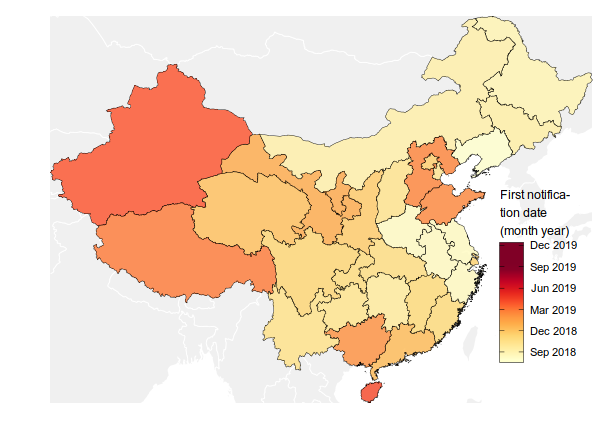

In [237]:
%%R -w 600 -h 440 -r 100 -i Df_arrival -i tmax_str
lbrs = c("RColorBrewer","geosphere","ggplot2","dplyr","magrittr","tidyr","ggmap","glue","lubridate", 
         "rnaturalearth","rnaturalearthdata")

for(x in lbrs) { library(x,character.only=TRUE,warn.conflicts=FALSE) }
require("raster"); require("mapproj")
'%&%' <- function(x,y)paste0(x,y)
theme_set(theme_minimal(base_size=11)) 
remove_axes = theme(axis.text = element_blank(),axis.line = element_blank(),axis.ticks = element_blank(),
                    panel.border = element_blank(),panel.grid = element_blank(),axis.title = element_blank())
raster::getData("GADM",country="CHN",level = 1) %>% fortify(region="NAME_1") -> chn_map
print(chn_map$id %>% unique)

tmax = as.Date(tmax_str,"%Y-%m-%d",origin = lubridate::origin)

Df_arrival %>% mutate(start = as.Date(start,"%Y-%m-%d",origin = lubridate::origin)) -> df
df[df['province']=='Inner Mongolia','province'] = 'Nei Mongol'
df[df['province']=='Chongking','province'] = 'Chongqing'
df[df['province']=='Xinjiang','province'] = 'Xinjiang Uygur'
df[df['province']=='Ningxia','province'] = 'Ningxia Hui'
df[df['province']=='Tibet','province'] = 'Xizang'
df %<>% rename(`id`=`province`)

world = ne_countries(scale = "medium", returnclass = "sf")

chn_long_minmax = c(chn_map$long %>% min, chn_map$long %>% max)
chn_lat_minmax = c(chn_map$lat %>% min, chn_map$lat %>% max)

chn_map %>% 
    ggplot() +
        geom_sf(data = world, size=.3, color="white", fill="#f0f0f0") +
        geom_map(map = chn_map, data=left_join(chn_map,df,by='id'),
                 aes(map_id = id, fill = start), alpha = .8, 
                 color="black", lwd = .15) +
        expand_limits(x = chn_map$long, y = chn_map$lat) +
        coord_sf(xlim = c(chn_long_minmax), ylim = c(chn_lat_minmax), expand=F) +
        remove_axes -> p

brks = as.Date(c('20180901','20181201','20190301','20190601','20190901','20191201'),"%Y%m%d")
brks_max = as.Date('20191201',"%Y%m%d")
brks_min = as.Date('20180731',"%Y%m%d")
brks_lbls = c('Sep 2018','Dec 2018','Mar 2019','Jun 2019','Sep 2019','Dec 2019')

p = p +         
    scale_fill_gradientn(colors = c(brewer.pal(9,"YlOrRd"),rep(brewer.pal(9,"YlOrRd")[9],2)),
                          breaks = brks,
                          labels = brks_lbls,
                          limits = c(brks_min, max(c(max(df$start),tmax))),
                          name = "First notifica-\ntion date\n(month year)", 
                          trans = "date", 
                          guide = guide_colourbar(title.position='top',direction = "vertical",
                                                  frame.colour = "black", ticks.colour = "black",
                                                  title.theme = element_text(size = 9),
                                                  label.theme = element_text(size = 8, hjust = 0.5))) +
    theme(legend.position = c(.9, .33)) + 
    remove_axes +
    theme(panel.grid.major = element_line(color = "white"), axis.text = element_text(color = "white"))

ggsave(plot=p,width=6,height=4.4,filename="../../figures/draft/FigArrival_map.pdf",useDingbats=FALSE)

p

R[write to console]: Loading required package: mapproj



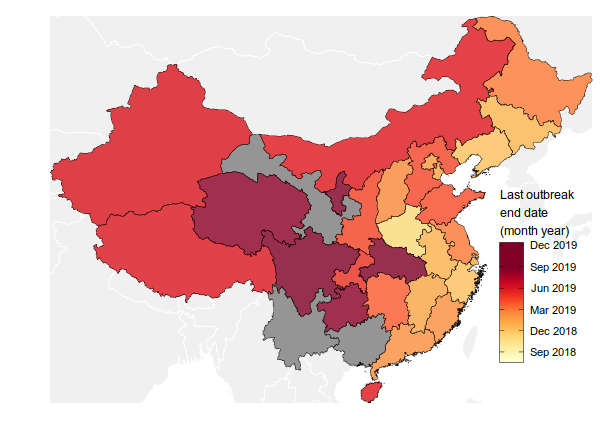

In [238]:
%%R -w 600 -h 440 -r 100 -i Df_arrival
lbrs = c("RColorBrewer","geosphere","ggplot2","dplyr","magrittr","tidyr","ggmap","glue","lubridate", 
         "rnaturalearth","rnaturalearthdata")

for(x in lbrs) { library(x,character.only=TRUE,warn.conflicts=FALSE) }
require("raster"); require("mapproj")
'%&%' <- function(x,y)paste0(x,y)
theme_set(theme_minimal(base_size=11)) 
remove_axes = theme(axis.text = element_blank(),axis.line = element_blank(),axis.ticks = element_blank(),
                    panel.border = element_blank(),panel.grid = element_blank(),axis.title = element_blank())
raster::getData("GADM",country="CHN",level = 1) %>% fortify(region="NAME_1") -> chn_map

# here I add one day to end date, because the transformation by lubridate gives a previous day
# (I don't understand this)
Df_arrival %>% mutate(end = as.Date(end,"%Y-%m-%d",origin = lubridate::origin)+1) -> df
df[df['province']=='Inner Mongolia','province'] = 'Nei Mongol'
df[df['province']=='Chongking','province'] = 'Chongqing'
df[df['province']=='Xinjiang','province'] = 'Xinjiang Uygur'
df[df['province']=='Ningxia','province'] = 'Ningxia Hui'
df[df['province']=='Tibet','province'] = 'Xizang'
df %<>% rename(`id`=`province`) %>% filter(end<tmax)

world = ne_countries(scale = "medium", returnclass = "sf")

chn_long_minmax = c(chn_map$long %>% min, chn_map$long %>% max)
chn_lat_minmax = c(chn_map$lat %>% min, chn_map$lat %>% max)

chn_map %>% 
    ggplot() +
        geom_sf(data = world, size=.3, color="white", fill="#f0f0f0") +
        geom_map(map = chn_map, data=left_join(chn_map,df,by='id'),
                 aes(map_id = id, fill = end), alpha = .8, 
                 color="black", lwd = .15) +
        expand_limits(x = chn_map$long, y = chn_map$lat) +
        coord_sf(xlim = c(chn_long_minmax), ylim = c(chn_lat_minmax), expand=F) +
        remove_axes -> p

brks = as.Date(c('20180901','20181201','20190301','20190601','20190901','20191201'),"%Y%m%d")
brks_max = as.Date('20191201',"%Y%m%d")
brks_min = as.Date('20180731',"%Y%m%d")
brks_lbls = c('Sep 2018','Dec 2018','Mar 2019','Jun 2019','Sep 2019','Dec 2019')

p = p +         
    scale_fill_gradientn(colors = c(brewer.pal(9,"YlOrRd"),rep(brewer.pal(9,"YlOrRd")[9],2)),
                          breaks = brks,
                          labels = brks_lbls,
                          limits = c(brks_min, max(c(max(df$end),brks_max))),
                          name = "Last outbreak\nend date\n(month year)", 
                          trans = "date", 
                          guide = guide_colourbar(title.position='top',direction = "vertical",
                                                  frame.colour = "black", ticks.colour = "black",
                                                  title.theme = element_text(size = 9),
                                                  label.theme = element_text(size = 8, hjust = 0.5))) +
    theme(legend.position = c(.9, .33)) + 
    remove_axes +
    theme(panel.grid.major = element_line(color = "white"), axis.text = element_text(color = "white"))

ggsave(plot=p,width=6,height=4.4,filename="../../figures/draft/FigEnd_map.pdf",useDingbats=FALSE)

p

# Data from Statbook 2017

In [239]:
Df_statbook = pd.read_csv('../../data/statbook/statbook-2017.csv',sep=",")
Df_statbook

province_CHN        province  slaughtered   hogs  soybeans       area
0            四川         Sichuan        65791  43766     518.4   486100.0
1            河南           Henan        62200  43900     389.9   167000.0
2            湖南           Hunan        61163  39681     141.0   211800.0
3            山东        Shandong        51807  30403     125.0   157100.0
4            湖北           Hubei        44480  25785     238.5   185900.0
5            云南          Yunnan        37951  30292     468.4   394100.0
6            广东       Guangdong        37120  21328      40.5   179700.0
7            河北           Hebei        37853  19578      90.1   188800.0
8            广西         Guangxi        33551  22937     149.4   237600.0
9            江西         Jiangxi        31805  16213     123.3   166900.0
10           江苏         Jiangsu        28055  16403     249.7   102600.0
11           安徽           Anhui        28289  14172     658.7   139400.0
12           辽宁        Liaoning        26272  13080      85.3   148400.0
13          黑龙江    Heilongjiang        20905  14339    3982.1   454800.0
14           贵州         Guizhou        18252  15969     298.2   176200.0
15           重庆       Chongking        17511  11916     200.2    82400.0
16           吉林           Jilin        16917   9111     329.0   187400.0
17           福建          Fujian        16061   9218      36.0   123900.0
18           陕西         Shaanxi        11410   8544     189.1   205800.0
19           浙江        Zhejiang        10224   5426     108.3   101800.0
20          内蒙古  Inner Mongolia         9190   5056    1171.4  1183000.0
21           山西          Shanxi         8228   5441     238.3   156700.0
22           甘肃           Gansu         6827   5513     127.9   425800.0
23           海南          Hainan         5478   3996       5.5    35354.0
24           新疆        Xinjiang         4958   3427      42.4  1664900.0
25           天津         Tianjin         2972   1800       3.8    11917.0
26           北京         Beijing         2421   1122       2.9    16411.0
27           上海        Shanghai         1897   1112       1.5     6340.5
28           宁夏         Ningxia         1137    810      18.7    66400.0
29           青海         Qinghai         1106    827      13.2   722300.0
30           西藏           Tibet          191    423       4.7  1228400.0

R[write to console]: Loading required package: mapproj



 [1] "Anhui"          "Beijing"        "Chongqing"      "Fujian"        
 [5] "Gansu"          "Guangdong"      "Guangxi"        "Guizhou"       
 [9] "Hainan"         "Hebei"          "Heilongjiang"   "Henan"         
[13] "Hubei"          "Hunan"          "Jiangsu"        "Jiangxi"       
[17] "Jilin"          "Liaoning"       "Nei Mongol"     "Ningxia Hui"   
[21] "Qinghai"        "Shaanxi"        "Shandong"       "Shanghai"      
[25] "Shanxi"         "Sichuan"        "Tianjin"        "Xinjiang Uygur"
[29] "Xizang"         "Yunnan"         "Zhejiang"      


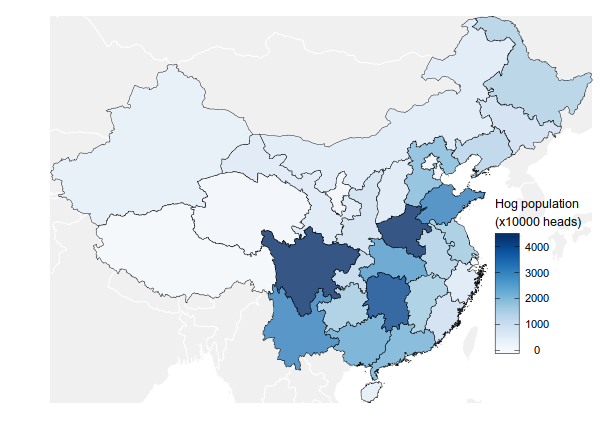

In [243]:
%%R -w 600 -h 440 -r 100 -i Df_statbook 
lbrs = c("RColorBrewer","geosphere","ggplot2","dplyr","magrittr","tidyr","ggmap","glue","lubridate", 
         "rnaturalearth","rnaturalearthdata")

for(x in lbrs) { library(x,character.only=TRUE,warn.conflicts=FALSE) }
require("raster"); require("mapproj")
'%&%' <- function(x,y)paste0(x,y)
theme_set(theme_minimal(base_size=11)) 
remove_axes = theme(axis.text = element_blank(),axis.line = element_blank(),axis.ticks = element_blank(),
                    panel.border = element_blank(),panel.grid = element_blank(),axis.title = element_blank())
raster::getData("GADM",country="CHN",level = 1) %>% fortify(region="NAME_1") -> chn_map
print(chn_map$id %>% unique)

Df_statbook %>% mutate(hogs = hogs/10) -> df # for shorthand
df[df['province']=='Inner Mongolia','province'] = 'Nei Mongol'
df[df['province']=='Chongking','province'] = 'Chongqing'
df[df['province']=='Xinjiang','province'] = 'Xinjiang Uygur'
df[df['province']=='Ningxia','province'] = 'Ningxia Hui'
df[df['province']=='Tibet','province'] = 'Xizang'
df %<>% rename(`id`=`province`)

world = ne_countries(scale = "medium", returnclass = "sf")

chn_long_minmax = c(chn_map$long %>% min, chn_map$long %>% max)
chn_lat_minmax = c(chn_map$lat %>% min, chn_map$lat %>% max)

chn_map %>% 
    ggplot() +
        geom_sf(data = world, size=.3, color="white", fill="#f0f0f0") +
        geom_map(map = chn_map, data=left_join(chn_map,df,by='id'),
                 aes(map_id = id, fill = hogs), alpha = .8, 
                 color="black", lwd = .15) +
        expand_limits(x = chn_map$long, y = chn_map$lat) +
        coord_sf(xlim = c(chn_long_minmax), ylim = c(chn_lat_minmax), expand=F) +
        remove_axes -> p

p = p +         
    scale_fill_gradientn(colors = brewer.pal(9,"Blues"),
                          limits = c(0, max(df$hogs)),
                          name = "Hog population\n(x10000 heads)", 
                          guide = guide_colourbar(title.position='top',direction = "vertical",
                                                  frame.colour = "black", ticks.colour = "black",
                                                  title.theme = element_text(size = 9),
                                                  label.theme = element_text(size = 8, hjust = 0.5))) +
    theme(legend.position = c(.9, .33)) + 
    remove_axes +
    theme(panel.grid.major = element_line(color = "white"), axis.text = element_text(color = "white"))

ggsave(plot=p,width=6,height=4.4,filename="../../figures/draft/FigHogs_map.pdf",useDingbats=FALSE)

p

In [244]:
Df_statbook = pd.merge(Df_arrival,Df_statbook,on='province')
Df_statbook[:5]

province  ASFunits  ASFhogs        end      start province_CHN  \
0      Anhui         9  12965.0 2018-12-23 2018-08-17           安徽   
1    Beijing         4  53054.0 2019-01-21 2018-11-20           北京   
2  Chongking         3    423.0 2019-05-04 2018-11-02           重庆   
3     Fujian         3  22247.0 2019-02-07 2018-11-06           福建   
4      Gansu         3    586.0 2019-12-01 2019-01-07           甘肃   

   slaughtered   hogs  soybeans      area  
0        28289  14172     658.7  139400.0  
1         2421   1122       2.9   16411.0  
2        17511  11916     200.2   82400.0  
3        16061   9218      36.0  123900.0  
4         6827   5513     127.9  425800.0

# Checking correlation

In [245]:
Df_statbook['ASFaffected'] = Df_statbook['ASFhogs']/(Df_statbook['hogs']*1000)
Df_statbook['hogs_density'] = Df_statbook['hogs']*1000/Df_statbook['area']

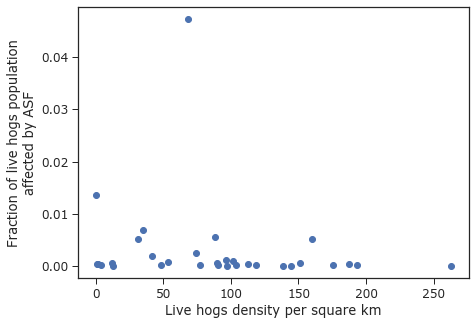

In [246]:
fig, ax = plt.subplots(figsize=(7, 5))

ax.plot(Df_statbook['hogs_density'],Df_statbook['ASFaffected'],marker='o',lw=0)

ax.set_xlabel('Live hogs density per square km')
ax.set_ylabel('Fraction of live hogs population\naffected by ASF');

## Pearson's r and P value 

In [247]:
ss.pearsonr(Df_statbook['ASFaffected'],Df_statbook['hogs_density'])

(-0.15612125946227387, 0.40164560719916903)

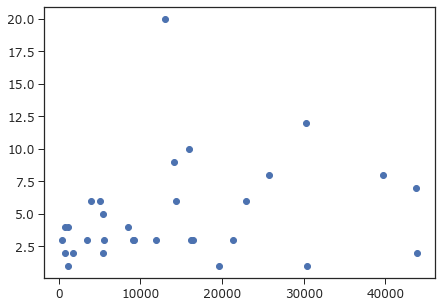

In [248]:
fig, ax = plt.subplots(figsize=(7, 5))

ax.plot(Df_statbook['hogs'],Df_statbook['ASFunits'],marker='o',lw=0)

# ax.set_xlabel('Live hogs density per square km')
# ax.set_ylabel('Fraction of live hogs population\naffected by ASF')

R[write to console]: Loading required package: mapproj



 [1] "Anhui"          "Beijing"        "Chongqing"      "Fujian"        
 [5] "Gansu"          "Guangdong"      "Guangxi"        "Guizhou"       
 [9] "Hainan"         "Hebei"          "Heilongjiang"   "Henan"         
[13] "Hubei"          "Hunan"          "Jiangsu"        "Jiangxi"       
[17] "Jilin"          "Liaoning"       "Nei Mongol"     "Ningxia Hui"   
[21] "Qinghai"        "Shaanxi"        "Shandong"       "Shanghai"      
[25] "Shanxi"         "Sichuan"        "Tianjin"        "Xinjiang Uygur"
[29] "Xizang"         "Yunnan"         "Zhejiang"      


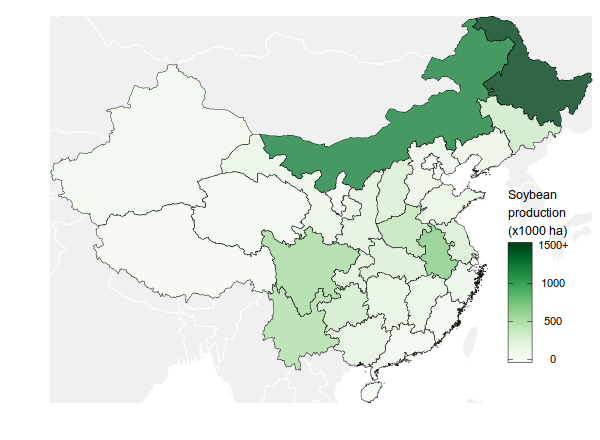

In [249]:
%%R -w 600 -h 440 -r 100 -i Df_statbook
lbrs = c("RColorBrewer","geosphere","ggplot2","dplyr","magrittr","tidyr","ggmap","glue","lubridate", 
         "rnaturalearth","rnaturalearthdata")

for(x in lbrs) { library(x,character.only=TRUE,warn.conflicts=FALSE) }
require("raster"); require("mapproj")
'%&%' <- function(x,y)paste0(x,y)
theme_set(theme_minimal(base_size=11)) 
remove_axes = theme(axis.text = element_blank(),axis.line = element_blank(),axis.ticks = element_blank(),
                    panel.border = element_blank(),panel.grid = element_blank(),axis.title = element_blank())
raster::getData("GADM",country="CHN",level = 1) %>% fortify(region="NAME_1") -> chn_map
print(chn_map$id %>% unique)

threshold = 1500
Df_statbook %>% mutate(soybeans = if_else(soybeans>=threshold,threshold,soybeans)) -> df # for shorthand
# Df_statbook %>% mutate(soybeans = .01*soybeans/area) -> df # for shorthand
df[df['province']=='Inner Mongolia','province'] = 'Nei Mongol'
df[df['province']=='Chongking','province'] = 'Chongqing'
df[df['province']=='Xinjiang','province'] = 'Xinjiang Uygur'
df[df['province']=='Ningxia','province'] = 'Ningxia Hui'
df[df['province']=='Tibet','province'] = 'Xizang'
df %<>% rename(`id`=`province`)

world = ne_countries(scale = "medium", returnclass = "sf")

chn_long_minmax = c(chn_map$long %>% min, chn_map$long %>% max)
chn_lat_minmax = c(chn_map$lat %>% min, chn_map$lat %>% max)

chn_map %>% 
    ggplot() +
        geom_sf(data = world, size=.3, color="white", fill="#f0f0f0") +
        geom_map(map = chn_map, data=left_join(chn_map,df,by='id'),
                 aes(map_id = id, fill = soybeans), alpha = .8, 
                 color="black", lwd = .15) +
        expand_limits(x = chn_map$long, y = chn_map$lat) +
        coord_sf(xlim = c(chn_long_minmax), ylim = c(chn_lat_minmax), expand=F) +
        remove_axes -> p

brks = c(0,500,1000,1500)
brks_lbls = c(0,500,1000,"1500+")

p = p +         
    scale_fill_gradientn(colors = brewer.pal(9,"Greens"),
                          limits = c(0, max(df$soybeans)),
#                           name = "Density of soybeans\ncrop fields", 
                          name = "Soybean\nproduction\n(x1000 ha)", 
                          guide = guide_colourbar(title.position='top',direction = "vertical",
                                                  frame.colour = "black", ticks.colour = "black",
                                                  title.theme = element_text(size = 9),
                                                  label.theme = element_text(size = 8, hjust = 0.5)),
                                                  breaks=brks, labels=brks_lbls) +
    theme(legend.position = c(.9, .33)) + 
    remove_axes +
    theme(panel.grid.major = element_line(color = "white"), axis.text = element_text(color = "white"))

ggsave(plot=p,width=6,height=4.4,filename="../../figures/draft/FigSoybeans_map.pdf",useDingbats=FALSE)

p

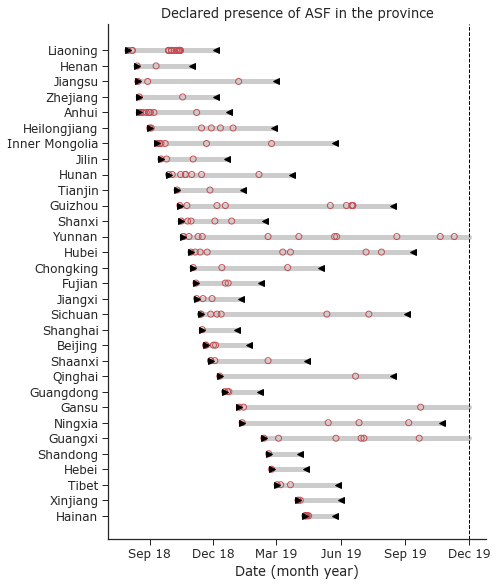

In [250]:
fig, ax = plt.subplots(figsize=(7, 8.5))
Df1__ = Df_arrival.sort_values('start',ascending=False).reset_index(drop=True)

for idx,province in enumerate(Df1__.province):
    Df__ = Df.loc[lambda d: d.province==province]
    ax.scatter(Df__['start'],[province]*len(Df__),marker='o',facecolors='none',edgecolors='r')
    ax.plot(Df1__.loc[idx,'start'],[province],marker='>',lw=0,color='black')
    if Df1__.loc[idx,'end']<tmax:
        ax.plot(Df1__.loc[idx,'end'],[province],marker='<',lw=0,color='black')
    ax.plot([Df1__.loc[idx,'start'],Df1__.loc[idx,'end']],[province]*2,alpha=.4,lw=5,zorder=-5,color='grey')
ax.axvline(tmax,zorder=-6,lw=1,color='black',ls='dashed')

xtks = [pd.to_datetime(x,format="%Y-%m-%d") for x in ['2018-09-01','2018-12-01','2019-03-01',
                                                      '2019-06-01','2019-09-01','2019-12-01']]
xtks_lbs = [x.strftime("%b %y") for x in xtks]
ax.set_xticks(xtks)
ax.set_xticklabels(xtks_lbs)
ax.set_xlabel('Date (month year)')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title("Declared presence of ASF in the province");

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig("../../figures/draft/FigArrivalEnd.pdf",format='pdf',dpi=300,bbox_inches='tight')

# Generating Fig1S2

In [251]:
%%capture
%%bash
filename=Fig1S2
pdflatex <<TeXScript
\documentclass{standalone}
\usepackage{tikz,graphicx,helvet}
\usepackage[T1]{fontenc}
\renewcommand{\familydefault}{\sfdefault}

\begin{document}
\begin{tikzpicture}
    \node[anchor=north west,scale=1.2] at (-.4in,-4.8in) {\includegraphics{../../figures/draft/FigEnd_map.pdf}};
    \node[anchor=north west,scale=1.2] at (-.4in,.2in) {\includegraphics{../../figures/draft/FigArrival_map.pdf}};
    \node[anchor=north east,scale=.9] at (0in,0in) {\includegraphics{../../figures/draft/FigArrivalEnd.pdf}};
    \node[anchor=north west] at (.3in,-.05in) {\huge {\bf B}};
    \node[anchor=north west] at (.3in,-5.07in) {\huge {\bf C}};
    \node[anchor=north east] at (-5.8in,-.05in) {\huge {\bf A}};
\end{tikzpicture}
\end{document}
TeXScript
mv texput.pdf ../../figures/${filename}.pdf
rm texput.*
pdftoppm -png ../../figures/${filename}.pdf .output
mv .output-1.png ../../figures/pngs/${filename}.png

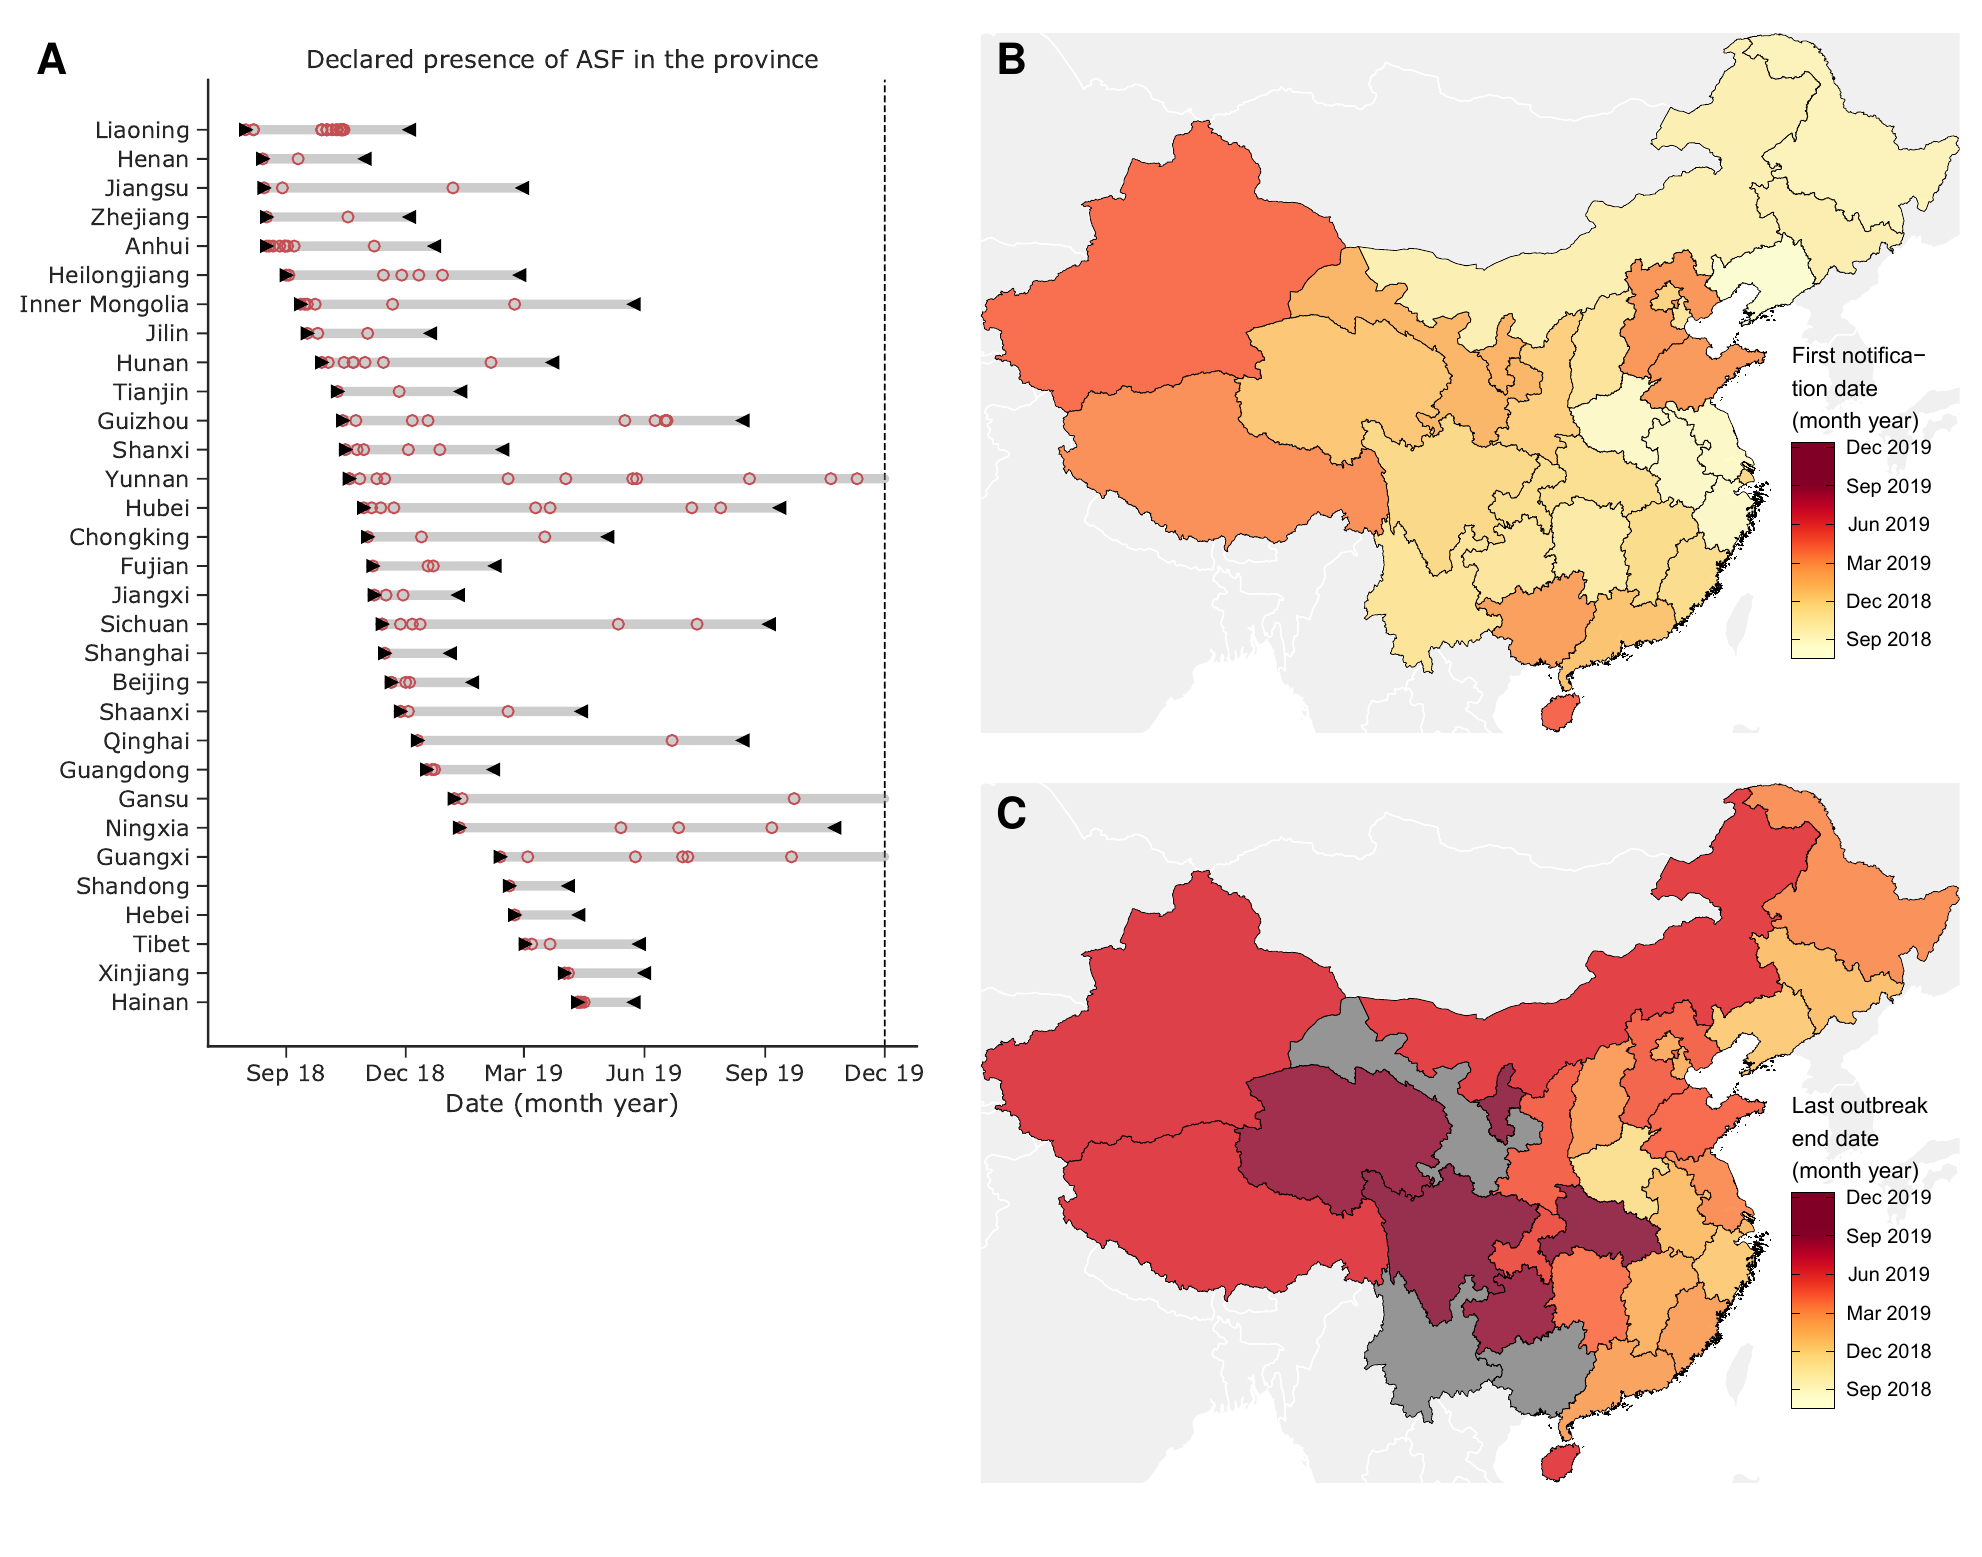

In [252]:
display(Image("../../figures/pngs/Fig1S2.png", width="75%"))

# Salje *et al.* estimation

We model serial interval by gamma distribution with given mean and st.d.

In [253]:
genmean = 7.539253*7
gensd = 1.727253*7

genμ = log(genmean/sqrt((gensd/genmean)**2+1))
genσ = sqrt(log((gensd/genmean)**2+1))

# cdf of Lognormal distribution
lognormF = lambda t,mu,sigma: 0.5*(1+ssp.erf((np.log(t)-mu)/np.sqrt(2)/sigma))
lognormProb = lambda day,mu,sigma: lognormF(day,mu,sigma) - lognormF(day-1,mu,sigma) if day>0 else 0.0

genProb = lambda day: lognormProb(day,genμ,genσ)

In [254]:
WallingaMatrix = np.zeros([Df.shape[0]]*2)
for index_infector, index_infectee in itertools.product(np.arange(noutbreaks),np.arange(noutbreaks)):
    time_infectee = Df.loc[index_infectee,'t']
    time_infector = Df.loc[index_infector,'t']
    WallingaMatrix[index_infectee,index_infector] = genProb(time_infectee-time_infector)

WallingaMatrix = shared(WallingaMatrix)
WallingaMatrix.eval()

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.39492934e-03, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.48841072e-02, 9.45379636e-06, 0.00000000e+00]])

In [255]:
def drawTransmissionTree():
    with pm.Model() as model:
        failed_to_connect = tt.switch(tt.gt(WallingaMatrix.max(axis=1),0),0,1)
        # and add as the last column to the matrix M
        p = pm.Deterministic('p',tt.concatenate([WallingaMatrix,tt.shape_padright(failed_to_connect)],axis=1))
        # then, whenever we can't connect, the last element will be chosen
        connectivity_ = pm.Categorical('connectivity_',p=p,shape=noutbreaks)
        # for simplicity we denote those last elements by -1
        connectivity = pm.Deterministic('connectivity',tt.switch(tt.lt(connectivity_,noutbreaks),connectivity_,-1))

        trace = pm.sample_prior_predictive(samples=nsamples) 
        
    return trace

In [256]:
drawTransmissionTree()

{'connectivity': array([[ -1,  -1,  -1, ..., 146, 146, 150],
        [ -1,  -1,  -1, ..., 146, 148, 149],
        [ -1,  -1,  -1, ..., 146, 147, 150],
        ...,
        [ -1,  -1,  -1, ..., 146, 147, 149],
        [ -1,  -1,  -1, ..., 146, 148, 149],
        [ -1,  -1,  -1, ..., 146, 147, 148]]),
 'connectivity_': array([[153, 153, 153, ..., 146, 146, 150],
        [153, 153, 153, ..., 146, 148, 149],
        [153, 153, 153, ..., 146, 147, 150],
        ...,
        [153, 153, 153, ..., 146, 147, 149],
        [153, 153, 153, ..., 146, 148, 149],
        [153, 153, 153, ..., 146, 147, 148]]),
 'p': array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
        ...,
        [0.00000000

An example for one particular transmission tree

In [257]:
# https://stackoverflow.com/questions/53093669/find-all-the-pairs-in-a-network-diagram
idx = 1
res_ = trace['connectivity'][idx]
res_

array([ -1,   0,   0,   0,   1,  -1,  -1,  -1,   6,   6,   8,   8,   4,
         1,   6,   1,  11,   3,   2,   0,  14,   4,   2,  13,   4,   8,
         5,  17,  19,   8,   3,   7,  19,  20,  19,  10,  17,  28,   7,
         9,  28,  17,  22,  22,   8,   9,  19,  16,  26,  17,  16,  41,
        26,  24,  48,  26,  46,  44,  30,  26,  31,  50,  49,  45,  31,
        46,  56,  41,  56,  24,  35,  50,  49,  34,  33,  33,  31,  29,
        26,  73,  44,  69,  64,  36,  32,  33,  77,  71,  76,  53,  69,
        54,  54,  61,  91,  82,  61,  57,  80,  68,  69,  75,  92,  75,
        88,  96,  97,  -1, 103, 103, 101, 100, 107, 107, 104, 107, 106,
       112, 113,  -1,  -1, 112,  -1, 106, 106, 113, 106, 118, 113, 112,
       118, 127, 121, 131, 114, 121, 132, 135, 132, 134, 129, 129, 132,
       135, 142, 143, 139, 133, 145, 147, 148, 149, 151])

In [258]:
connections = [(x,y) for x,y in enumerate(res_) if y>=0]
str(connections)

'[(1, 0), (2, 0), (3, 0), (4, 1), (8, 6), (9, 6), (10, 8), (11, 8), (12, 4), (13, 1), (14, 6), (15, 1), (16, 11), (17, 3), (18, 2), (19, 0), (20, 14), (21, 4), (22, 2), (23, 13), (24, 4), (25, 8), (26, 5), (27, 17), (28, 19), (29, 8), (30, 3), (31, 7), (32, 19), (33, 20), (34, 19), (35, 10), (36, 17), (37, 28), (38, 7), (39, 9), (40, 28), (41, 17), (42, 22), (43, 22), (44, 8), (45, 9), (46, 19), (47, 16), (48, 26), (49, 17), (50, 16), (51, 41), (52, 26), (53, 24), (54, 48), (55, 26), (56, 46), (57, 44), (58, 30), (59, 26), (60, 31), (61, 50), (62, 49), (63, 45), (64, 31), (65, 46), (66, 56), (67, 41), (68, 56), (69, 24), (70, 35), (71, 50), (72, 49), (73, 34), (74, 33), (75, 33), (76, 31), (77, 29), (78, 26), (79, 73), (80, 44), (81, 69), (82, 64), (83, 36), (84, 32), (85, 33), (86, 77), (87, 71), (88, 76), (89, 53), (90, 69), (91, 54), (92, 54), (93, 61), (94, 91), (95, 82), (96, 61), (97, 57), (98, 80), (99, 68), (100, 69), (101, 75), (102, 92), (103, 75), (104, 88), (105, 96), (106,

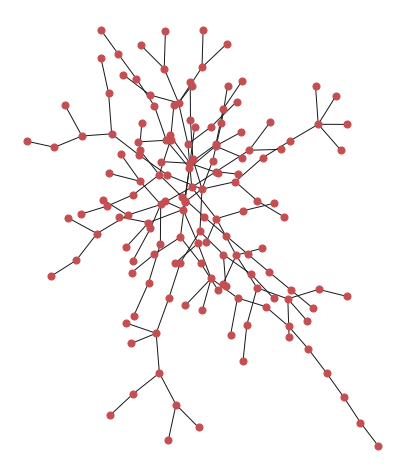

In [260]:
G = nx.Graph()
G.add_edges_from(connections)

fig, ax = plt.subplots(figsize=(7, 8.5))
nx.draw(G,pos=nx.kamada_kawai_layout(G),ax=ax,node_size=50,node_color='r');

In [261]:
all_nodes_present = list(sum(connections,()))

X = []
for xx in range(Df.shape[0]):
    for yy in range(xx):
        if ((xx in all_nodes_present)&(yy in all_nodes_present)):
            connections = list(nx.all_simple_paths(G, source=yy, target=xx))
            if len(connections)>0:
                X.append([[yy, xx, connections[0]]])
X = sum(X,[])
X[:5]

[[0, 1, [0, 1]],
 [0, 2, [0, 2]],
 [1, 2, [1, 0, 2]],
 [0, 3, [0, 3]],
 [1, 3, [1, 0, 3]]]

In [262]:
df_connections = pd.DataFrame(X,columns=['infector','infectee','connections'])
df_connections['θ'] = [len(XX)-1 for XX in df_connections['connections']]
# df_connections['distance'] = [Distance.eval()[xx,yy] for xx,yy in zip(df_connections.infector,df_connections.infectee)]
df_connections[:5]

infector  infectee connections  θ
0         0         1      [0, 1]  1
1         0         2      [0, 2]  1
2         1         2   [1, 0, 2]  2
3         0         3      [0, 3]  1
4         1         3   [1, 0, 3]  2

Computing the mean transmission distance according to Eq8 in Salje *et al*

In [263]:
res_ = []
gdf = df_connections.groupby(['infector','infectee'])
for k, gp in gdf:
    gpd = gp['θ'].value_counts()
    denominator_eq_8 = sum([np.sqrt(2*np.pi*idx)*gpd[idx]/len(gp) for idx in gpd.index])
    numerator_eq_8 = 2*Distance.eval()[k[0],k[1]]
    res_ = np.r_[res_,[numerator_eq_8/denominator_eq_8]]
    
np.mean(res_)

401.5257589656754

### Now for many parameters of gtmean and gtSD to identify 95% credible intervals

In [264]:
with open('trace_Odessa1977.pkl', 'rb') as buff:
    data = pickle.load(buff)  

model_Odessa, trace_Odessa = data['model'], data['trace']

In [265]:
trace_Odessa[7]

{'N_log__': 2.9304161094207393,
 'μ': 1.956339580016173,
 'σ_interval__': -5.561520551971138,
 'R_log__': -1.1324752621811511,
 'N': 18.735424861692596,
 'σ': 0.3828217015574398,
 'gtmean': 7.611161646589743,
 'gtsd': 3.0238031564457173,
 'R': 0.32223465320329797,
 'λ': array([2.27861178e-06, 6.85521230e-03, 1.70657456e-01, 7.89350588e-01,
        1.61803234e+00, 2.14343195e+00, 2.21003876e+00, 1.96828069e+00,
        1.62404575e+00, 1.31210528e+00, 1.08136056e+00, 9.25086628e-01,
        8.15505773e-01, 7.26354979e-01, 6.41747040e-01, 5.56045974e-01,
        4.70134828e-01, 3.87553172e-01, 3.11905483e-01, 2.45643530e-01,
        1.89809000e-01, 1.44271625e-01, 1.08128509e-01, 8.00814367e-02,
        5.87197121e-02, 4.26993439e-02, 3.08372029e-02, 2.21459235e-02,
        1.58326643e-02, 1.12789687e-02, 8.01308445e-03, 5.68143686e-03,
        4.02270160e-03, 2.84588271e-03])}

In [278]:
%%time
import csv
from joblib import Parallel, delayed
import multiprocessing

recalc = False
num_cores = multiprocessing.cpu_count()
filename = "SaljeEstimation_CI.csv"

# cdf of Lognormal distribution
lognormF = lambda t,mu,sigma: 0.5*(1+ssp.erf((np.log(t)-mu)/np.sqrt(2)/sigma))
lognormProb = lambda day,mu,sigma: lognormF(day,mu,sigma) - lognormF(day-1,mu,sigma) if day>0 else 0.0

nsamples_ = 100
if(recalc):
    File = open(filename, 'w')
    File.write("genmean,gensd,mu\n")
    writer = csv.writer(File,lineterminator='\n')

    for trace_idx in range(1000):
        trc = trace_Odessa[trace_idx]
        genmean = trc['gtmean']*7; gensd = trc['gtsd']*7
        genμ = log(genmean/sqrt((gensd/genmean)**2+1)); genσ = sqrt(log((gensd/genmean)**2+1))
        genProb = lambda day: lognormProb(day,genμ,genσ)

        WallingaMatrix = np.zeros([Df.shape[0]]*2)
        for index_infector, index_infectee in itertools.product(np.arange(Df.shape[0]),np.arange(Df.shape[0])):
            time_infectee = Df.loc[index_infectee,'t']
            time_infector = Df.loc[index_infector,'t']
            WallingaMatrix[index_infectee,index_infector] = genProb(time_infectee-time_infector)
        WallingaMatrix = shared(WallingaMatrix)

        with pm.Model() as model:
            failed_to_connect = tt.switch(tt.gt(WallingaMatrix.max(axis=1),0),0,1)
            p = pm.Deterministic('p',tt.concatenate([WallingaMatrix,tt.shape_padright(failed_to_connect)],axis=1))
            connectivity_ = pm.Categorical('connectivity_',p=p,shape=Df.shape[0])
            connectivity = pm.Deterministic('connectivity',tt.switch(tt.lt(connectivity_,Df.shape[0]),
                                                                     connectivity_,
                                                                     -1))
            trace = pm.sample_prior_predictive(samples=nsamples_) 

        def calc(idx):
            res_ = trace['connectivity'][idx]
            connections = [(x,y) for x,y in enumerate(res_) if y>=0]
            G = nx.Graph()
            G.add_edges_from(connections)
            X = []
            for xx in range(Df.shape[0]):
                for yy in range(xx):
                    try:
                        connections = list(nx.all_simple_paths(G, source=yy, target=xx))
                        if len(connections)>0:
                            X.append([yy, xx, len(connections[0])-1])
                    except:
                        pass
            G.clear()
            return(X)

        X = Parallel(n_jobs=num_cores)(delayed(calc)(i) for i in range(nsamples_))
        df_connections =  pd.DataFrame(sum(X,[]),columns=['infector','infectee','θ'])

        res_ = []
        gdf = df_connections.groupby(['infector','infectee'])
        for k, gp in gdf:
            gpd = gp['θ'].value_counts()
            denominator_eq_8 = sum([np.sqrt(2*np.pi*idx)*gpd[idx]/len(gp) for idx in gpd.index])
            numerator_eq_8 = 2*Distance.eval()[k[0],k[1]]
            res_ = np.r_[res_,[numerator_eq_8/denominator_eq_8]]

        output = [genmean/7.,gensd/7.,np.mean(res_)]
        print(np.r_[trace_idx,output])
        writer.writerow(output)
        File.close()
        File = open(filename, 'a')
        writer = csv.writer(File,lineterminator='\n')

    File.close()

CPU times: user 41 µs, sys: 1 µs, total: 42 µs
Wall time: 47.4 µs


In [279]:
res = pd.read_csv("SaljeEstimation_CI.csv",sep=",")
res[:5]

genmean     gensd          mu
0  7.167052  1.134880  480.925217
1  7.788555  2.610998  453.218816
2  7.353013  2.062334  452.258830
3  7.407788  1.787185  473.787701
4  7.430278  1.612777  476.741763

In [280]:
ss.scoreatpercentile(res['mu'].values,[2.5,50,97.5])

array([444.82208922, 475.75816453, 494.4274174 ])

now for varied parameters of the serial interval

In [276]:
import os
from multiprocessing import Pool
os.cpu_count()

8

In [ ]:
%%time
import csv
from joblib import Parallel, delayed
import multiprocessing

recalc = True
num_cores = multiprocessing.cpu_count()
filename = "SaljeEstimation.csv"

# cdf of Lognormal distribution
lognormF = lambda t,mu,sigma: 0.5*(1+ssp.erf((np.log(t)-mu)/np.sqrt(2)/sigma))
lognormProb = lambda day,mu,sigma: lognormF(day,mu,sigma) - lognormF(day-1,mu,sigma) if day>0 else 0.0

nsamples_ = 100
if(recalc):
    File = open(filename, 'w')
    File.write("genmean,gensd,mu\n")
    writer = csv.writer(File,lineterminator='\n')

    for genmean in np.arange(1,15,1):
        for gensd in np.arange(1,8,1):
            print((genmean,gensd))
            genμ = log((genmean*7)/sqrt((gensd/genmean)**2+1)); genσ = sqrt(log((gensd/genmean)**2+1))
            genProb_ = lambda day: lognormProb(day,genμ,genσ)

            WallingaMatrix = np.zeros([Df.shape[0]]*2)
            for index_infector, index_infectee in itertools.product(np.arange(Df.shape[0]),np.arange(Df.shape[0])):
                time_infectee = Df.loc[index_infectee,'t']
                time_infector = Df.loc[index_infector,'t']
                WallingaMatrix[index_infectee,index_infector] = genProb_(time_infectee-time_infector)
            WallingaMatrix = shared(WallingaMatrix)

            with pm.Model() as model:
                failed_to_connect = tt.switch(tt.gt(WallingaMatrix.max(axis=1),0),0,1)
                p = pm.Deterministic('p',tt.concatenate([WallingaMatrix,tt.shape_padright(failed_to_connect)],axis=1))
                connectivity_ = pm.Categorical('connectivity_',p=p,shape=Df.shape[0])
                connectivity = pm.Deterministic('connectivity',tt.switch(tt.lt(connectivity_,Df.shape[0]),
                                                                         connectivity_,
                                                                         -1))
                trace = pm.sample_prior_predictive(samples=nsamples_) 
                
            def calc(idx):
                res_ = trace['connectivity'][idx]
                connections = [(x,y) for x,y in enumerate(res_) if y>=0]
                G = nx.Graph()
                G.add_edges_from(connections)
                X = []
                for xx in range(Df.shape[0]):
                    for yy in range(xx):
                        connections = list(nx.all_simple_paths(G, source=yy, target=xx))
                        if len(connections)>0:
                            X.append([yy, xx, len(connections[0])-1])
                G.clear()
                return(X)

            X = Parallel(n_jobs=num_cores)(delayed(calc)(i) for i in range(nsamples_))
            df_connections =  pd.DataFrame(sum(X,[]),columns=['infector','infectee','θ'])
                
            res_ = []
            gdf = df_connections.groupby(['infector','infectee'])
            for k, gp in gdf:
                gpd = gp['θ'].value_counts()
                denominator_eq_8 = sum([np.sqrt(2*np.pi*idx)*gpd[idx]/len(gp) for idx in gpd.index])
                numerator_eq_8 = 2*Distance.eval()[k[0],k[1]]
                res_ = np.r_[res_,[numerator_eq_8/denominator_eq_8]]

            output = [genmean,gensd,np.mean(res_)]
            writer.writerow(output)
            File.close()
            File = open(filename, 'a')
            writer = csv.writer(File,lineterminator='\n')

            display(output)
        
    File.close()

# Cohort reproduction number

In [271]:
genProb = lambd a day: gammaProb(day,genmeanOdessa,gensdOdessa)

Suppose that we have the following level of undereporting

In [ ]:
WallingaMatrix = np.zeros([Df.shape[0]]*2)
for index_infector, index_infectee in itertools.product(np.arange(Df.shape[0]),np.arange(Df.shape[0])):
    time_infectee = Df.loc[index_infectee,'t']
    time_infector = Df.loc[index_infector,'t']
    WallingaMatrix[index_infectee,index_infector] = genProb(time_infectee-time_infector)
    
WallingaMatrix

In [ ]:
n_index_cases = Df0.loc[lambda d: d['t']==np.min(Df0['t'])].shape[0]
n_index_cases

In [ ]:
Df['R'] = (WallingaMatrix/WallingaMatrix.sum(axis=1)[:,None])[n_index_cases:,:].sum(axis=0)
Df['R']

In [ ]:
df_Reff = Df.groupby('start_week_date')['R'].sum().reset_index()
df_Reff['week'] = (df_Reff['start_week_date']-np.min(df_Reff['start_week_date'])).astype('timedelta64[W]').astype(int)
df_Reff[:5]

In [ ]:
fig, ax = plt.subplots(figsize=(7, 5))
ax.step(df_Reff['week'].append(df_Reff['week'][-1:]+1),
        df_Reff['R'].append(df_Reff['R'][-1:]),where='post',color='C3')
ax.fill_between(df_Reff['week'].append(df_Reff['week'][-1:]+1),
                df_Reff['R'].append(df_Reff['R'][-1:]),
                step='post',alpha=.5,color='C3',label='Reported')
ax.set_ylim(bottom=0); ax.set_xlim(np.min(df_Reff['week']),np.max(df_Reff['week']))
xtks = np.arange(np.min(df_Reff['week']),np.max(df_Reff['week']),4)
ax.set_xticks(xtks)
ax.set_xticklabels([x.strftime("%b %d") for x in [np.min(df_Reff['start_week_date'])+np.timedelta64(x,'W') for x in xtks]])
fig.autofmt_xdate(rotation=30,ha='center')
ax.set_xlabel('Date'); ax.set_ylabel('Reproduction number');

# Plots

In [ ]:
%%R -w 550 -h 300 -r 100 

libraries = c("dplyr","magrittr","tidyr","ggplot2","gridExtra","RColorBrewer")
for(x in libraries) { library(x,character.only=TRUE,warn.conflicts=FALSE) }
clrs = brewer.pal(8,"Set1")
'%&%' = function(x,y)paste0(x,y)
theme_set(theme_minimal(base_size=11)) 

"SaljeEstimation.csv" %>% read.csv -> df

cs = c(5.5,3.5)
options(repr.plot.width=cs[1],repr.plot.height=cs[2])

df %>% 
    filter(gensd>=0&gensd<=7&genmean>=0&genmean<=10) %>%
    summarize(mu_min=min(mu),mu_max=max(mu)) %>% print

df %>% 
    filter(gensd>=0&gensd<=7&genmean>=0&genmean<=10) %>%
    ggplot(aes(x=genmean,y=gensd,fill=mu)) + 
        geom_raster(interpolate=F) +
        scale_x_continuous(expand=c(0,0),breaks=seq(1,15,1)) + 
        scale_y_continuous(expand=c(0,0),breaks=seq(1,15,1)) +
        scale_fill_gradientn(colours=brewer.pal(8,"RdPu"),
                             name="Estimated\nmean transm.\ndistance (km)") +     
        xlab("Serial interval mean (weeks)") +
        ylab("Serial interval SD (weeks)") +
        theme(legend.title=element_text(size=10,vjust=2),legend.text=element_text(size=8),
              axis.title=element_text(size=11),
              panel.grid.major = element_blank(), 
              panel.grid.minor = element_blank()) -> p1

ggsave(plot=p1,width=cs[1],height=cs[2],filename="../../figures/SaljeEstimation.pdf",useDingbats=FALSE)

p1